In [2]:
#importing the required Python Libraries & the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('loan.csv',low_memory=False)
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [3]:
# Understanding the high-level information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
#To Get the no of Rows & Columns in the dataframe
df.shape

(39717, 111)

# Removing Columns with all Null Values


In [5]:
#Dataset Number of Nulls in Column Analysis
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
#Deleting all columns which are having more than 99% NULL values...
To_be_deleted_columns = df.columns[df.isnull().sum()>39000]
To_be_deleted_columns

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [7]:
#Checking no of Null values in these columns that need to be discarded...
df[To_be_deleted_columns].isnull().sum()

mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717
acc_open_past_24mths              39717
avg_cur_bal                       39717
bc_open_to_buy                    39717
bc_util                           39717


In [8]:
#Deleting those columns
df=df.drop(To_be_deleted_columns,axis=1)
df.shape

(39717, 57)

# Removing Columns Not Relevant to Credit Analysis



In [83]:
# List of Remaining Columns
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'next_pymnt_d',
       'application_type', 'issue_year', 'season', 'funded_amount_categories',
       'annual_income_category', 'dti_bins', 'total_pymnt_diff', 'delinq_bin',
       'open_acc_bin', 'total_acc_bin', 'pub_rec_bin',
       'years_since_earliest_cr', 'earliest_cr_bin', 'int_rate_bin',
       'total_rec_late_fee_bin', 'loan_status_encoded', 'z_scores',
       'issue_date', 'month', 'year'],
      dtype='object')

In [10]:
#Dropping id and member_id - which are random numbers allocated to members, not related to predicting credit
df.drop(['id','member_id'],axis=1,inplace=True)
df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
4       3000         3000           3000.0   60 months   12.69%        67.79   

  grade sub_grade                 emp_title emp_length  ... next_pymnt_d  \
0     B        B2                       NaN  10+ years  ...          NaN   
1     C        C4                     Ryder   < 1 year  ...          NaN   
2     C        C5                       NaN  10+ years  ...          NaN   
3     C        C1       AIR RESOURCES BOARD  10+ years  ...          NaN   
4     B        B5  University Medical Group     1 year  ...       Jun-16   

   last_credit_pull_d collections_12_mths_ex_med policy_code application_type  \
0              May-16                        0.0           1       INDIVIDUAL   
1              Sep-13                        0.0           1       INDIVIDUAL   
2              May-16                        0.0           1       INDIVIDUAL   
3              Apr-16                        0.0           1       INDIVIDUAL   
4              May-16                        0.0           1       INDIVIDUAL   

  acc_now_delinq chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies  \
0              0                      0.0           0                  0.0   
1              0                      0.0           0                  0.0   
2              0                      0.0           0                  0.0   
3              0                      0.0           0                  0.0   
4              0                      0.0           0                  0.0   

  tax_liens  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 55 columns]

In [85]:
# Seeking to Understand the Data in the Remaining Columns
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'next_pymnt_d',
       'application_type', 'issue_year', 'season', 'funded_amount_categories',
       'annual_income_category', 'dti_bins', 'total_pymnt_diff', 'delinq_bin',
       'open_acc_bin', 'total_acc_bin', 'pub_rec_bin',
       'years_since_earliest_cr', 'earliest_cr_bin', 'int_rate_bin',
       'total_rec_late_fee_bin', 'loan_status_encoded', 'z_scores',
       'issue_date', 'month', 'year'],
      dtype='object')

In [12]:
# Tax liens column only has a single value and is not relevant to the credit risk assessment
df['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

## Columns Relevant to Calculating Credit Loss 

    'loan_amnt', 
    'funded_amnt', 
    'recoveries', 
    'collection_recovery_fee', 

## Columns Relevant to Credit Risk Factors at the Time Loan is Issued

     'annual_inc', 
     'term', 
     'installment', 
     'grade', 
     'sub_grade', 
     'emp_length',
     'home_ownership', 
     'verification_status', 
     'dti',  - ratio of monthly paments to debt obligations is relevant
     'addr_state',  - e.g. are some areas may have more concentrated credit risk
     'inq_last_6mths', 
     'application_type', - to determine whether shared loans have a different credit risk profile

   
   ## Columns Related to Credit Risk Factors After Loan is Issued
    'loan_status', 
    'delinq_2yrs', 
    'mths_since_last_delinq', 
    'open_acc',
    'pub_rec', - to check which column it goes in
    'earliest_cr_line',  
    'int_rate',
    
    'total_acc', 
    'out_prncp', 
    'out_prncp_inv', 
    'total_pymnt', - find the difference with 'total_pymnt_inv' and potentially delete 'total_pymnt_inv'
    'total_rec_late_fee',
    'collections_12_mths_ex_med', 
    'acc_now_delinq', 
    'chargeoff_within_12_mths',
    'delinq_amnt', 
    'pub_rec_bankruptcies', 
    
  ######  Revolving Accounts
    'revol_bal', 
    'revol_util',

   
 ## Column that Are Not Relevant to Credit Risk  
 
  'funded_amnt_inv' - amount funded by investors is not relevant to credit risk, 
  
  'emp_title', - these are different names - not possible to link to credit risk,
  
  'pymnt_plan', - entire column is 'n' - not relevant credit risk info
  
  'url', - not relevant to credit risk
  
  'desc', - not relevant to credit risk
  
  'purpose',  - not relevant to credit risk
  
  'title', - not relevant to credit risk
  
  'zip_code', - not related to credit
  
  'initial_list_status', - single value column not relevant to credit risk
  
  'total_rec_prncp', - this information is already included in other columns
  
  'total_rec_int',  - this information is already included in other columns    
  
  'last_pymnt_d', - not relevant to assessing credit risk, when assessing the portfolio over the entire period
  
  'last_pymnt_amnt',  - not relevant to assessing credit risk, when assessing the portfolio over the entire period
  
  'last_credit_pull_d', - letters of credit not related to credit risk
  
  'policy_code', - not relevant to credit risk
  
  'tax_liens' - discard as it only has one value



In [13]:
#Deleting Columns which are not required for analysis 
df.drop(['funded_amnt_inv', 'emp_title', 'pymnt_plan','url','desc','title','zip_code','initial_list_status','total_rec_prncp','total_rec_int', 'last_pymnt_d','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code', 'tax_liens'],axis=1,inplace=True)
df.head()


loan_amnt  funded_amnt        term int_rate  installment grade sub_grade  \
0       5000         5000   36 months   10.65%       162.87     B        B2   
1       2500         2500   60 months   15.27%        59.83     C        C4   
2       2400         2400   36 months   15.96%        84.33     C        C5   
3      10000        10000   36 months   13.49%       339.31     C        C1   
4       3000         3000   60 months   12.69%        67.79     B        B5   

  emp_length home_ownership  annual_inc  ... total_rec_late_fee recoveries  \
0  10+ years           RENT     24000.0  ...               0.00       0.00   
1   < 1 year           RENT     30000.0  ...               0.00     117.08   
2  10+ years           RENT     12252.0  ...               0.00       0.00   
3  10+ years           RENT     49200.0  ...              16.97       0.00   
4     1 year           RENT     80000.0  ...               0.00       0.00   

  collection_recovery_fee next_pymnt_d collections_12_mths_ex_med  \
0                    0.00          NaN                        0.0   
1                    1.11          NaN                        0.0   
2                    0.00          NaN                        0.0   
3                    0.00          NaN                        0.0   
4                    0.00       Jun-16                        0.0   

   application_type  acc_now_delinq chargeoff_within_12_mths  delinq_amnt  \
0        INDIVIDUAL               0                      0.0            0   
1        INDIVIDUAL               0                      0.0            0   
2        INDIVIDUAL               0                      0.0            0   
3        INDIVIDUAL               0                      0.0            0   
4        INDIVIDUAL               0                      0.0            0   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 40 columns]

In [14]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'next_pymnt_d', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [15]:
#Checking datatypes of the remaining columns
df.dtypes

loan_amnt                       int64
funded_amnt                     int64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
mths_since_last_delinq        float64
mths_since_last_record        float64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                     object
total_acc                       int64
out_prncp   

In [16]:
# Removing 'months' and converting term to integers
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

In [17]:
#Checking datatypes of the remaining columns
df.dtypes

loan_amnt                       int64
funded_amnt                     int64
term                            int64
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
mths_since_last_delinq        float64
mths_since_last_record        float64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                     object
total_acc                       int64
out_prncp   

In [18]:
# Converting the column int_rate to strings, removing '%' and then converting to floats
df['int_rate'] = df['int_rate'].astype(str).str.rstrip('%').astype(float)
df.head()

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  \
0       5000         5000    36     10.65       162.87     B        B2   
1       2500         2500    60     15.27        59.83     C        C4   
2       2400         2400    36     15.96        84.33     C        C5   
3      10000        10000    36     13.49       339.31     C        C1   
4       3000         3000    60     12.69        67.79     B        B5   

  emp_length home_ownership  annual_inc  ... total_rec_late_fee recoveries  \
0  10+ years           RENT     24000.0  ...               0.00       0.00   
1   < 1 year           RENT     30000.0  ...               0.00     117.08   
2  10+ years           RENT     12252.0  ...               0.00       0.00   
3  10+ years           RENT     49200.0  ...              16.97       0.00   
4     1 year           RENT     80000.0  ...               0.00       0.00   

  collection_recovery_fee next_pymnt_d collections_12_mths_ex_med  \
0                    0.00          NaN                        0.0   
1                    1.11          NaN                        0.0   
2                    0.00          NaN                        0.0   
3                    0.00          NaN                        0.0   
4                    0.00       Jun-16                        0.0   

   application_type  acc_now_delinq chargeoff_within_12_mths  delinq_amnt  \
0        INDIVIDUAL               0                      0.0            0   
1        INDIVIDUAL               0                      0.0            0   
2        INDIVIDUAL               0                      0.0            0   
3        INDIVIDUAL               0                      0.0            0   
4        INDIVIDUAL               0                      0.0            0   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 40 columns]

# Gaining Insight Into the Loan Portfolio 

In [19]:
# Univariate analysis on the loan_status column
loan_status_counts = df['loan_status'].value_counts()

# Print the count of each loan status
print(loan_status_counts)


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


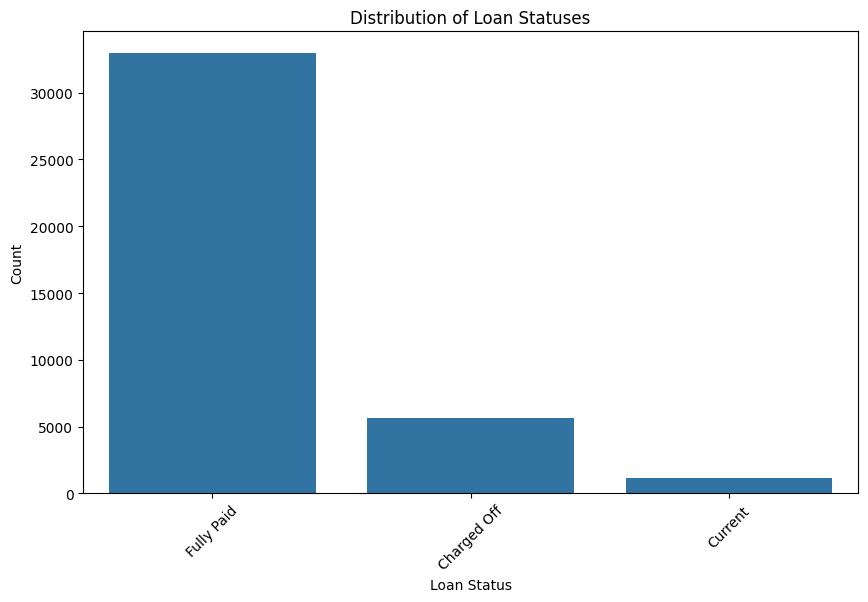

In [20]:
# Plotting the loan_status counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_status', order=loan_status_counts.index)
plt.title('Distribution of Loan Statuses')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


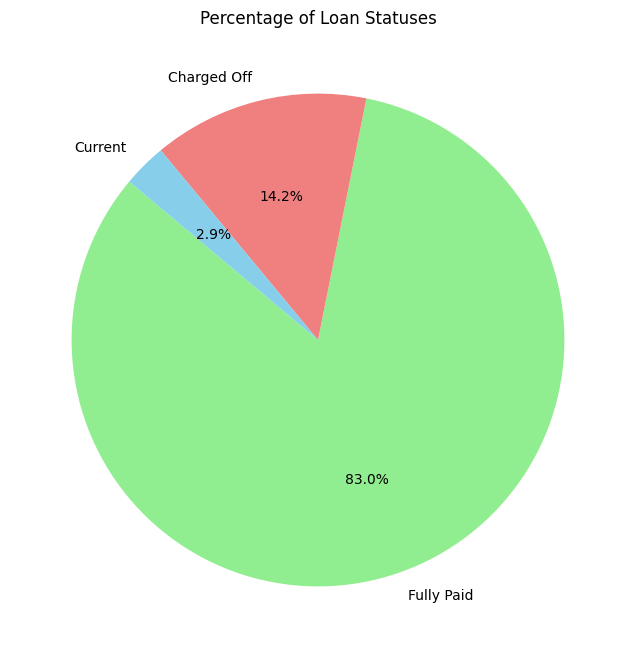

In [21]:
# Univariate analysis on the loan_status column
loan_status_counts = df['loan_status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral', 'skyblue'])
plt.title('Percentage of Loan Statuses')
plt.show()

<Figure size 1500x800 with 0 Axes>

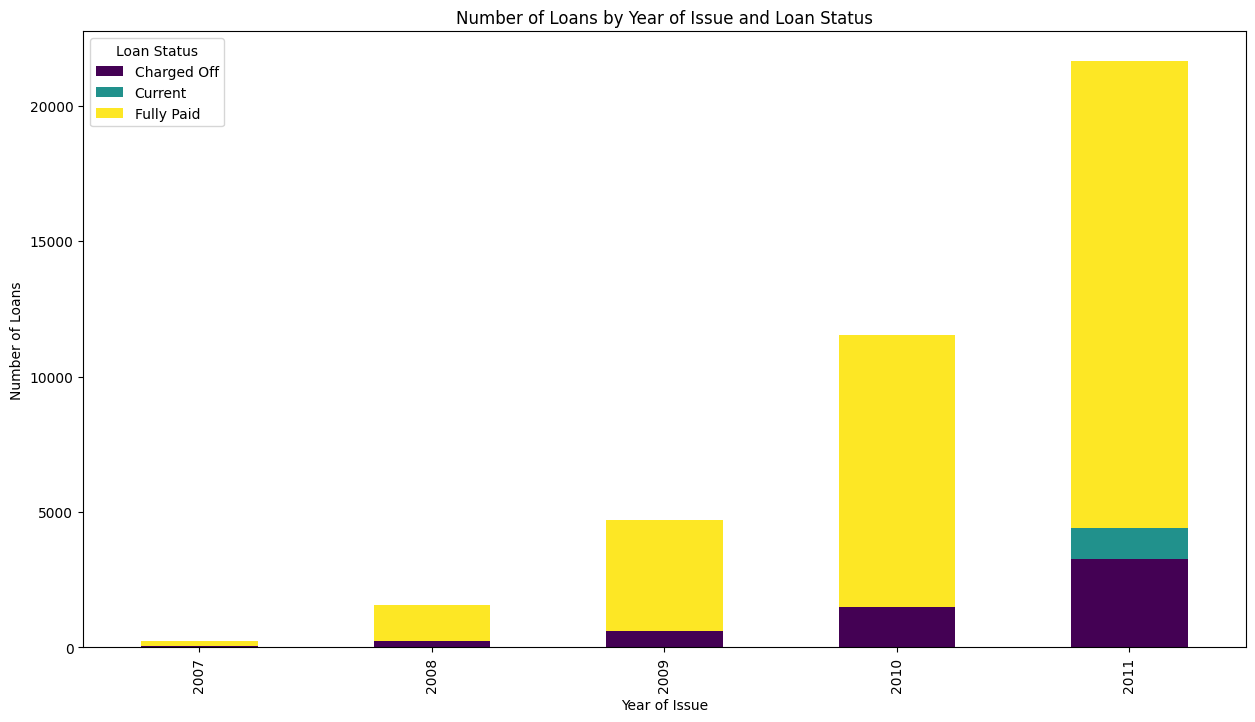

In [22]:
# Convert issue_d to datetime format and extract the year
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_year'] = df['issue_d'].dt.year

# Group by issue_year and loan_status to get the counts
yearly_status_counts = df.groupby(['issue_year', 'loan_status']).size().unstack(fill_value=0)

# Plotting the counts
plt.figure(figsize=(15, 8))
yearly_status_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15, 8))
plt.title('Number of Loans by Year of Issue and Loan Status')
plt.xlabel('Year of Issue')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status')
plt.show()

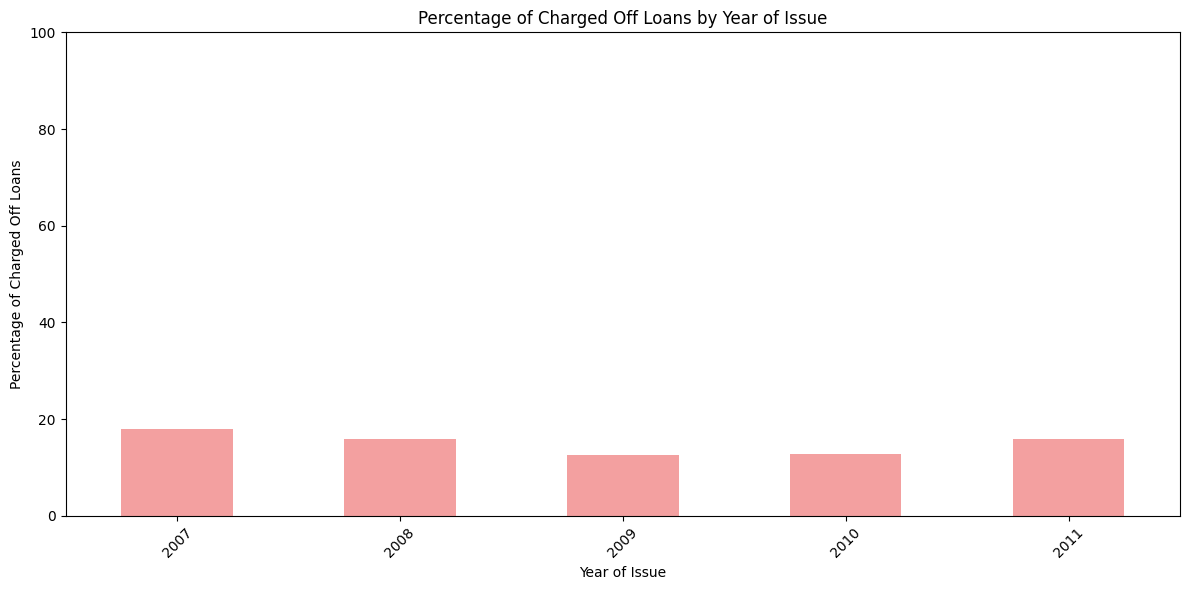

In [23]:

# Convert issue_d to datetime format and extract the year
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y', errors='coerce')
df['issue_year'] = df['issue_d'].dt.year

# Exclude the current year
current_year = pd.to_datetime('today').year
df = df[df['issue_year'] < current_year]

# Group by issue_year and loan_status to get the counts
yearly_status_counts = df.groupby(['issue_year', 'loan_status']).size().unstack(fill_value=0)

# Calculate the percentage of charged-off loans
yearly_status_counts['Percentage Charged Off'] = (yearly_status_counts['Charged Off'] / 
                                                 (yearly_status_counts['Charged Off'] + yearly_status_counts['Fully Paid'])) * 100

# Plotting the percentage of charged-off loans
plt.figure(figsize=(12, 6))
yearly_status_counts['Percentage Charged Off'].plot(kind='bar', color='lightcoral', alpha=0.75)
plt.title('Percentage of Charged Off Loans by Year of Issue')
plt.xlabel('Year of Issue')
plt.ylabel('Percentage of Charged Off Loans')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

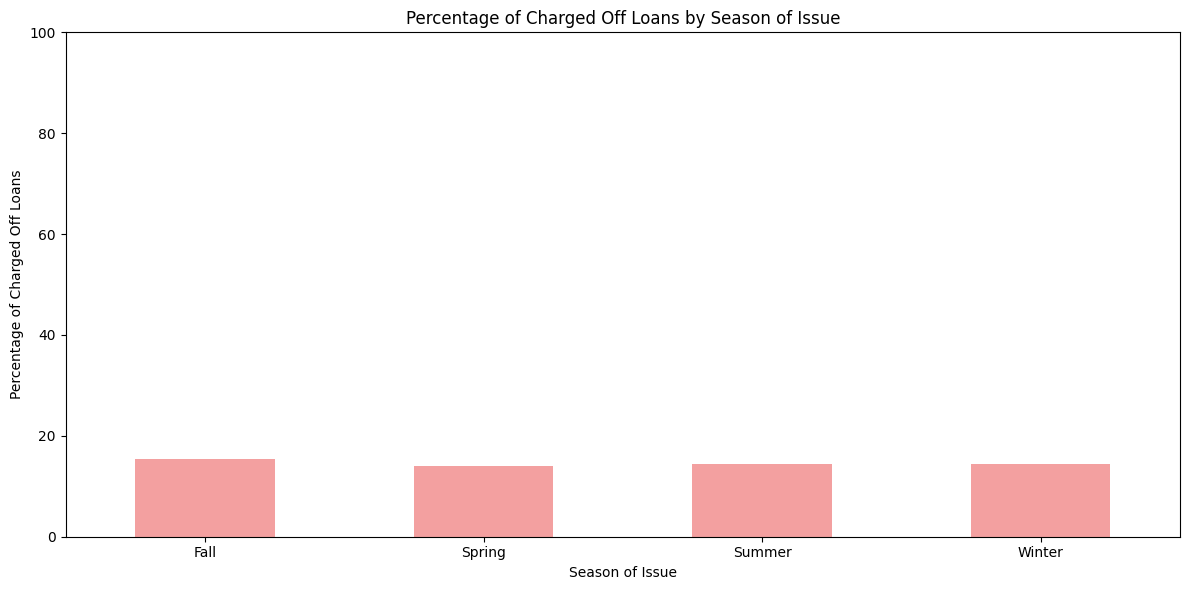

In [24]:

# Convert issue_d to datetime format and extract the season
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y', errors='coerce')

# Define a function to determine the season
def get_season(date):
    if pd.isnull(date):
        return None
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create the season column
df['season'] = df['issue_d'].apply(get_season)

# Group by season and loan_status to get the counts
seasonal_status_counts = df.groupby(['season', 'loan_status']).size().unstack(fill_value=0)

# Calculate the percentage of charged-off loans
seasonal_status_counts['Percentage Charged Off'] = (seasonal_status_counts['Charged Off'] / 
                                                   (seasonal_status_counts['Charged Off'] + seasonal_status_counts['Fully Paid'])) * 100

# Plotting the percentage of charged-off loans
plt.figure(figsize=(12, 6))
seasonal_status_counts['Percentage Charged Off'].plot(kind='bar', color='lightcoral', alpha=0.75)
plt.title('Percentage of Charged Off Loans by Season of Issue')
plt.xlabel('Season of Issue')
plt.ylabel('Percentage of Charged Off Loans')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

    loan_amnt  recoveries  collection_recovery_fee  net_recovery
1        2500      117.08                   1.1100      115.9700
8        5600      189.06                   2.0900      186.9700
9        5375      269.29                   2.5200      266.7700
12       9000      444.30                   4.1600      440.1400
14      10000      645.10                   6.3145      638.7855


/var/folders/6t/_79q7tmj2sd9_qz9dztb9z1w0000gn/T/ipykernel_39039/147979214.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['net_recovery'] = charged_off_loans['recoveries'] - charged_off_loans['collection_recovery_fee']


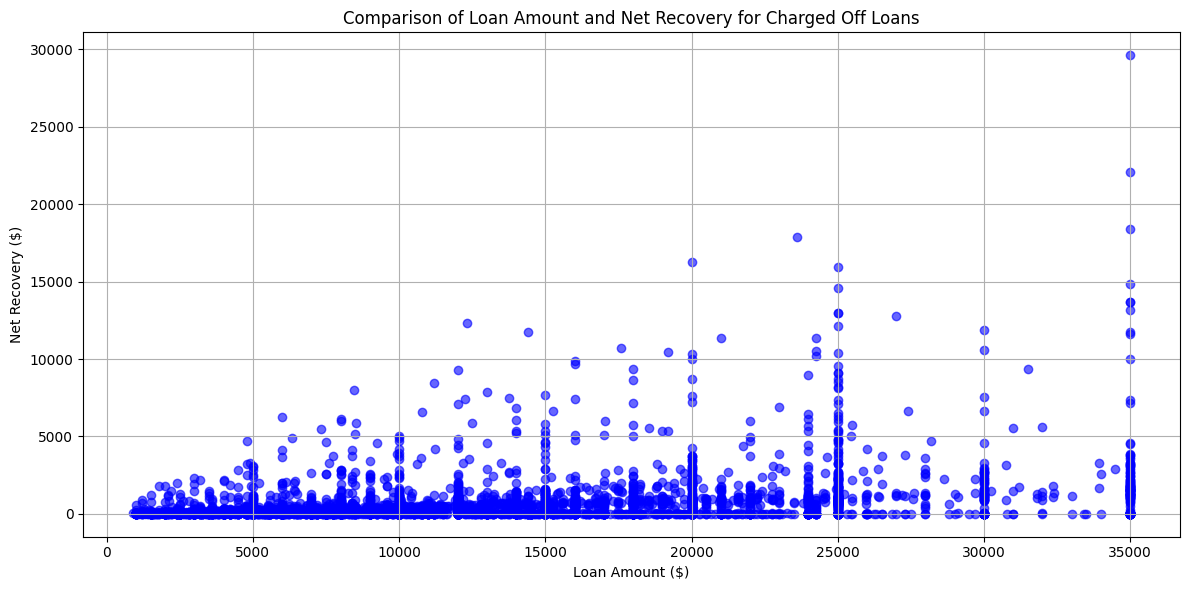

          loan_amnt  net_recovery
count   5627.000000   5627.000000
mean   12104.385108    584.535932
std     8085.732038   1435.091996
min      900.000000      0.000000
25%     5600.000000      0.000000
50%    10000.000000    165.750000
75%    16500.000000    562.285000
max    35000.000000  29623.350000


In [25]:
# Filter the dataset to include only charged-off loans
charged_off_loans = df[df['loan_status'] == 'Charged Off']

# Calculate the difference between recoveries and collection_recovery_fee
charged_off_loans['net_recovery'] = charged_off_loans['recoveries'] - charged_off_loans['collection_recovery_fee']

# Display the first few rows to verify the calculations
print(charged_off_loans[['loan_amnt', 'recoveries', 'collection_recovery_fee', 'net_recovery']].head())

# Plot the comparison
plt.figure(figsize=(12, 6))

plt.scatter(charged_off_loans['loan_amnt'], charged_off_loans['net_recovery'], alpha=0.6, color='blue')
plt.title('Comparison of Loan Amount and Net Recovery for Charged Off Loans')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Net Recovery ($)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Additional statistical summary
summary = charged_off_loans[['loan_amnt', 'net_recovery']].describe()
print(summary)

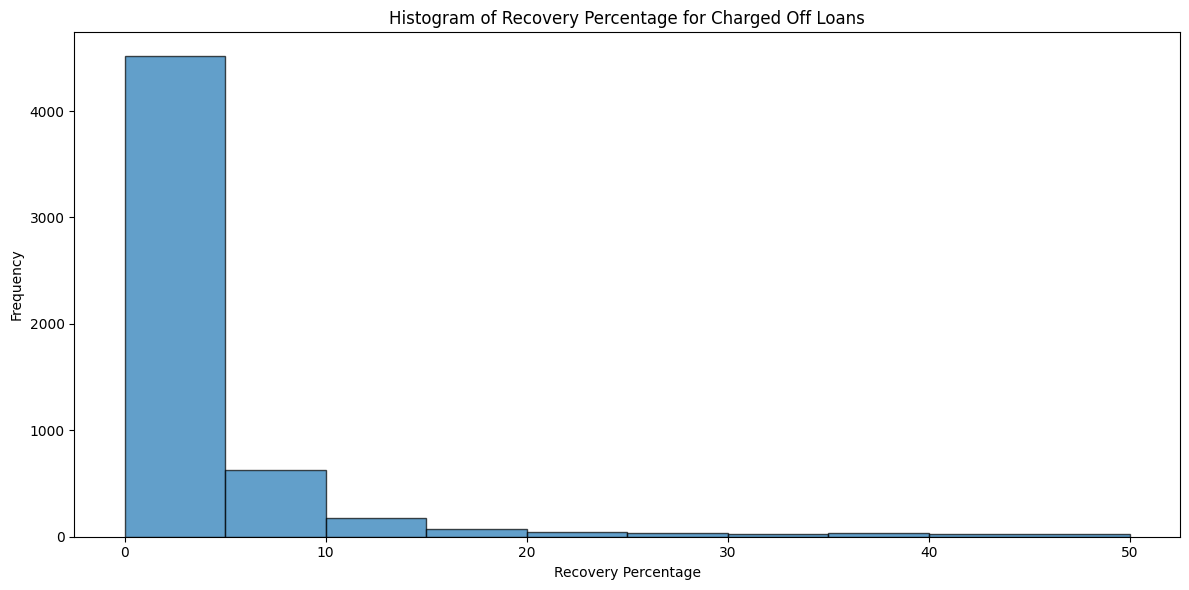

In [26]:


# Filter the dataset to include only charged-off loans
charged_off_loans = df[df['loan_status'] == 'Charged Off'].copy()

# Calculate the net recovery
charged_off_loans['net_recovery'] = charged_off_loans['recoveries'] - charged_off_loans['collection_recovery_fee']

# Calculate the percentage of net recovery divided by loan amount
charged_off_loans['recovery_percentage'] = (charged_off_loans['net_recovery'] / charged_off_loans['loan_amnt']) * 100

# Plot a single histogram with 6 bins for the recovery percentage
plt.figure(figsize=(12, 6))

# Define bins for the recovery percentage
bins = [0, 5,10,15,20, 25, 30, 35,40, 50]

# Create the histogram
plt.hist(charged_off_loans['recovery_percentage'], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Histogram of Recovery Percentage for Charged Off Loans')
plt.xlabel('Recovery Percentage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [27]:
# exploring the loan status column
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

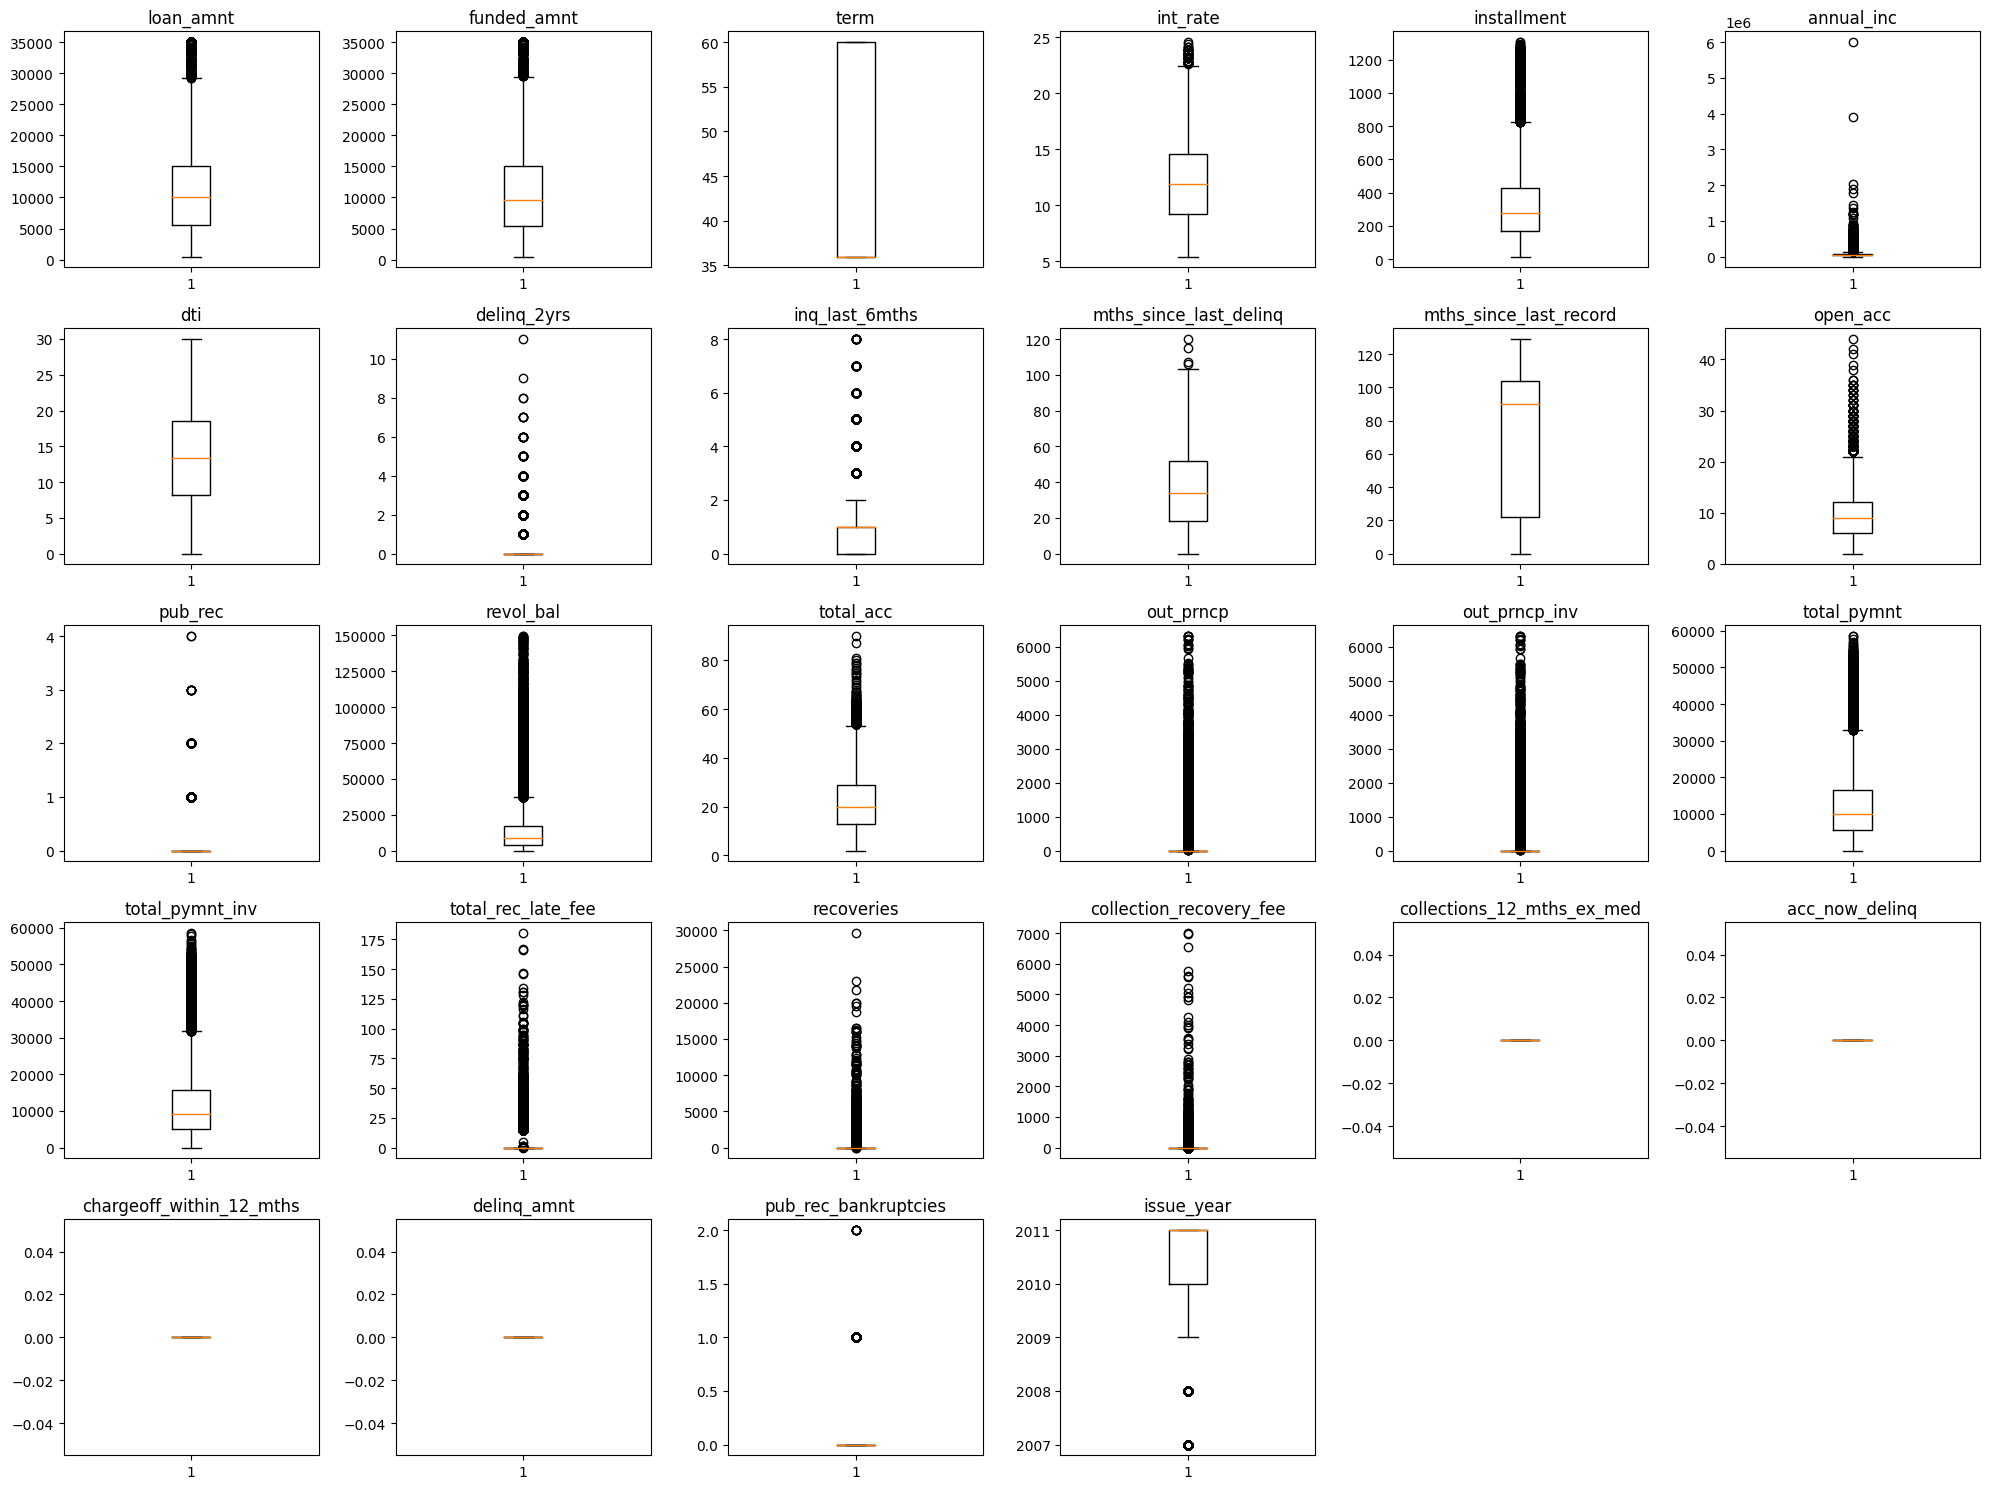

In [28]:
# Selecting numerical columns dynamically
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Function to calculate the grid size
def calculate_grid_size(num_items):
    ncols = int(np.ceil(np.sqrt(num_items)))
    nrows = int(np.ceil(num_items / ncols))
    return nrows, ncols

# Plotting numerical columns
nrows, ncols = calculate_grid_size(len(numerical_cols))
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 15))
axes = axes.flatten()

for ax, col in zip(axes, numerical_cols):
    ax.boxplot(df[col].dropna())
    ax.set_title(col)

for ax in axes[len(numerical_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()




### Interpretation of numerical boxplots
- loan_amount and funded_amount are very similar. Since the dictionary states that the loan amount could be reduced by the credit department at any point in time - we will focus on the funded_amount which was the loan granted at inception.
- It appears that there could be penalty interest charged on defaulted loans, which legitimately explains the high level of interest outside of the interquartile range. Consequently high interest is not an outlier but expected to be closely connected to charge offs (to be confirmed).
- annual_inc has two very large income earners, which could distort the results. Consequently we need to remove outliers.
- The following columns should be dropped as they provide no variations: collections_12_mths_ex_med, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies


In [29]:
# Bucketing the funded amount in small, medium and large categories

# Define the function to categorize loan amounts
def categorize_funded_amount(amount):
    if amount < 5000:
        return 'Small'
    elif 5000 <= amount <= 10000:
        return 'Medium'
    else:
        return 'Large'

# Apply the function to create the new column
df['funded_amount_categories'] = df['funded_amnt'].apply(categorize_funded_amount)

# Display the DataFrame to check the new column
print(df[['funded_amnt', 'funded_amount_categories']])

       funded_amnt funded_amount_categories
0             5000                   Medium
1             2500                    Small
2             2400                    Small
3            10000                   Medium
4             3000                    Small
...            ...                      ...
39712         2500                    Small
39713         8500                   Medium
39714         5000                   Medium
39715         5000                   Medium
39716         7500                   Medium

[39717 rows x 2 columns]


In [30]:
df['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

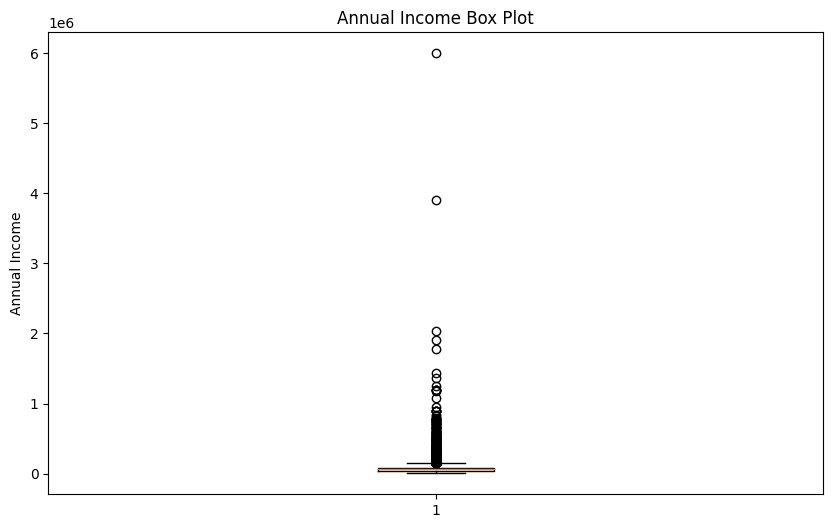

In [31]:
# Creating a box plot for the 'annual_inc' column
plt.figure(figsize=(10, 6))
plt.boxplot(df['annual_inc'].dropna())
plt.title('Annual Income Box Plot')
plt.ylabel('Annual Income')
plt.show()


In [32]:
# Selecting numerical columns dynamically
revised_numerical_cols = df.select_dtypes(include=[np.number]).columns
revised_numerical_cols

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'issue_year'],
      dtype='object')

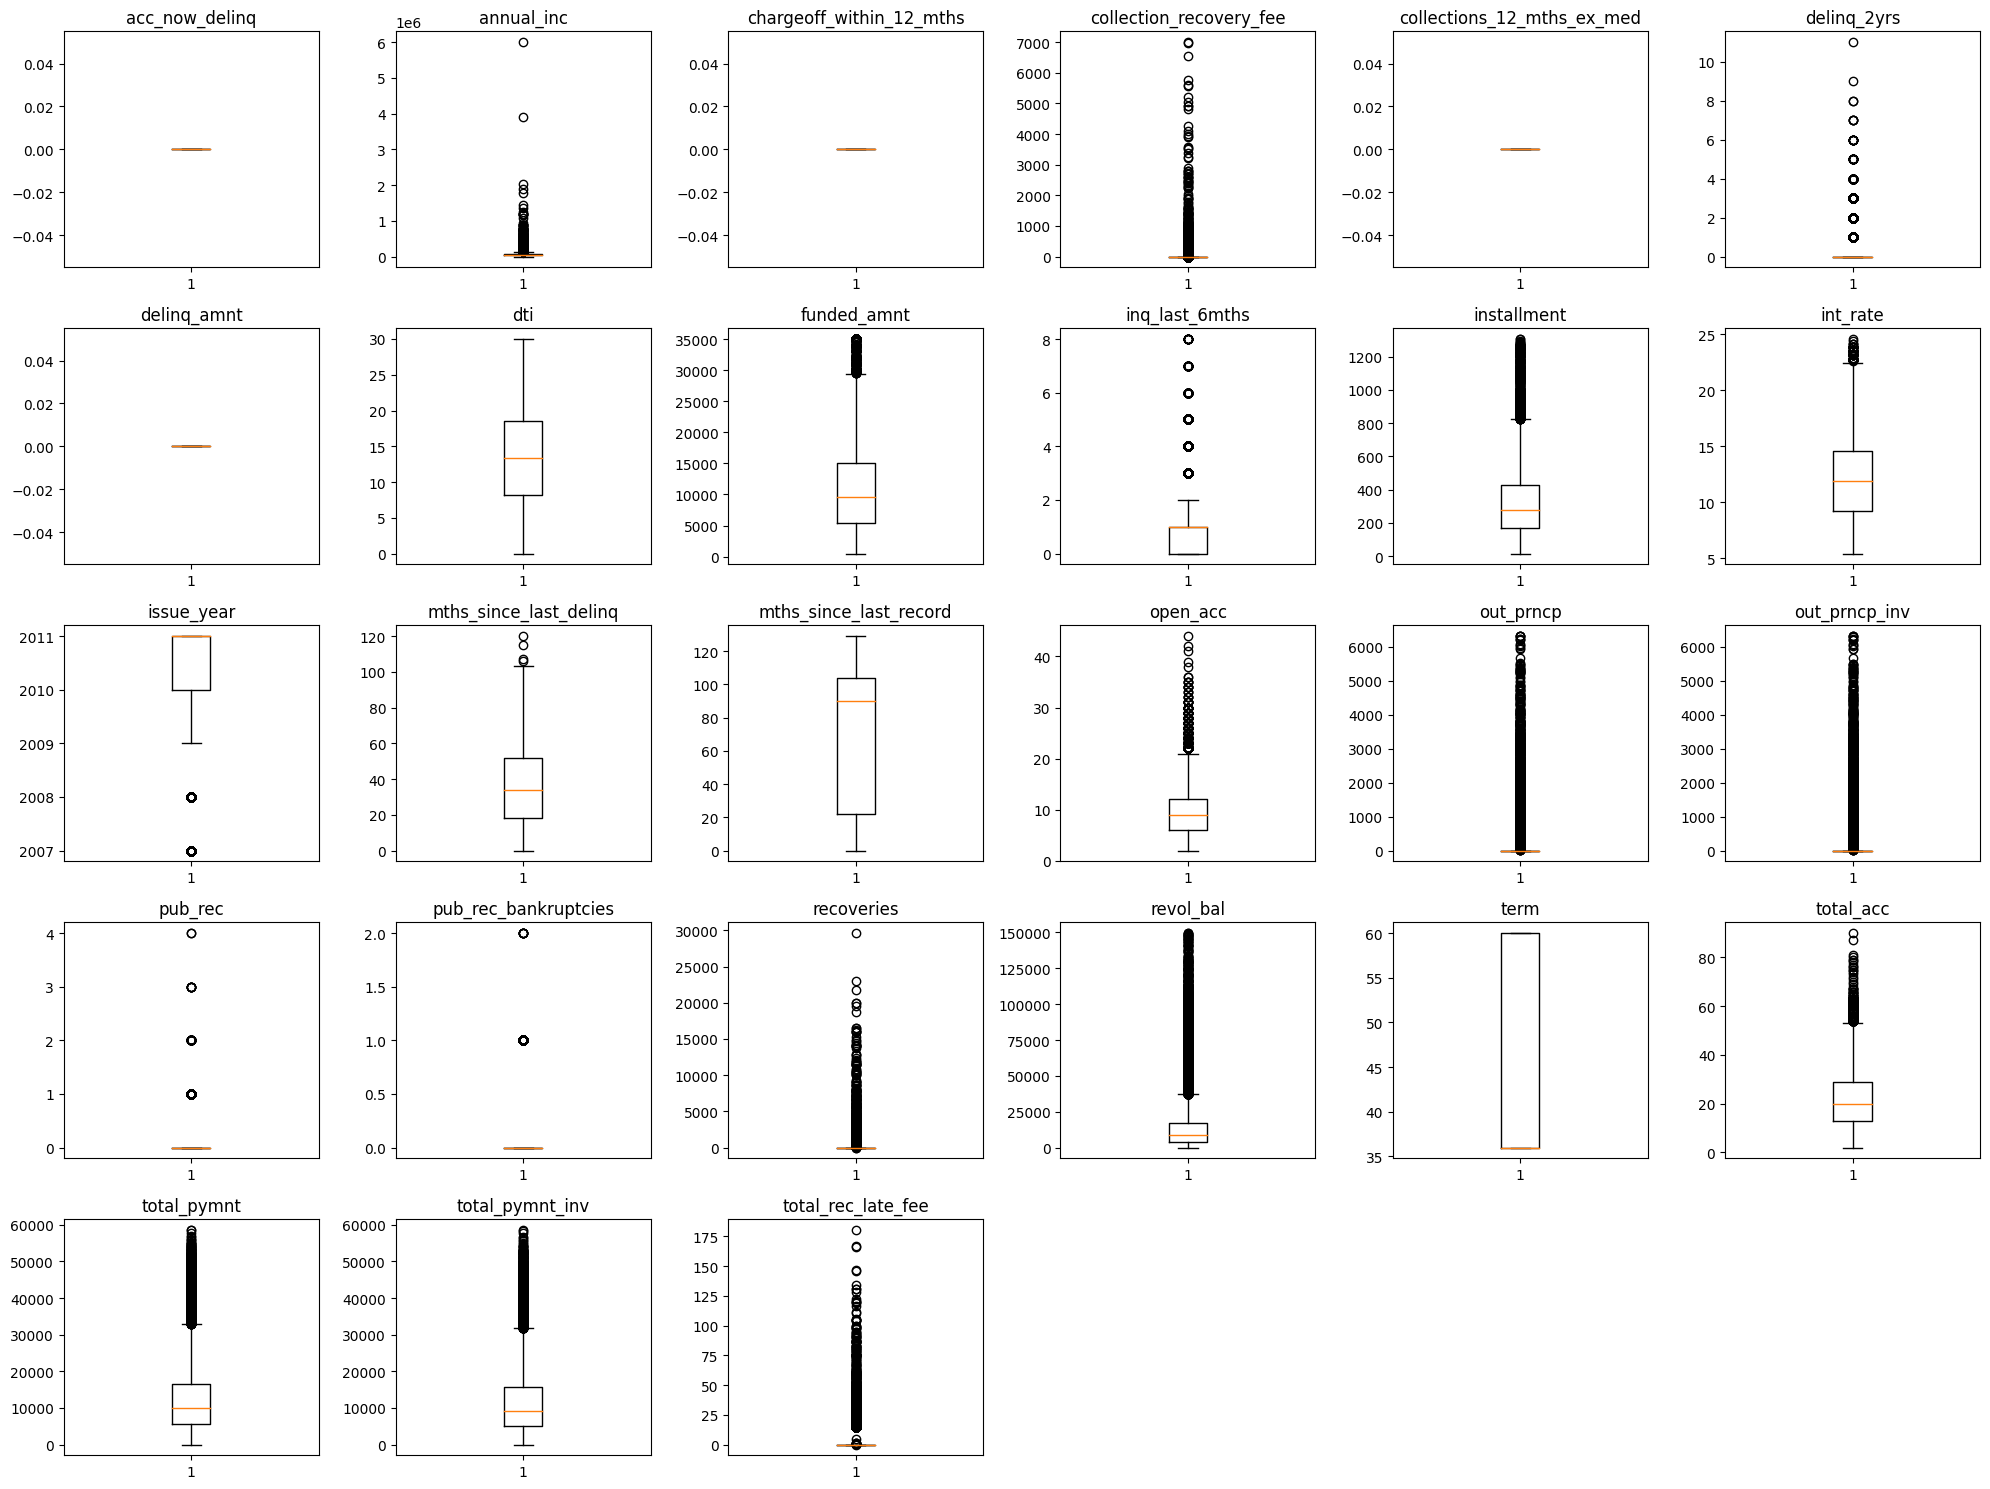

In [33]:

# Selecting numerical columns dynamically
revised_numerical_cols = df.select_dtypes(include=[np.number]).columns

# Removing specific columns
columns_to_remove = ['loan_amnt']
revised_numerical_cols = revised_numerical_cols.difference(columns_to_remove)



# Function to calculate the grid size
def calculate_grid_size(num_items):
    ncols = int(np.ceil(np.sqrt(num_items)))
    nrows = int(np.ceil(num_items / ncols))
    return nrows, ncols

# Plotting numerical columns
nrows, ncols = calculate_grid_size(len(revised_numerical_cols))
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 15))
axes = axes.flatten()

for ax, col in zip(axes, revised_numerical_cols):
    ax.boxplot(df[col].dropna())
    ax.set_title(col)

for ax in axes[len(revised_numerical_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

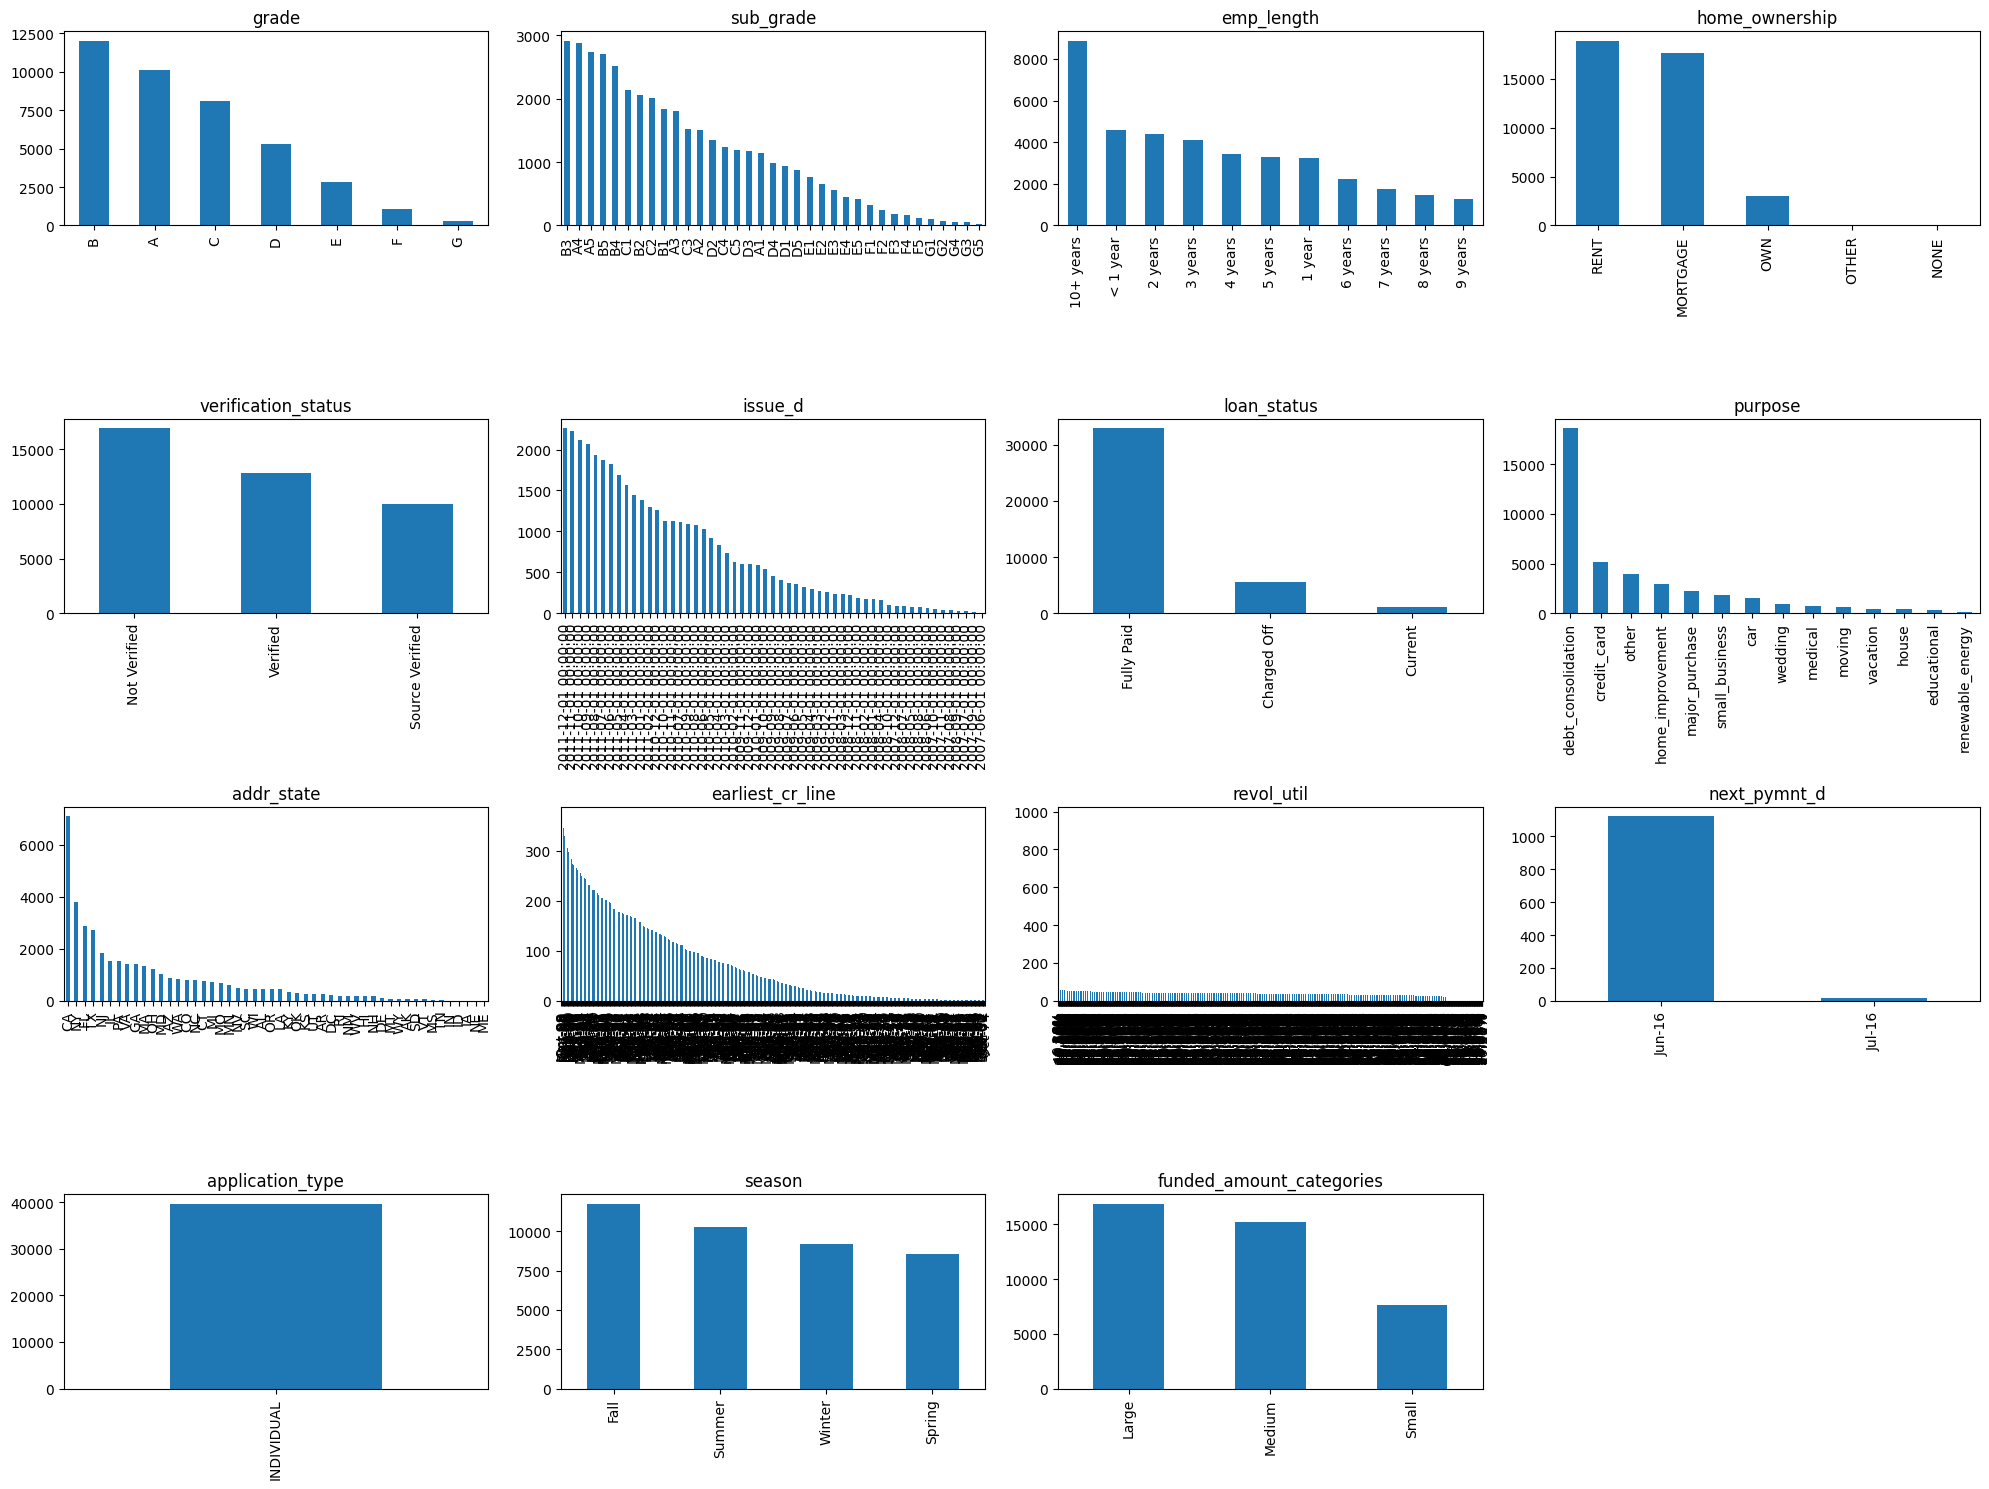

In [34]:

# Selecting categorical columns dynamically
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

# Function to calculate the grid size
def calculate_grid_size(num_items):
    ncols = int(np.ceil(np.sqrt(num_items)))
    nrows = int(np.ceil(num_items / ncols))
    return nrows, ncols

# Plotting categorical columns
nrows, ncols = calculate_grid_size(len(categorical_cols))
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 15))
axes = axes.flatten()

for ax, col in zip(axes, categorical_cols):
    if not df[col].dropna().empty:
        df[col].value_counts().plot(kind='bar', ax=ax)
        ax.set_title(col)

# Remove any unused subplots
for ax in axes[len(categorical_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [35]:
categorical_cols

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'earliest_cr_line', 'revol_util', 'next_pymnt_d',
       'application_type', 'season', 'funded_amount_categories'],
      dtype='object')

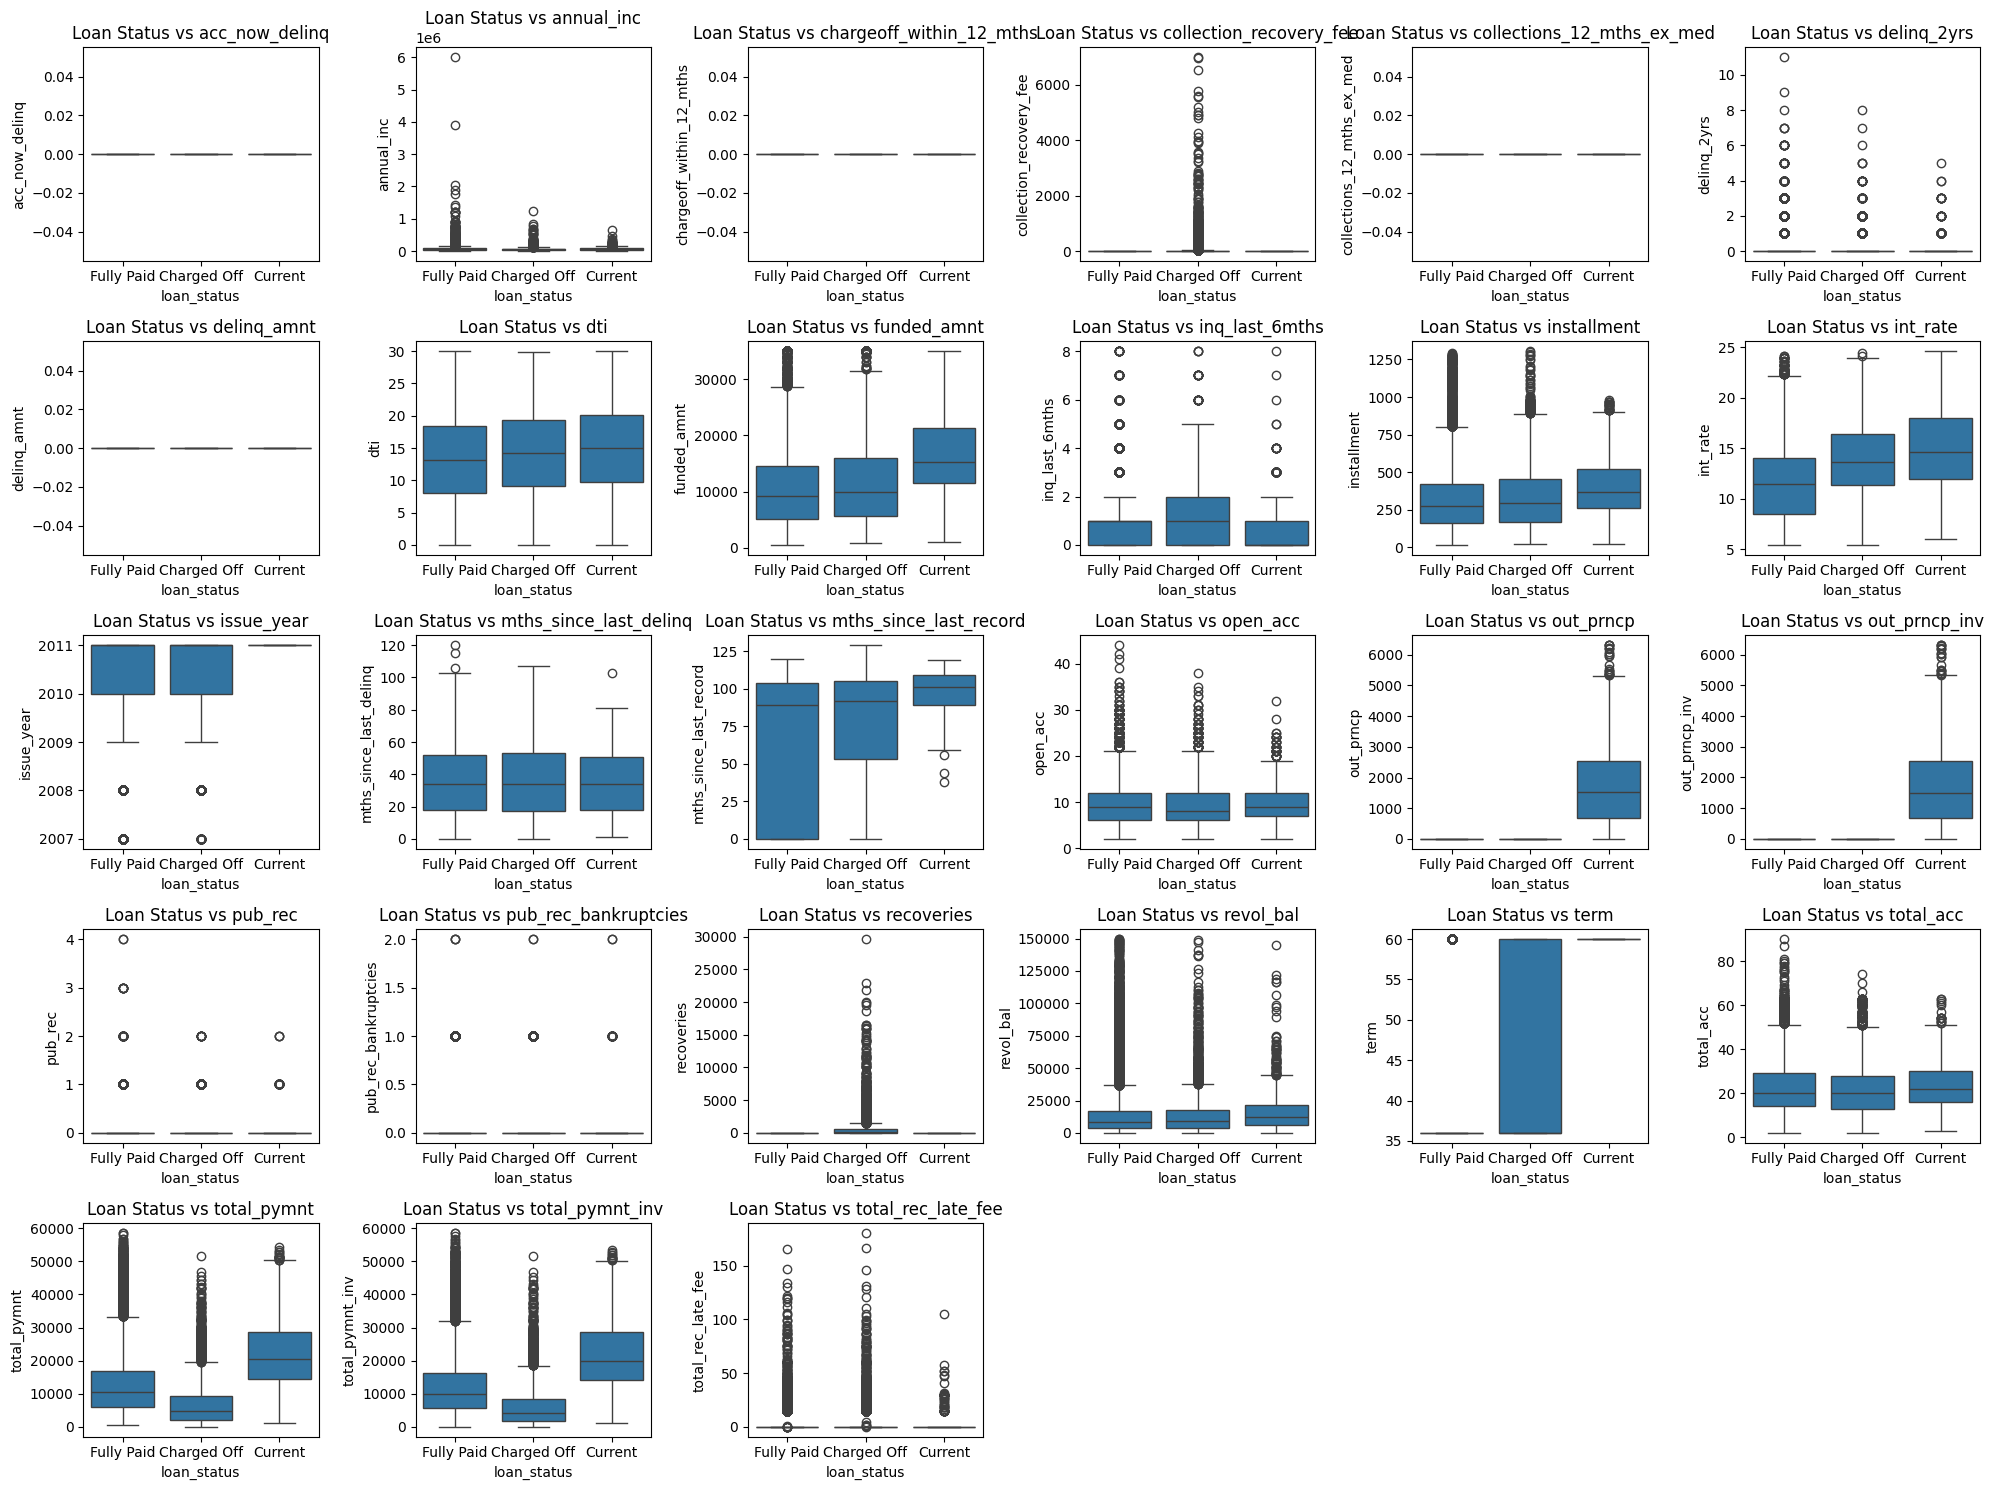

In [36]:
# Selecting numerical columns dynamically
revised_numerical_cols = df.select_dtypes(include=[np.number]).columns

# Removing specific columns
columns_to_remove = ['loan_amnt']
revised_numerical_cols = revised_numerical_cols.difference(columns_to_remove)

# Function to calculate the grid size
def calculate_grid_size(num_items):
    ncols = int(np.ceil(np.sqrt(num_items)))
    nrows = int(np.ceil(num_items / ncols))
    return nrows, ncols

# Plotting numerical columns by loan status
nrows, ncols = calculate_grid_size(len(revised_numerical_cols))
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 15))
axes = axes.flatten()

for ax, col in zip(axes, revised_numerical_cols):
    sns.boxplot(x='loan_status', y=col, data=df, ax=ax)
    ax.set_title(f'Loan Status vs {col}')

for ax in axes[len(revised_numerical_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [37]:
#Delecte annual_inc rows bigger than 2100000
# Filter out rows where annual_inc is greater than 2,100,000
df = df[df['annual_inc'] <= 2100000]

# Verify the changes
print(df['annual_inc'].max())  # Confirmed that this should be <= 2,100,000
print(df['annual_inc'].describe()) 

2039784.0
count    3.971500e+04
mean     6.872312e+04
std      5.305153e+04
min      4.000000e+03
25%      4.040200e+04
50%      5.900000e+04
75%      8.229800e+04
max      2.039784e+06
Name: annual_inc, dtype: float64


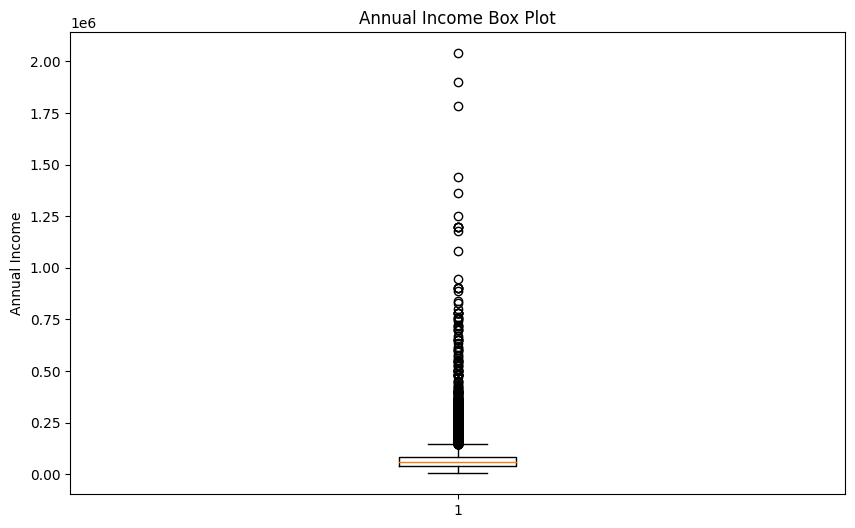

In [38]:
# Creating a box plot for the 'annual_inc' column
plt.figure(figsize=(10, 6))
plt.boxplot(df['annual_inc'].dropna())
plt.title('Annual Income Box Plot')
plt.ylabel('Annual Income')
plt.show()

In [39]:
# Define the function to categorize annual income
def categorize_annual_income(annual_inc):
    if annual_inc < 20000:
        return 'Very Low'
    elif 20000 <= annual_inc < 40402:
        return 'Low'
    elif 40402 <= annual_inc < 60000:
        return 'Medium Low'
    elif 60000 <= annual_inc <= 82298:
        return 'Medium High'
    elif 82299 <= annual_inc <= 150000:
        return 'High'
    elif 150001 <= annual_inc <= 300000:
        return 'Very High'
    else:
        return 'Ultra High'

# Apply the function to create the new column
df['annual_income_category'] = df['annual_inc'].apply(categorize_annual_income)



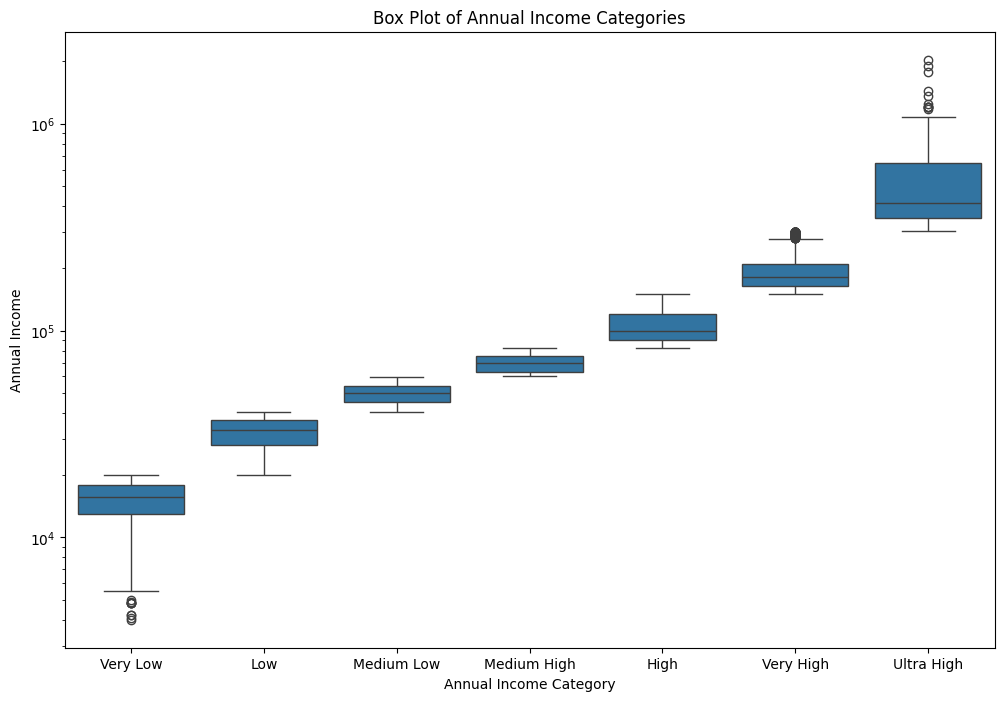

In [40]:

# Create a box plot showing the distribution of annual income in each category
plt.figure(figsize=(12, 8))
sns.boxplot(x='annual_income_category', y='annual_inc', data=df, order=['Very Low', 'Low', 'Medium Low', 'Medium High', 'High', 'Very High', 'Ultra High'])
plt.title('Box Plot of Annual Income Categories')
plt.xlabel('Annual Income Category')
plt.ylabel('Annual Income')
plt.yscale('log')  # Using logarithmic scale for better visualization if necessary
plt.show()

In [41]:
#Deleting Columns which are not required for analysis 
df.drop(['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies'],axis=1,inplace=True)
df.head()

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  \
0       5000         5000    36     10.65       162.87     B        B2   
1       2500         2500    60     15.27        59.83     C        C4   
2       2400         2400    36     15.96        84.33     C        C5   
3      10000        10000    36     13.49       339.31     C        C1   
4       3000         3000    60     12.69        67.79     B        B5   

  emp_length home_ownership  annual_inc  ... total_pymnt_inv  \
0  10+ years           RENT     24000.0  ...         5833.84   
1   < 1 year           RENT     30000.0  ...         1008.71   
2  10+ years           RENT     12252.0  ...         3005.67   
3  10+ years           RENT     49200.0  ...        12231.89   
4     1 year           RENT     80000.0  ...         3513.33   

  total_rec_late_fee recoveries collection_recovery_fee next_pymnt_d  \
0               0.00       0.00                    0.00          NaN   
1               0.00     117.08                    1.11          NaN   
2               0.00       0.00                    0.00          NaN   
3              16.97       0.00                    0.00          NaN   
4               0.00       0.00                    0.00       Jun-16   

   application_type  issue_year  season  funded_amount_categories  \
0        INDIVIDUAL        2011  Winter                    Medium   
1        INDIVIDUAL        2011  Winter                     Small   
2        INDIVIDUAL        2011  Winter                     Small   
3        INDIVIDUAL        2011  Winter                    Medium   
4        INDIVIDUAL        2011  Winter                     Small   

   annual_income_category  
0                     Low  
1                     Low  
2                Very Low  
3              Medium Low  
4             Medium High  

[5 rows x 39 columns]

## Relationships Between Charge-offs and Columns Relevant to Credit Risk Factors at the Time Loan is Issued

 -  'annual_income_category'
 - 'term', 
 - 'grade', 
 - 'sub_grade', 
 - 'emp_length',
 - 'home_ownership', 
 - 'verification_status', 
 - 'issue_d',
 - 'dti',  - ratio of monthly paments to debt obligations is relevant
 - 'addr_state',  - e.g. are some areas may have more concentrated credit risk
 - 'inq_last_6mths', 



#### Relationship between 'annual_income_category' and charge offs


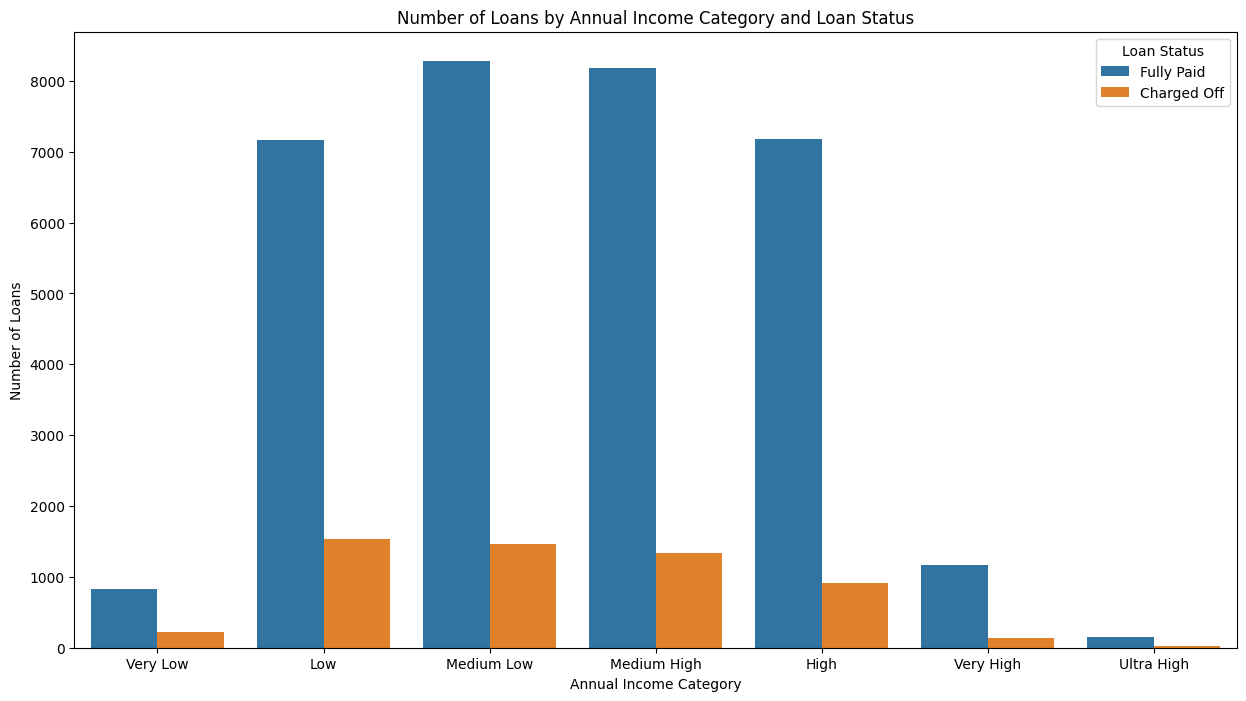

In [42]:
# Filter the DataFrame to include only 'Fully Paid' and 'Charged Off' loan statuses
filtered_df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Create the bar plot
plt.figure(figsize=(15, 8))
sns.countplot(data=filtered_df, x='annual_income_category', hue='loan_status', order=['Very Low', 'Low', 'Medium Low', 'Medium High', 'High', 'Very High', 'Ultra High'])
plt.title('Number of Loans by Annual Income Category and Loan Status')
plt.xlabel('Annual Income Category')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status')
plt.show()

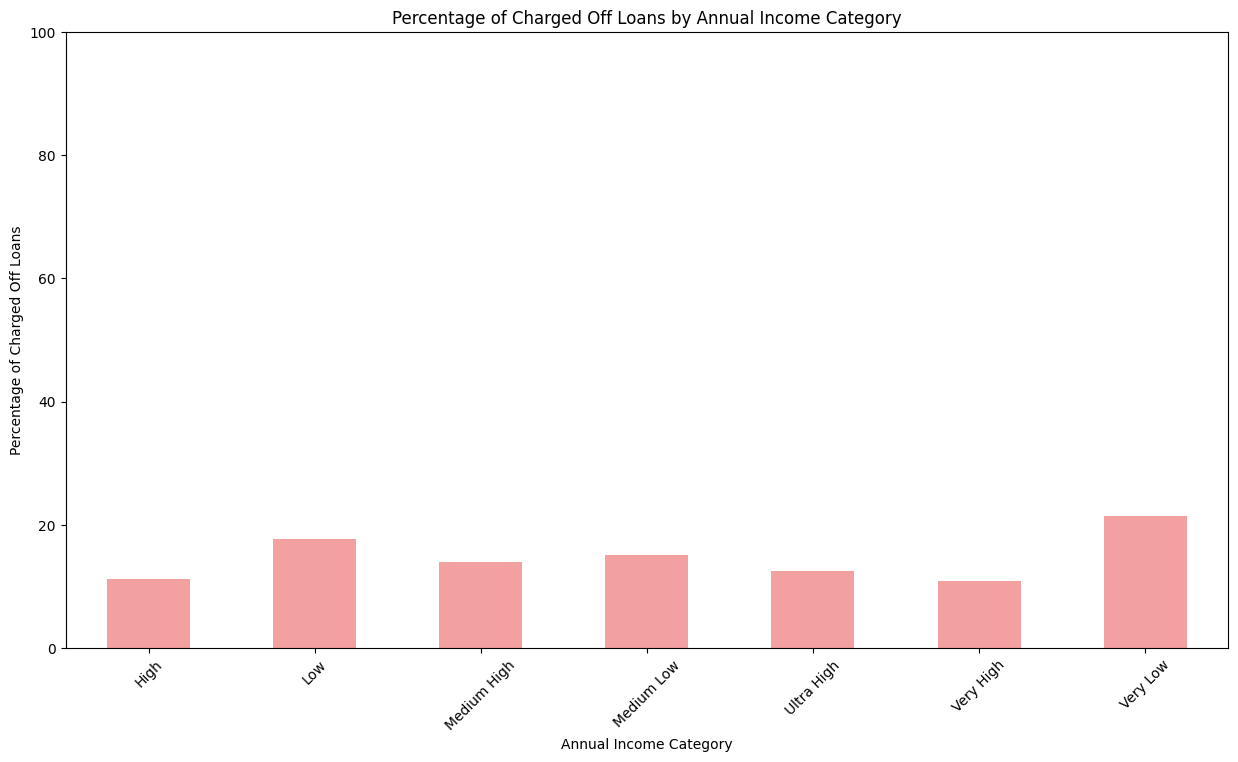

In [43]:
# Filter the DataFrame to include only 'Fully Paid' and 'Charged Off' loan statuses
filtered_df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Calculate the percentage of charged-off loans for each income category
category_counts = filtered_df.groupby('annual_income_category')['loan_status'].value_counts(normalize=True).unstack() * 100

# Plot the percentage of charged-off loans
plt.figure(figsize=(15, 8))
category_counts['Charged Off'].plot(kind='bar', color='lightcoral', alpha=0.75)
plt.title('Percentage of Charged Off Loans by Annual Income Category')
plt.xlabel('Annual Income Category')
plt.ylabel('Percentage of Charged Off Loans')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

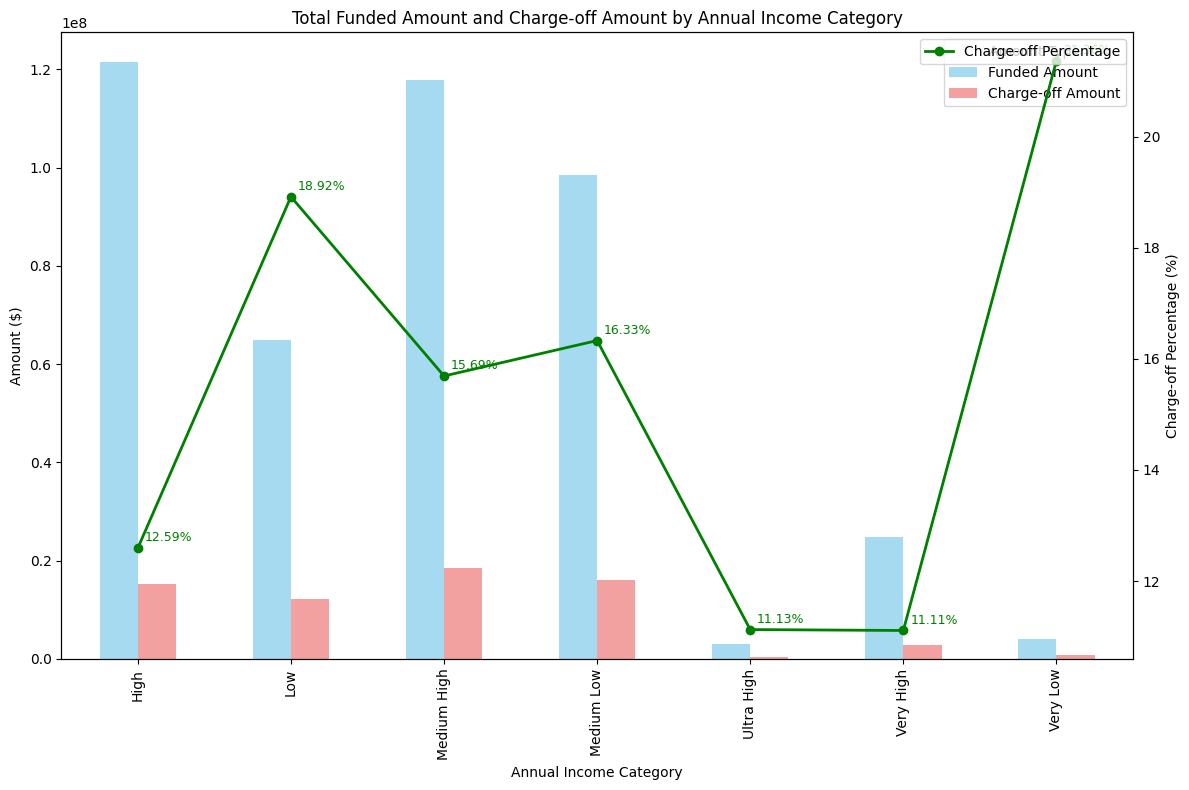

In [44]:

# Apply the function to create the new column
df['annual_income_category'] = df['annual_inc'].apply(categorize_annual_income)

# Calculate total funded amount and total charge-off amount for each annual income category
funded_amounts = df.groupby('annual_income_category')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('annual_income_category')['funded_amnt'].sum()

# Combine into a single DataFrame and fill NaN values with 0
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Calculate charge-off percentage with an additional check to avoid division by zero
comparison_df['Charge-off Percentage'] = (comparison_df['Charge-off Amount'] / comparison_df['Funded Amount']).replace([float('inf'), -float('inf')], 0) * 100
comparison_df['Charge-off Percentage'] = comparison_df['Charge-off Percentage'].fillna(0)

# Plotting the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

comparison_df[['Funded Amount', 'Charge-off Amount']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'], alpha=0.75)
ax1.set_title('Total Funded Amount and Charge-off Amount by Annual Income Category')
ax1.set_xlabel('Annual Income Category')
ax1.set_ylabel('Amount ($)')
ax1.legend(title='Amount Type')
ax1.grid(False)

# Create a second y-axis for the charge-off percentage line graph
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Charge-off Percentage'], color='green', marker='o', linestyle='-', linewidth=2, label='Charge-off Percentage')
ax2.set_ylabel('Charge-off Percentage (%)')
ax2.legend(loc='upper right')
ax2.grid(False)

# Add annotations for charge-off percentages
for i in range(len(comparison_df)):
    ax2.annotate(f"{comparison_df['Charge-off Percentage'].iloc[i]:.2f}%",
                 xy=(i, comparison_df['Charge-off Percentage'].iloc[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=9,
                 color='green')

plt.tight_layout()
plt.show()

#### Conclusion annual_inc: 
Lenders with low income produce higher charge offs

### Relationship between 'term' and charge offs

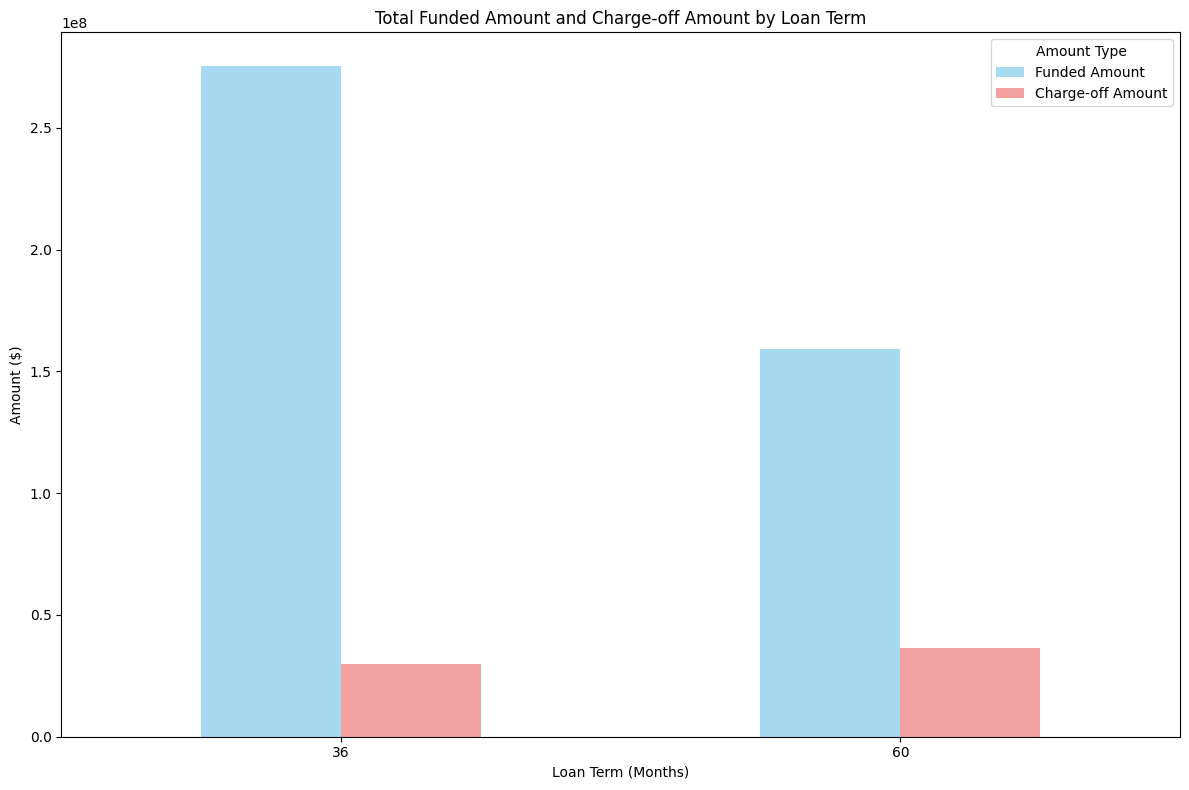

In [45]:

# Calculate total funded amount and total charge-off amount for each loan term
funded_amounts = df.groupby('term')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('term')['funded_amnt'].sum()

# Combine into a single DataFrame
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Plotting the grouped bar chart
comparison_df.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'lightcoral'], alpha=0.75)
plt.title('Total Funded Amount and Charge-off Amount by Loan Term')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Amount ($)')
plt.xticks(rotation=0)
plt.legend(title='Amount Type')
plt.tight_layout()
plt.show()

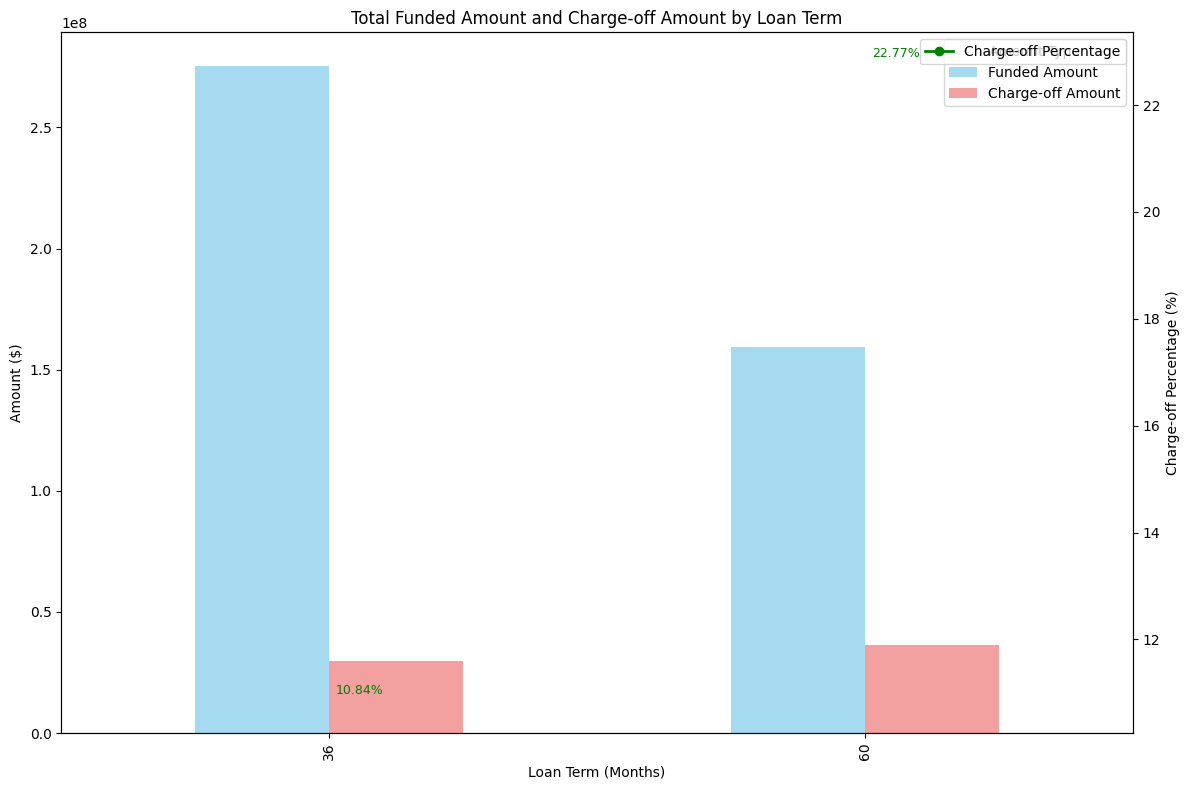

In [46]:
# Ensure the term is in numeric form if it's not already
df['term'] = df['term'].astype(str).str.extract('(\d+)').astype(int)

# Calculate total funded amount and total charge-off amount for each term
funded_amounts = df.groupby('term')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('term')['funded_amnt'].sum()

# Combine into a single DataFrame and fill NaN values with 0
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Calculate charge-off percentage with an additional check to avoid division by zero
comparison_df['Charge-off Percentage'] = (comparison_df['Charge-off Amount'] / comparison_df['Funded Amount']).replace([float('inf'), -float('inf')], 0) * 100
comparison_df['Charge-off Percentage'] = comparison_df['Charge-off Percentage'].fillna(0)

# Plotting the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

comparison_df[['Funded Amount', 'Charge-off Amount']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'], alpha=0.75)
ax1.set_title('Total Funded Amount and Charge-off Amount by Loan Term')
ax1.set_xlabel('Loan Term (Months)')
ax1.set_ylabel('Amount ($)')
ax1.legend(title='Amount Type')
ax1.grid(False)

# Create a second y-axis for the charge-off percentage line graph
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Charge-off Percentage'], color='green', marker='o', linestyle='-', linewidth=2, label='Charge-off Percentage')
ax2.set_ylabel('Charge-off Percentage (%)')
ax2.legend(loc='upper right')
ax2.grid(False)

# Add annotations for charge-off percentages
for i in range(len(comparison_df)):
    ax2.annotate(f"{comparison_df['Charge-off Percentage'].iloc[i]:.2f}%",
                 xy=(i, comparison_df['Charge-off Percentage'].iloc[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=9,
                 color='green')

plt.tight_layout()
plt.show()

#### Conclusion: term
Loans with a longer duration have higher charge offs

### Relationship between 'grade' and charge offs

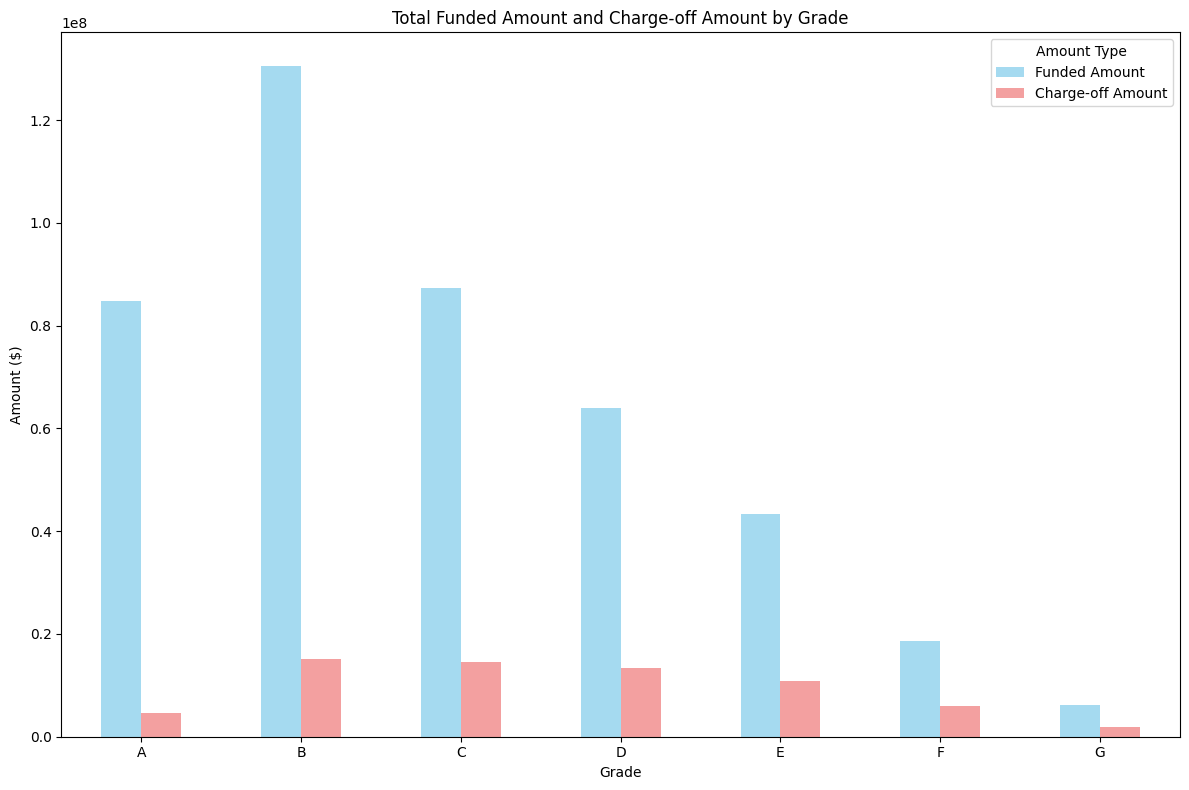

In [47]:
# Calculate total funded amount and total charge-off amount for each grade
funded_amounts = df.groupby('grade')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('grade')['funded_amnt'].sum()

# Combine into a single DataFrame
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Plotting the grouped bar chart
comparison_df.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'lightcoral'], alpha=0.75)
plt.title('Total Funded Amount and Charge-off Amount by Grade')
plt.xlabel('Grade')
plt.ylabel('Amount ($)')
plt.xticks(rotation=0)
plt.legend(title='Amount Type')
plt.tight_layout()
plt.show()

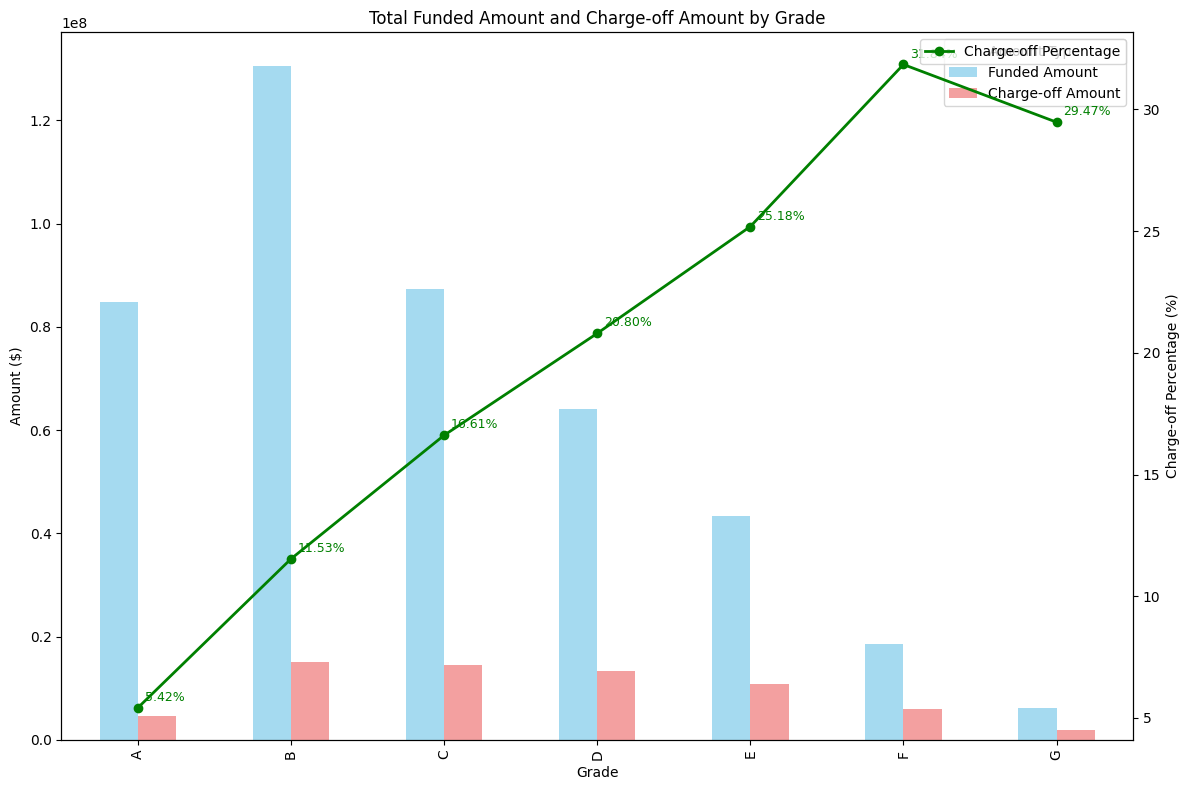

In [48]:

# Calculate total funded amount and total charge-off amount for each grade
funded_amounts = df.groupby('grade')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('grade')['funded_amnt'].sum()

# Combine into a single DataFrame and fill NaN values with 0
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Calculate charge-off percentage with an additional check to avoid division by zero
comparison_df['Charge-off Percentage'] = (comparison_df['Charge-off Amount'] / comparison_df['Funded Amount']).replace([float('inf'), -float('inf')], 0) * 100
comparison_df['Charge-off Percentage'] = comparison_df['Charge-off Percentage'].fillna(0)

# Plotting the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

comparison_df[['Funded Amount', 'Charge-off Amount']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'], alpha=0.75)
ax1.set_title('Total Funded Amount and Charge-off Amount by Grade')
ax1.set_xlabel('Grade')
ax1.set_ylabel('Amount ($)')
ax1.legend(title='Amount Type')
ax1.grid(False)

# Create a second y-axis for the charge-off percentage line graph
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Charge-off Percentage'], color='green', marker='o', linestyle='-', linewidth=2, label='Charge-off Percentage')
ax2.set_ylabel('Charge-off Percentage (%)')
ax2.legend(loc='upper right')
ax2.grid(False)

# Add annotations for charge-off percentages
for i in range(len(comparison_df)):
    ax2.annotate(f"{comparison_df['Charge-off Percentage'].iloc[i]:.2f}%",
                 xy=(i, comparison_df['Charge-off Percentage'].iloc[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=9,
                 color='green')

plt.tight_layout()
plt.show()

#### Conclusion: grade
Loans with a grade of C,D, E, F have an increasingly higher chance of charge-offs 

### Relationship between 'sub-grade' and charge offs

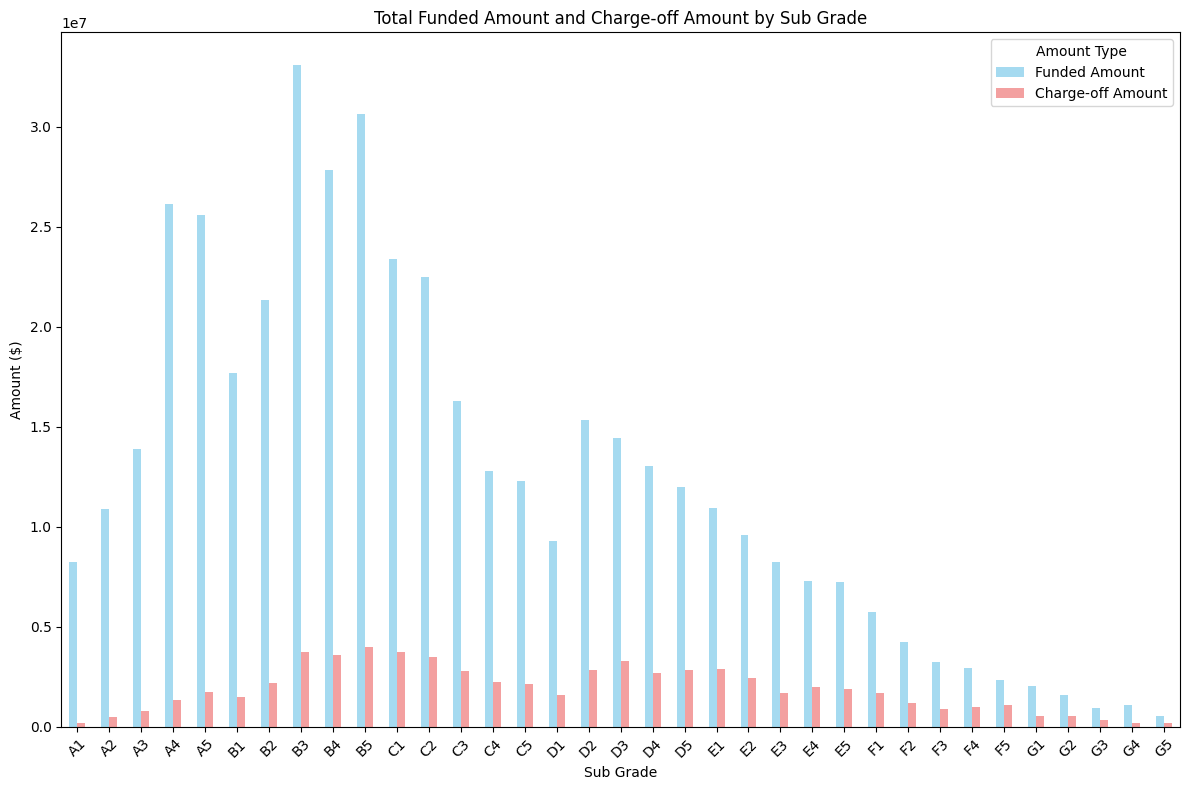

In [49]:
# Calculate total funded amount and total charge-off amount for each sub_grade
funded_amounts = df.groupby('sub_grade')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('sub_grade')['funded_amnt'].sum()

# Combine into a single DataFrame
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Plotting the grouped bar chart
comparison_df.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'lightcoral'], alpha=0.75)
plt.title('Total Funded Amount and Charge-off Amount by Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.legend(title='Amount Type')
plt.tight_layout()
plt.show()

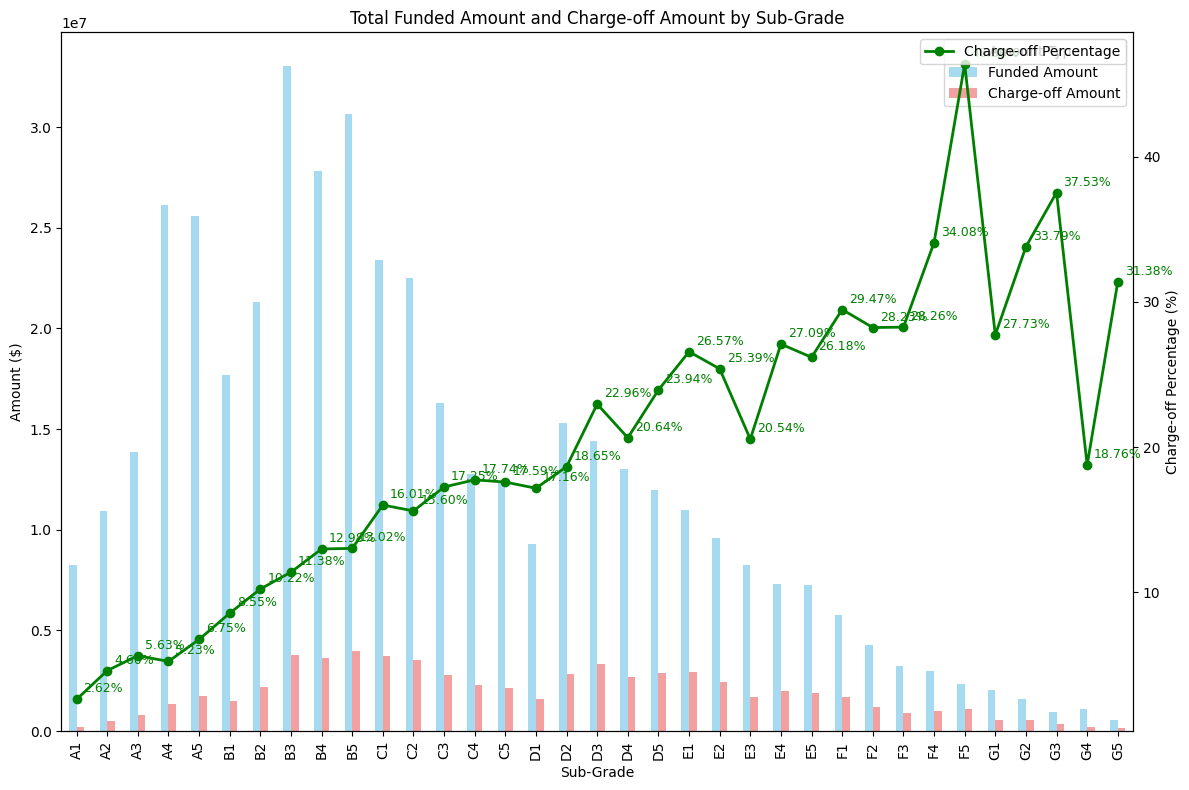

In [50]:

# Calculate total funded amount and total charge-off amount for each sub_grade
funded_amounts = df.groupby('sub_grade')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('sub_grade')['funded_amnt'].sum()

# Combine into a single DataFrame and fill NaN values with 0
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Calculate charge-off percentage with an additional check to avoid division by zero
comparison_df['Charge-off Percentage'] = (comparison_df['Charge-off Amount'] / comparison_df['Funded Amount']).replace([float('inf'), -float('inf')], 0) * 100
comparison_df['Charge-off Percentage'] = comparison_df['Charge-off Percentage'].fillna(0)

# Plotting the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

comparison_df[['Funded Amount', 'Charge-off Amount']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'], alpha=0.75)
ax1.set_title('Total Funded Amount and Charge-off Amount by Sub-Grade')
ax1.set_xlabel('Sub-Grade')
ax1.set_ylabel('Amount ($)')
ax1.legend(title='Amount Type')
ax1.grid(False)

# Create a second y-axis for the charge-off percentage line graph
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Charge-off Percentage'], color='green', marker='o', linestyle='-', linewidth=2, label='Charge-off Percentage')
ax2.set_ylabel('Charge-off Percentage (%)')
ax2.legend(loc='upper right')
ax2.grid(False)

# Add annotations for charge-off percentages
for i in range(len(comparison_df)):
    ax2.annotate(f"{comparison_df['Charge-off Percentage'].iloc[i]:.2f}%",
                 xy=(i, comparison_df['Charge-off Percentage'].iloc[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=9,
                 color='green')

plt.tight_layout()
plt.show()

#### Conclusion: sub-grade
This analysis reinforces the idea that grades is a good predictor of charge-offs, except surprisingly for the final bucket G. There might be something wrong with the final sub-grade buckets.

### Relationship between 'emp_len' and charge offs

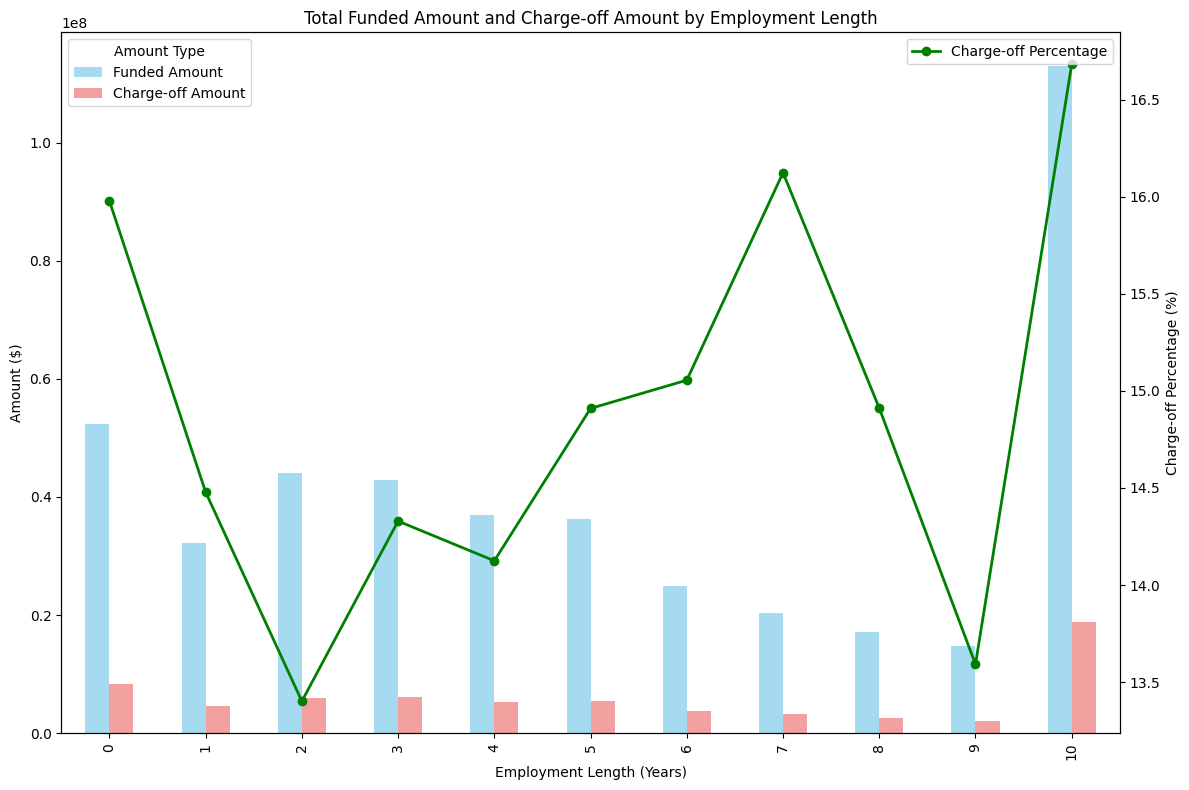

In [51]:

# Convert all values in emp_length to strings
df['emp_length'] = df['emp_length'].astype(str)

# Clean emp_length column
df['emp_length'] = df['emp_length'].replace({'< 1 year': '0', 'n/a': '0', '10+ years': '10'}).str.extract('(\d+)').fillna(0).astype(int)

# Calculate total funded amount and total charge-off amount for each emp_length
funded_amounts = df.groupby('emp_length')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('emp_length')['funded_amnt'].sum()

# Combine into a single DataFrame and fill NaN values with 0
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Calculate charge-off percentage with an additional check to avoid division by zero
comparison_df['Charge-off Percentage'] = (comparison_df['Charge-off Amount'] / comparison_df['Funded Amount']).replace([float('inf'), -float('inf')], 0) * 100
comparison_df['Charge-off Percentage'] = comparison_df['Charge-off Percentage'].fillna(0)

# Plotting the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

comparison_df[['Funded Amount', 'Charge-off Amount']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'], alpha=0.75)
ax1.set_title('Total Funded Amount and Charge-off Amount by Employment Length')
ax1.set_xlabel('Employment Length (Years)')
ax1.set_ylabel('Amount ($)')
ax1.legend(title='Amount Type')
ax1.grid(False)

# Create a second y-axis for the charge-off percentage line graph
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Charge-off Percentage'], color='green', marker='o', linestyle='-', linewidth=2, label='Charge-off Percentage')
ax2.set_ylabel('Charge-off Percentage (%)')
ax2.legend(loc='upper right')
ax2.grid(False)

plt.tight_layout()
plt.show()

#### Conclusion: emp_length
The highest charge-offs as a percentage of funded loans is highest for those with 0 employee length, followed by those with 10 years of employment

### Relationship between 'home_ownership' and charge offs

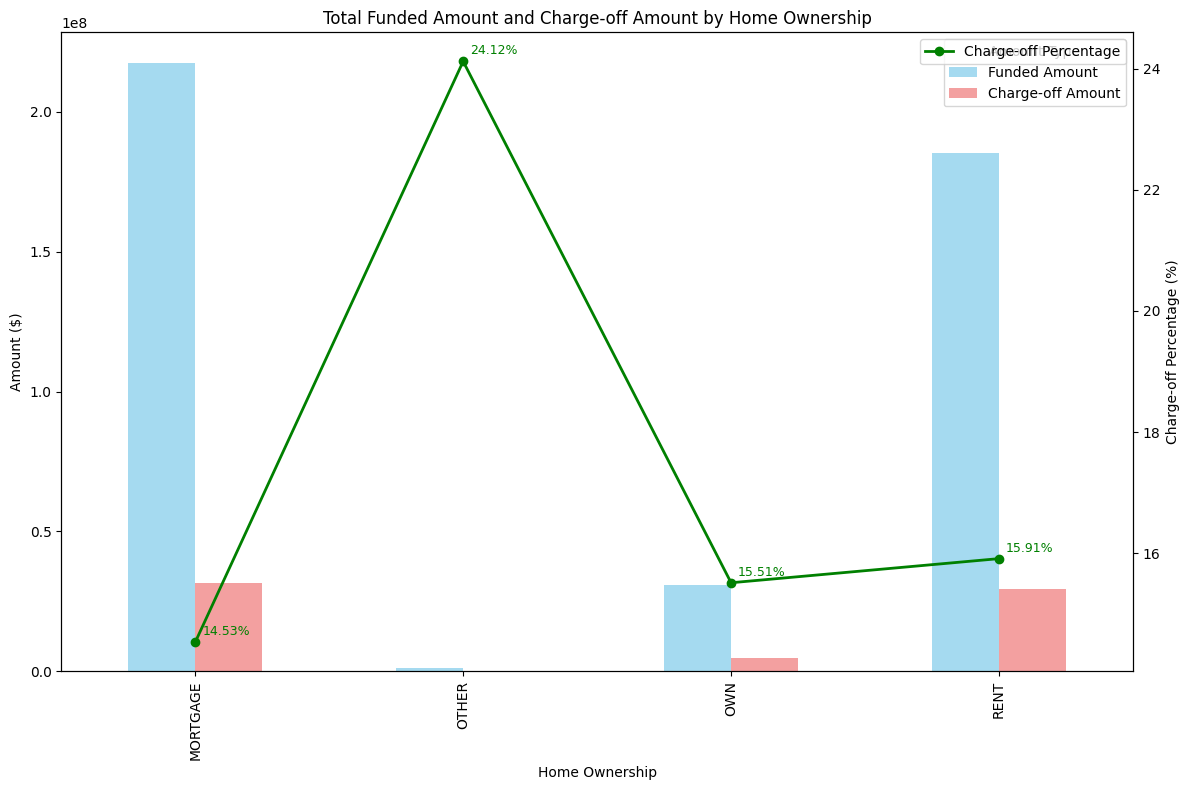

In [52]:

# Remove rows with "None" in home_ownership
df = df[df['home_ownership'] != 'NONE']

# Calculate total funded amount and total charge-off amount for each home ownership category
funded_amounts = df.groupby('home_ownership')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('home_ownership')['funded_amnt'].sum()

# Combine into a single DataFrame and fill NaN values with 0
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Calculate charge-off percentage with an additional check to avoid division by zero
comparison_df['Charge-off Percentage'] = (comparison_df['Charge-off Amount'] / comparison_df['Funded Amount']).replace([float('inf'), -float('inf')], 0) * 100
comparison_df['Charge-off Percentage'] = comparison_df['Charge-off Percentage'].fillna(0)

# Plotting the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

comparison_df[['Funded Amount', 'Charge-off Amount']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'], alpha=0.75)
ax1.set_title('Total Funded Amount and Charge-off Amount by Home Ownership')
ax1.set_xlabel('Home Ownership')
ax1.set_ylabel('Amount ($)')
ax1.legend(title='Amount Type')
ax1.grid(False)

# Create a second y-axis for the charge-off percentage line graph
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Charge-off Percentage'], color='green', marker='o', linestyle='-', linewidth=2, label='Charge-off Percentage')
ax2.set_ylabel('Charge-off Percentage (%)')
ax2.legend(loc='upper right')
ax2.grid(False)

# Add annotations for charge-off percentages
for i in range(len(comparison_df)):
    ax2.annotate(f"{comparison_df['Charge-off Percentage'].iloc[i]:.2f}%",
                 xy=(i, comparison_df['Charge-off Percentage'].iloc[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=9,
                 color='green')

plt.tight_layout()
plt.show()


#### Conclusion: home_ownership
The highest charge-offs as a percentage of funded loans is highest for those with "OTHER" listed for home ownership'. Those who have a mortgage have a slightly lower of default when compared owners of properties or renters.

### Relationship between 'verification_status' and charge offs

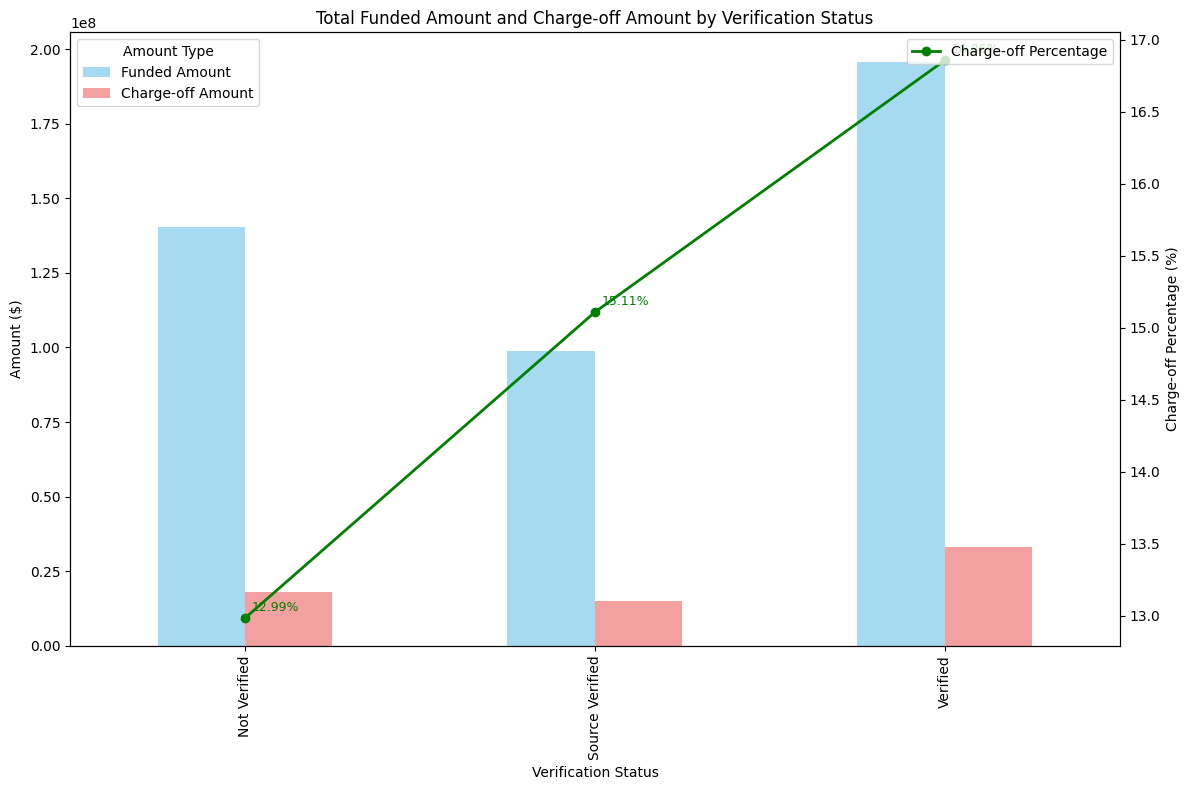

In [53]:

# Calculate total funded amount and total charge-off amount for each verification status category
funded_amounts = df.groupby('verification_status')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('verification_status')['funded_amnt'].sum()

# Combine into a single DataFrame and fill NaN values with 0
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Calculate charge-off percentage with an additional check to avoid division by zero
comparison_df['Charge-off Percentage'] = (comparison_df['Charge-off Amount'] / comparison_df['Funded Amount']).replace([float('inf'), -float('inf')], 0) * 100
comparison_df['Charge-off Percentage'] = comparison_df['Charge-off Percentage'].fillna(0)

# Plotting the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

comparison_df[['Funded Amount', 'Charge-off Amount']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'], alpha=0.75)
ax1.set_title('Total Funded Amount and Charge-off Amount by Verification Status')
ax1.set_xlabel('Verification Status')
ax1.set_ylabel('Amount ($)')
ax1.legend(title='Amount Type')
ax1.grid(False)

# Create a second y-axis for the charge-off percentage line graph
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Charge-off Percentage'], color='green', marker='o', linestyle='-', linewidth=2, label='Charge-off Percentage')
ax2.set_ylabel('Charge-off Percentage (%)')
ax2.legend(loc='upper right')
ax2.grid(False)

# Add annotations for charge-off percentages
for i in range(len(comparison_df)):
    ax2.annotate(f"{comparison_df['Charge-off Percentage'].iloc[i]:.2f}%",
                 xy=(i, comparison_df['Charge-off Percentage'].iloc[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=9,
                 color='green')

plt.tight_layout()
plt.show()

#### Conclusion: home_ownership
The highest charge-offs are for those who are verified. 

### Relationship between 'dti' and charge offs

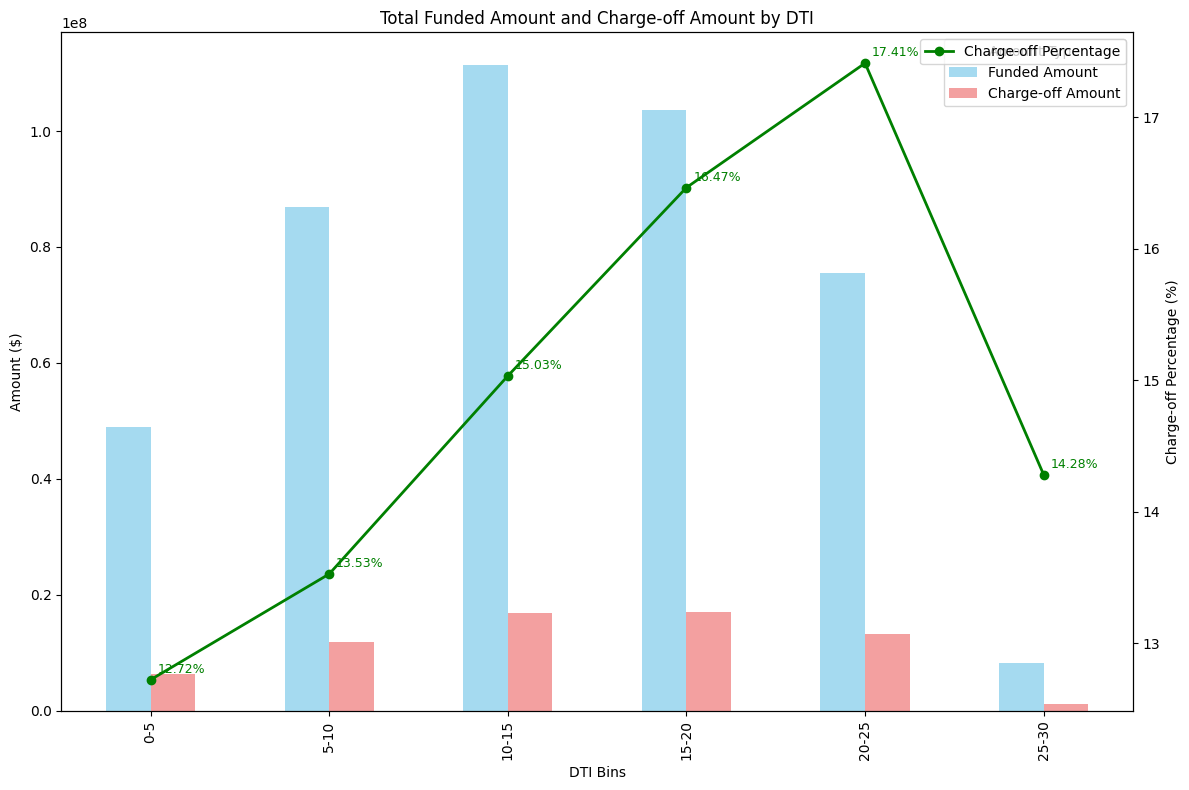

In [54]:

# Define bins and labels for dti within the range of 0 to 30
bins = [0, 5, 10, 15, 20, 25, 30]  # Adjust these ranges as needed
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']

# Create a new column for binned dti
df['dti_bins'] = pd.cut(df['dti'], bins=bins, labels=labels, include_lowest=True)

# Calculate total funded amount and total charge-off amount for each dti category
funded_amounts = df.groupby('dti_bins')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('dti_bins')['funded_amnt'].sum()

# Combine into a single DataFrame and fill NaN values with 0
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Calculate charge-off percentage with an additional check to avoid division by zero
comparison_df['Charge-off Percentage'] = (comparison_df['Charge-off Amount'] / comparison_df['Funded Amount']).replace([float('inf'), -float('inf')], 0) * 100
comparison_df['Charge-off Percentage'] = comparison_df['Charge-off Percentage'].fillna(0)

# Plotting the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

comparison_df[['Funded Amount', 'Charge-off Amount']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'], alpha=0.75)
ax1.set_title('Total Funded Amount and Charge-off Amount by DTI')
ax1.set_xlabel('DTI Bins')
ax1.set_ylabel('Amount ($)')
ax1.legend(title='Amount Type')
ax1.grid(False)

# Create a second y-axis for the charge-off percentage line graph
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Charge-off Percentage'], color='green', marker='o', linestyle='-', linewidth=2, label='Charge-off Percentage')
ax2.set_ylabel('Charge-off Percentage (%)')
ax2.legend(loc='upper right')
ax2.grid(False)

# Add annotations for charge-off percentages
for i in range(len(comparison_df)):
    ax2.annotate(f"{comparison_df['Charge-off Percentage'].iloc[i]:.2f}%",
                 xy=(i, comparison_df['Charge-off Percentage'].iloc[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=9,
                 color='green')

plt.tight_layout()
plt.show()

#### Conclusion: dti
Charge-offs increase as the dti ratio increases until 25, and then dips for the 25-30 bucket.

### Relationship between 'addr_state' and charge offs

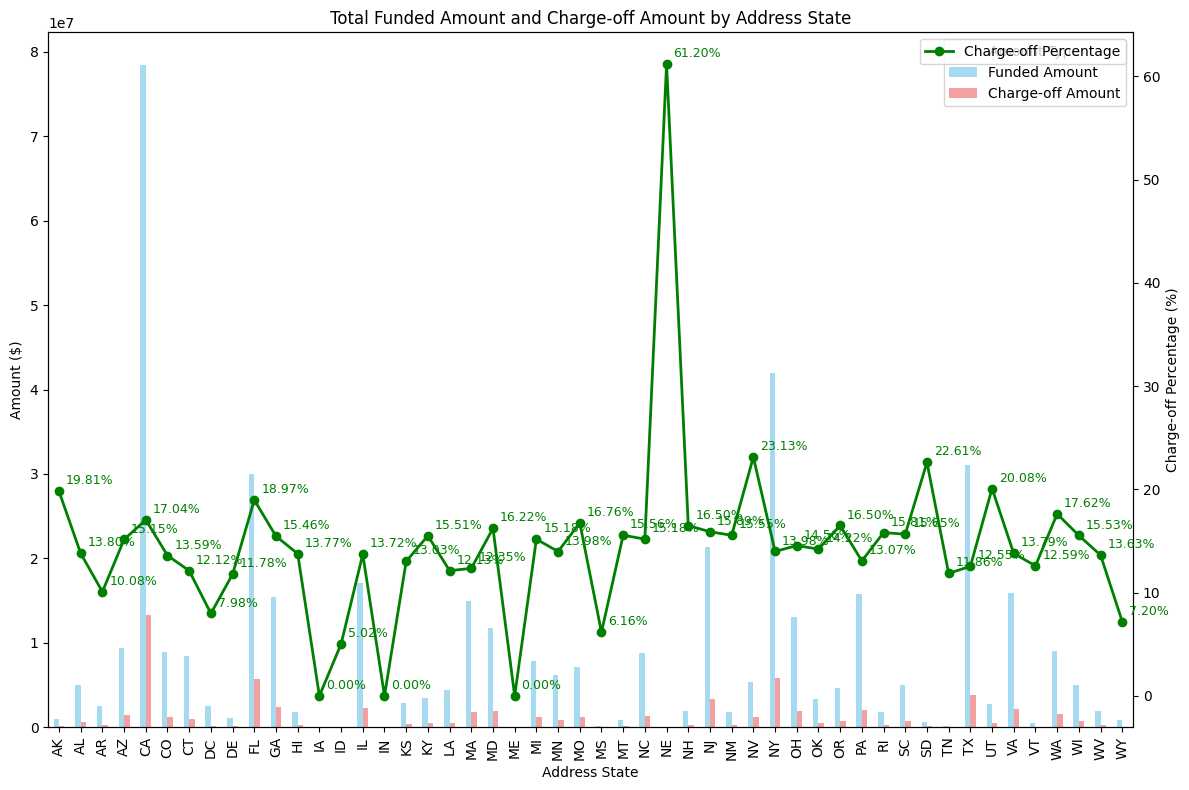

In [55]:

# Calculate total funded amount and total charge-off amount for each address state
funded_amounts = df.groupby('addr_state')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('addr_state')['funded_amnt'].sum()

# Combine into a single DataFrame and fill NaN values with 0
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Calculate charge-off percentage with an additional check to avoid division by zero
comparison_df['Charge-off Percentage'] = (comparison_df['Charge-off Amount'] / comparison_df['Funded Amount']).replace([float('inf'), -float('inf')], 0) * 100
comparison_df['Charge-off Percentage'] = comparison_df['Charge-off Percentage'].fillna(0)

# Plotting the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

comparison_df[['Funded Amount', 'Charge-off Amount']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'], alpha=0.75)
ax1.set_title('Total Funded Amount and Charge-off Amount by Address State')
ax1.set_xlabel('Address State')
ax1.set_ylabel('Amount ($)')
ax1.legend(title='Amount Type')
ax1.grid(False)

# Create a second y-axis for the charge-off percentage line graph
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Charge-off Percentage'], color='green', marker='o', linestyle='-', linewidth=2, label='Charge-off Percentage')
ax2.set_ylabel('Charge-off Percentage (%)')
ax2.legend(loc='upper right')
ax2.grid(False)

# Add annotations for charge-off percentages
for i in range(len(comparison_df)):
    ax2.annotate(f"{comparison_df['Charge-off Percentage'].iloc[i]:.2f}%",
                 xy=(i, comparison_df['Charge-off Percentage'].iloc[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=9,
                 color='green')

plt.tight_layout()
plt.show()

#### Conclusion: 'addr_state'
The NE state has more than 61% charge offs

### Relationship between inq_last_6mths and charge offs

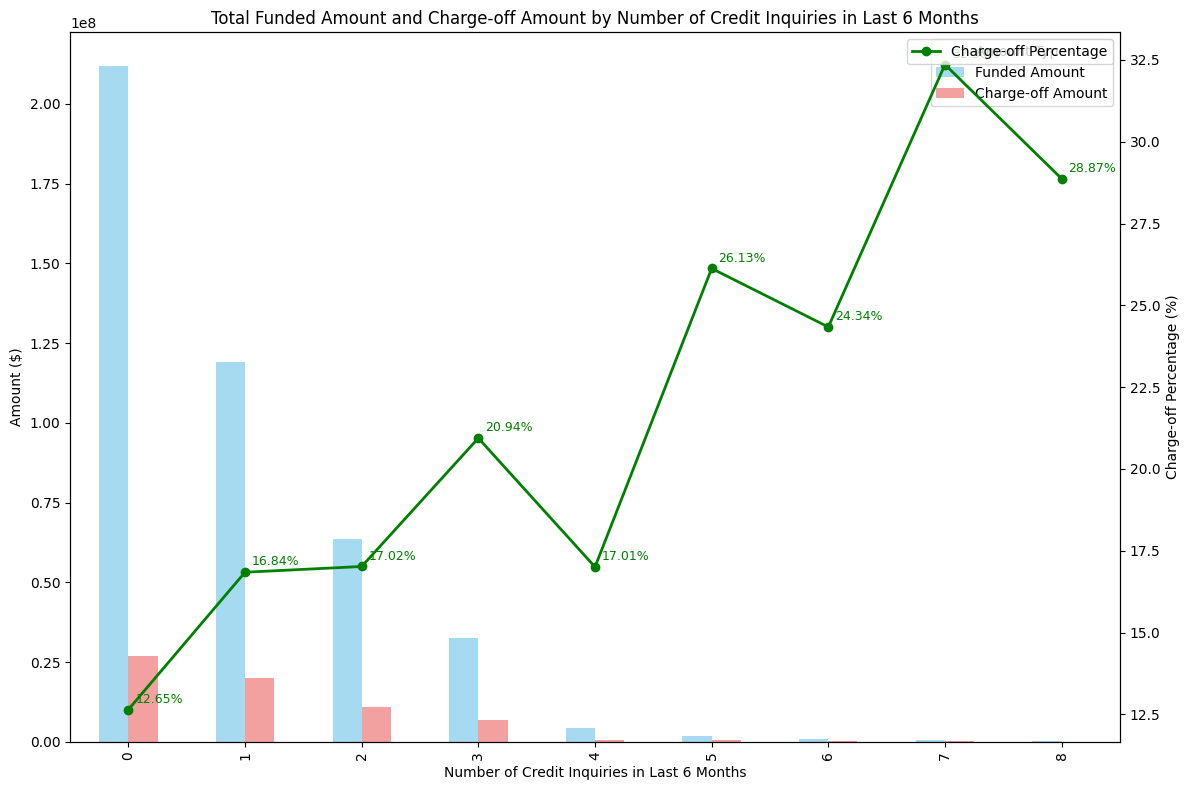

In [56]:

# Calculate total funded amount and total charge-off amount for each number of inquiries in the last 6 months
funded_amounts = df.groupby('inq_last_6mths')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('inq_last_6mths')['funded_amnt'].sum()

# Combine into a single DataFrame and fill NaN values with 0
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Calculate charge-off percentage with an additional check to avoid division by zero
comparison_df['Charge-off Percentage'] = (comparison_df['Charge-off Amount'] / comparison_df['Funded Amount']).replace([float('inf'), -float('inf')], 0) * 100
comparison_df['Charge-off Percentage'] = comparison_df['Charge-off Percentage'].fillna(0)

# Plotting the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

comparison_df[['Funded Amount', 'Charge-off Amount']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'], alpha=0.75)
ax1.set_title('Total Funded Amount and Charge-off Amount by Number of Credit Inquiries in Last 6 Months')
ax1.set_xlabel('Number of Credit Inquiries in Last 6 Months')
ax1.set_ylabel('Amount ($)')
ax1.legend(title='Amount Type')
ax1.grid(False)

# Create a second y-axis for the charge-off percentage line graph
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Charge-off Percentage'], color='green', marker='o', linestyle='-', linewidth=2, label='Charge-off Percentage')
ax2.set_ylabel('Charge-off Percentage (%)')
ax2.legend(loc='upper right')
ax2.grid(False)

# Add annotations for charge-off percentages
for i in range(len(comparison_df)):
    ax2.annotate(f"{comparison_df['Charge-off Percentage'].iloc[i]:.2f}%",
                 xy=(i, comparison_df['Charge-off Percentage'].iloc[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=9,
                 color='green')

plt.tight_layout()
plt.show()

#### Conclusion: 'inq_last_6mths'
There appears to be more charge-offs related to the number of credit enquiries

In [57]:
df.head()

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  \
0       5000         5000    36     10.65       162.87     B        B2   
1       2500         2500    60     15.27        59.83     C        C4   
2       2400         2400    36     15.96        84.33     C        C5   
3      10000        10000    36     13.49       339.31     C        C1   
4       3000         3000    60     12.69        67.79     B        B5   

   emp_length home_ownership  annual_inc  ... total_rec_late_fee recoveries  \
0          10           RENT     24000.0  ...               0.00       0.00   
1           0           RENT     30000.0  ...               0.00     117.08   
2          10           RENT     12252.0  ...               0.00       0.00   
3          10           RENT     49200.0  ...              16.97       0.00   
4           1           RENT     80000.0  ...               0.00       0.00   

  collection_recovery_fee next_pymnt_d application_type  issue_year  season  \
0                    0.00          NaN       INDIVIDUAL        2011  Winter   
1                    1.11          NaN       INDIVIDUAL        2011  Winter   
2                    0.00          NaN       INDIVIDUAL        2011  Winter   
3                    0.00          NaN       INDIVIDUAL        2011  Winter   
4                    0.00       Jun-16       INDIVIDUAL        2011  Winter   

  funded_amount_categories  annual_income_category  dti_bins  
0                   Medium                     Low     25-30  
1                    Small                     Low       0-5  
2                    Small                Very Low      5-10  
3                   Medium              Medium Low     15-20  
4                    Small             Medium High     15-20  

[5 rows x 40 columns]

# Columns Related to Data Arising After Loan was Made


- 'loan_status', 
- 'delinq_2yrs', 
- 'mths_since_last_delinq', 
- 'open_acc',
- 'total_acc', 
- 'pub_rec', - to check which column it goes in
- 'earliest_cr_line',  
- 'int_rate',
- 'total_rec_late_fee',




In [58]:
# Ensure correct data types
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')

# Calculate derived columns
df['total_pymnt_diff'] = df['total_pymnt'] - df['total_pymnt_inv']

# List of columns for analysis
columns_for_analysis = [
    'grade','loan_status', 'delinq_2yrs', 'mths_since_last_delinq', 'open_acc',
    'pub_rec', 'earliest_cr_line', 'int_rate', 'total_acc', 'out_prncp',
    'out_prncp_inv', 'total_pymnt', 'total_rec_late_fee', 'total_pymnt_diff'
]

# Filter the DataFrame for these columns
analysis_df = df[columns_for_analysis]

/var/folders/6t/_79q7tmj2sd9_qz9dztb9z1w0000gn/T/ipykernel_39039/899651023.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = analysis_df.corr()


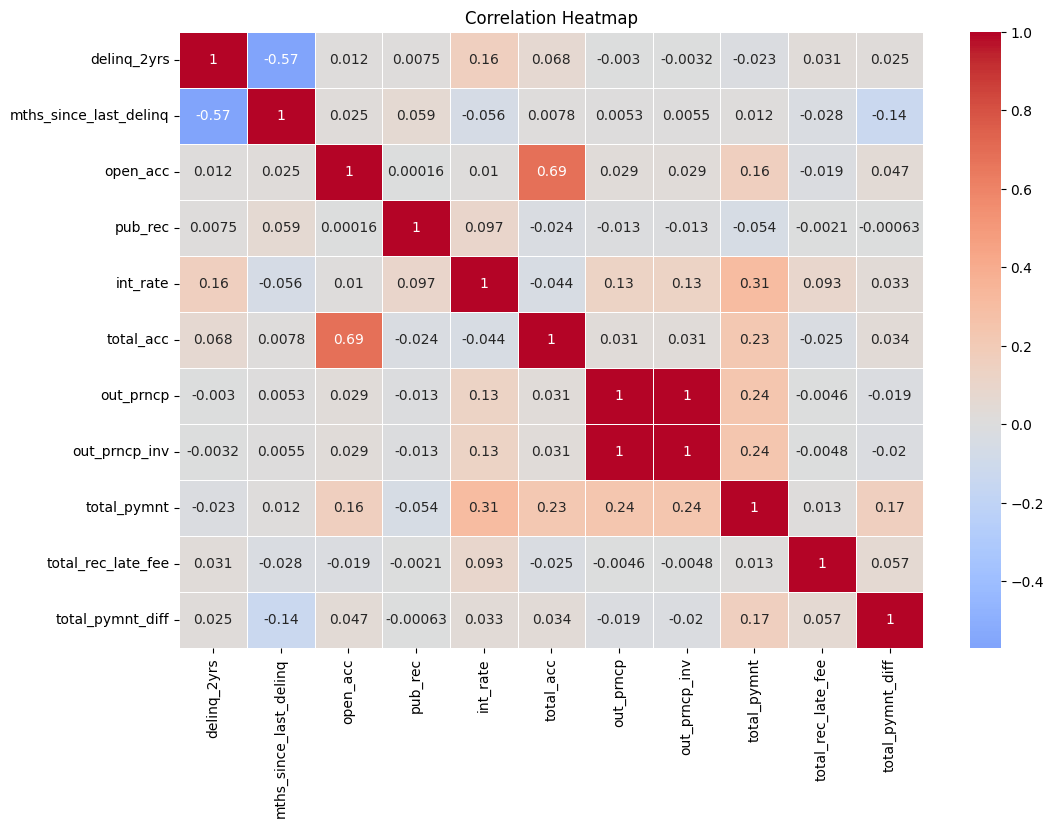

In [59]:
# Compute the correlation matrix
correlation_matrix = analysis_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

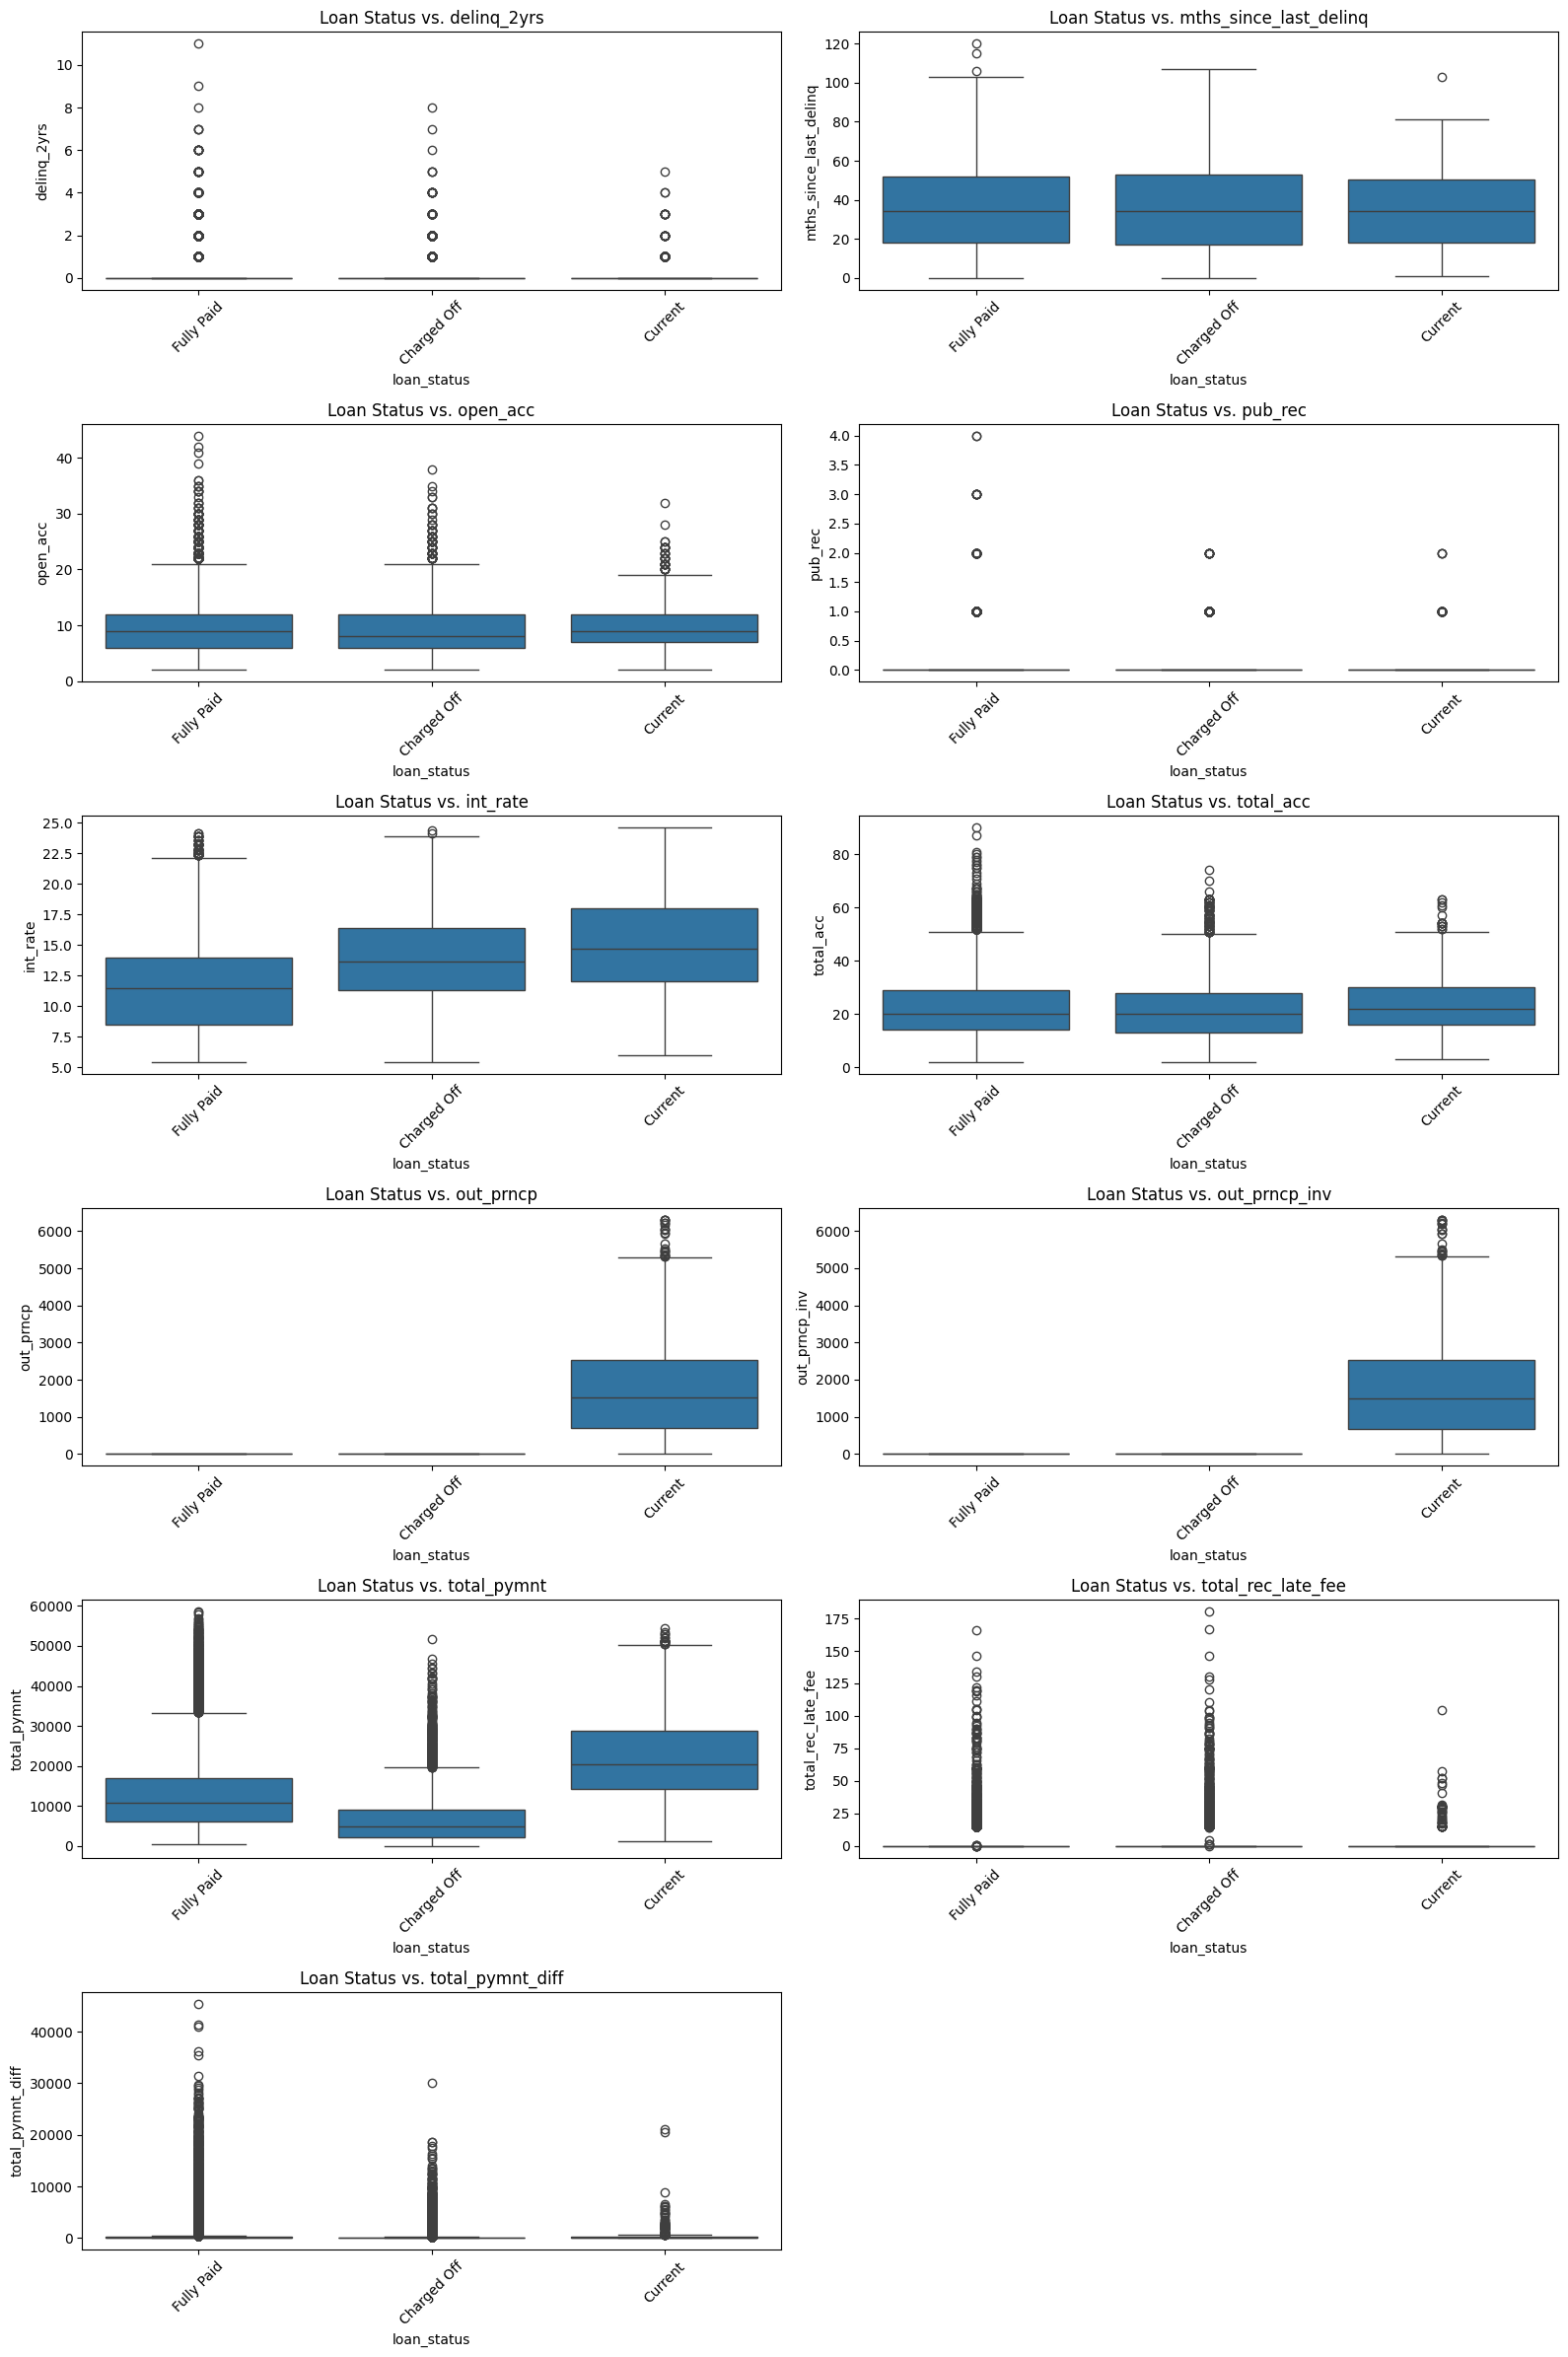

In [60]:
# Box plots for loan_status against numerical variables
numerical_columns = [
    'delinq_2yrs', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 
    'int_rate', 'total_acc', 'out_prncp', 'out_prncp_inv', 
    'total_pymnt', 'total_rec_late_fee', 'total_pymnt_diff'
]

plt.figure(figsize=(16, 24))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(6, 2, i)
    sns.boxplot(x='loan_status', y=col, data=analysis_df)
    plt.title(f'Loan Status vs. {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Relationship between delinq_2yrs and charge offs

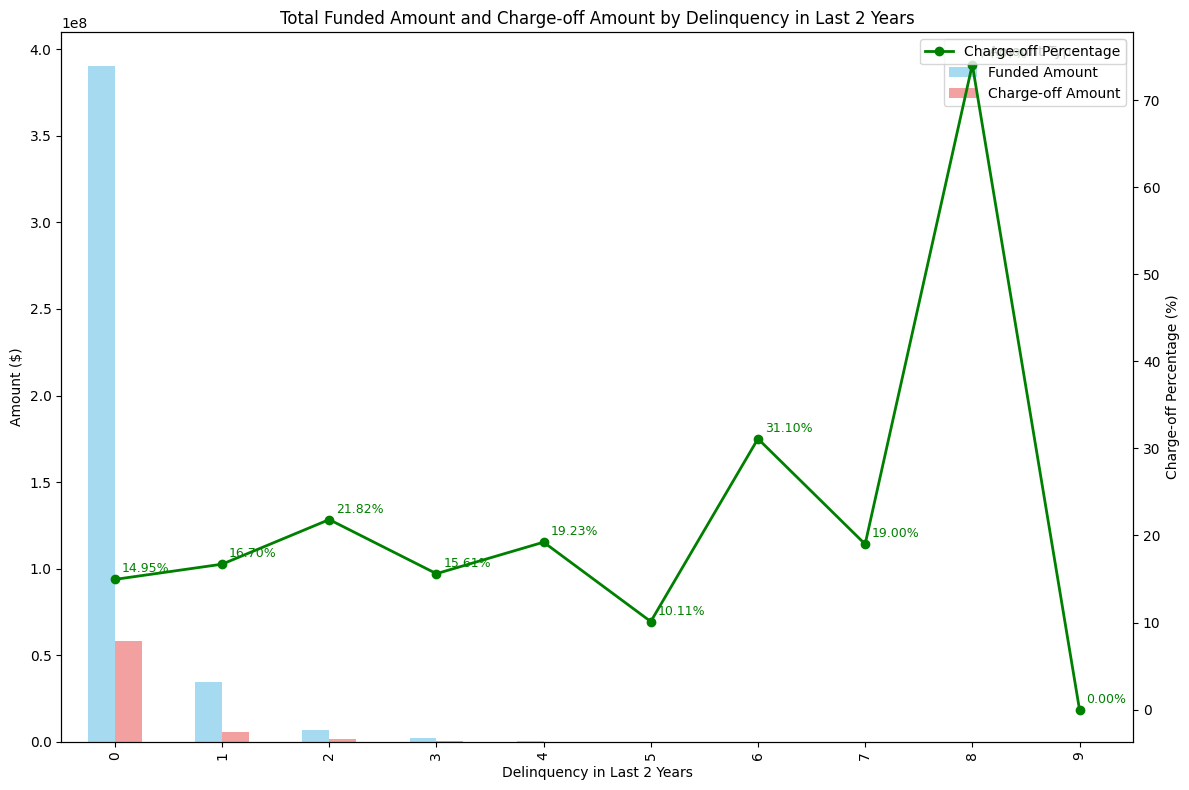

In [61]:

# Ensure the delinq_2yrs is in numeric form and filter for values <= 9
df['delinq_2yrs'] = pd.to_numeric(df['delinq_2yrs'], errors='coerce')
df = df[df['delinq_2yrs'] <= 9]

# Calculate total funded amount and total charge-off amount for each delinq_2yrs
funded_amounts = df.groupby('delinq_2yrs')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('delinq_2yrs')['funded_amnt'].sum()

# Combine into a single DataFrame and fill NaN values with 0
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Calculate charge-off percentage with an additional check to avoid division by zero
comparison_df['Charge-off Percentage'] = (comparison_df['Charge-off Amount'] / comparison_df['Funded Amount']).replace([float('inf'), -float('inf')], 0) * 100
comparison_df['Charge-off Percentage'] = comparison_df['Charge-off Percentage'].fillna(0)

# Plotting the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

comparison_df[['Funded Amount', 'Charge-off Amount']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'], alpha=0.75)
ax1.set_title('Total Funded Amount and Charge-off Amount by Delinquency in Last 2 Years')
ax1.set_xlabel('Delinquency in Last 2 Years')
ax1.set_ylabel('Amount ($)')
ax1.legend(title='Amount Type')
ax1.grid(False)

# Create a second y-axis for the charge-off percentage line graph
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Charge-off Percentage'], color='green', marker='o', linestyle='-', linewidth=2, label='Charge-off Percentage')
ax2.set_ylabel('Charge-off Percentage (%)')
ax2.legend(loc='upper right')
ax2.grid(False)

# Add annotations for charge-off percentages
for i in range(len(comparison_df)):
    ax2.annotate(f"{comparison_df['Charge-off Percentage'].iloc[i]:.2f}%",
                 xy=(i, comparison_df['Charge-off Percentage'].iloc[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=9,
                 color='green')

plt.tight_layout()
plt.show()

#### Conclusion: "delinq_2yrs'
Conclusion : There is a relationship between the number of 30+ days past-due incidences of delinquency and charge-offs

### Relationship between mths_since_last_delinq  and charge offs

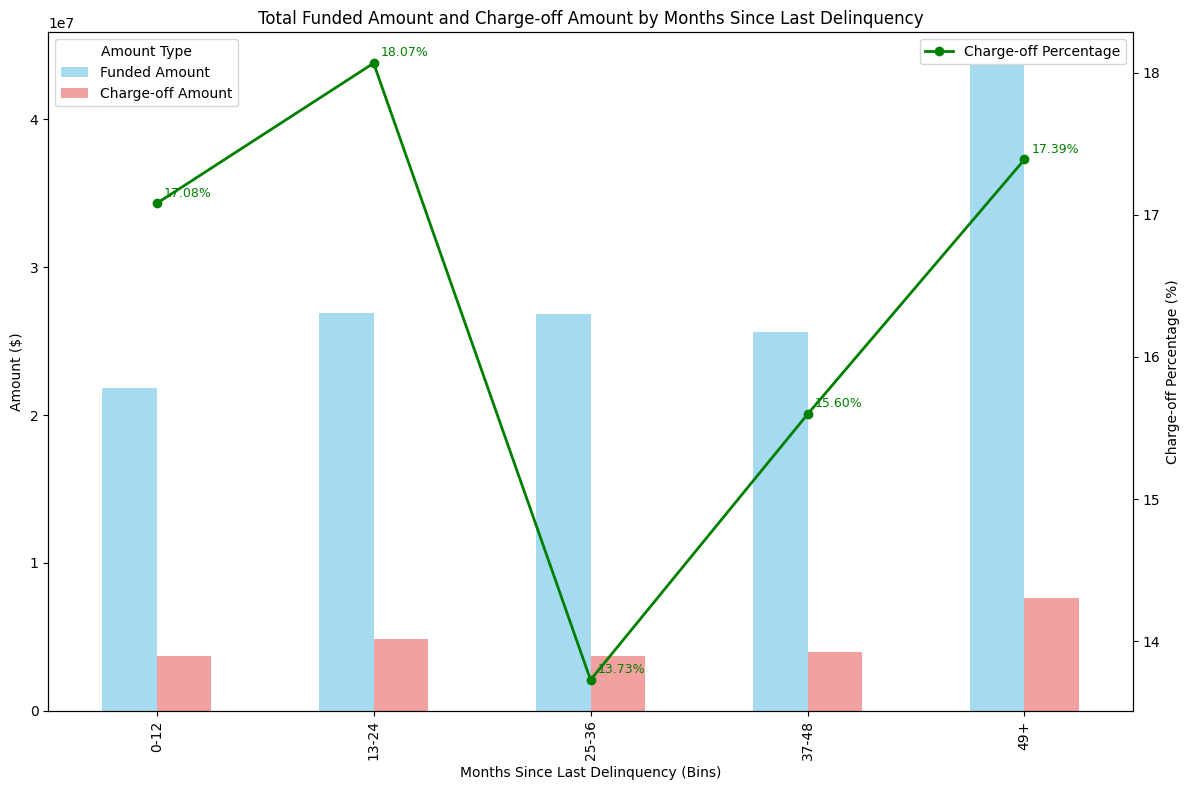

In [62]:

# Ensure the mths_since_last_delinq is in numeric form and filter out NaN values
df['mths_since_last_delinq'] = pd.to_numeric(df['mths_since_last_delinq'], errors='coerce')
df = df.dropna(subset=['mths_since_last_delinq'])

# Define the bins for grouping the months
bins = [0, 12, 24, 36, 48, float('inf')]
labels = ['0-12', '13-24', '25-36', '37-48', '49+']
df['delinq_bin'] = pd.cut(df['mths_since_last_delinq'], bins=bins, labels=labels, right=False)

# Calculate total funded amount and total charge-off amount for each delinq_bin
funded_amounts = df.groupby('delinq_bin')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('delinq_bin')['funded_amnt'].sum()

# Combine into a single DataFrame and fill NaN values with 0
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Calculate charge-off percentage with an additional check to avoid division by zero
comparison_df['Charge-off Percentage'] = (comparison_df['Charge-off Amount'] / comparison_df['Funded Amount']).replace([float('inf'), -float('inf')], 0) * 100
comparison_df['Charge-off Percentage'] = comparison_df['Charge-off Percentage'].fillna(0)

# Plotting the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

comparison_df[['Funded Amount', 'Charge-off Amount']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'], alpha=0.75)
ax1.set_title('Total Funded Amount and Charge-off Amount by Months Since Last Delinquency')
ax1.set_xlabel('Months Since Last Delinquency (Bins)')
ax1.set_ylabel('Amount ($)')
ax1.legend(title='Amount Type')
ax1.grid(False)

# Create a second y-axis for the charge-off percentage line graph
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Charge-off Percentage'], color='green', marker='o', linestyle='-', linewidth=2, label='Charge-off Percentage')
ax2.set_ylabel('Charge-off Percentage (%)')
ax2.legend(loc='upper right')
ax2.grid(False)

# Add annotations for charge-off percentages
for i in range(len(comparison_df)):
    ax2.annotate(f"{comparison_df['Charge-off Percentage'].iloc[i]:.2f}%",
                 xy=(i, comparison_df['Charge-off Percentage'].iloc[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=9,
                 color='green')

plt.tight_layout()
plt.show()

#### Conclusion: "delinq_2yrs'
Conclusion : There is not a clear relationship between the months since the last delinquency and charge-offs

### Relationship between 'open_acc'  and charge offs 

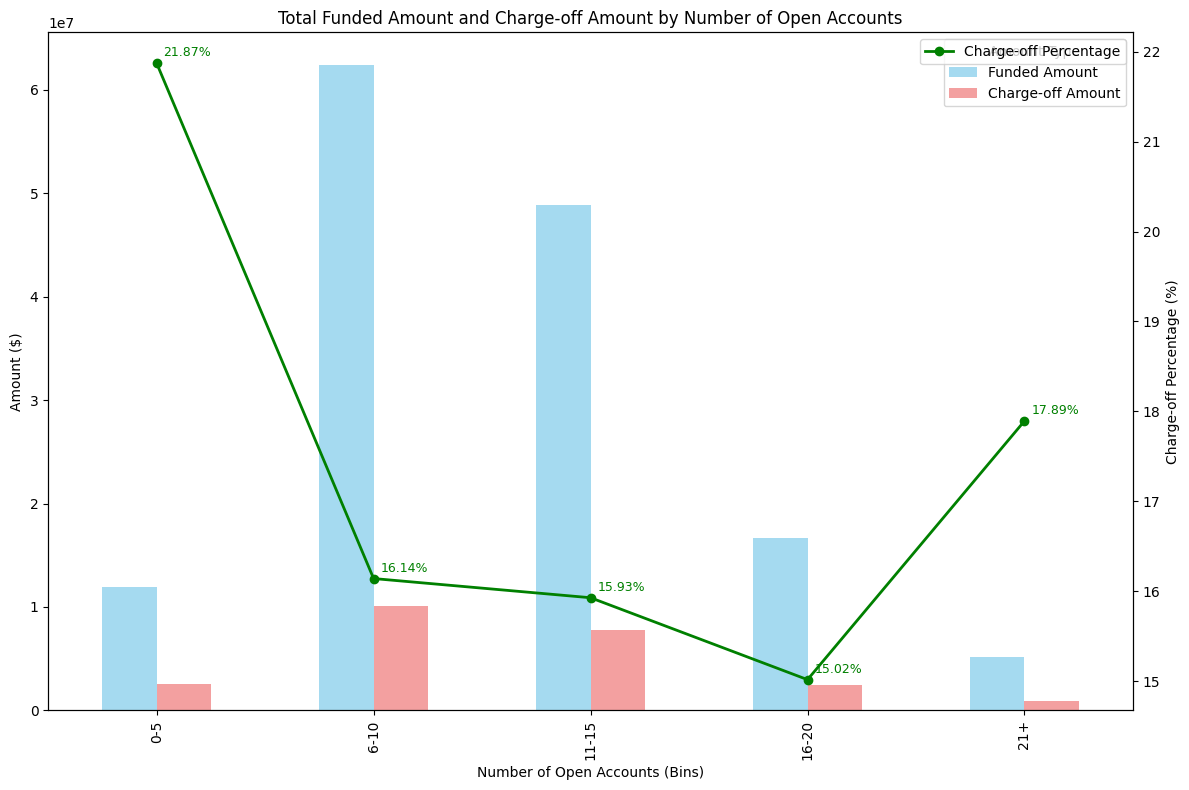

In [63]:

# Ensure the open_acc is in numeric form and filter out NaN values
df['open_acc'] = pd.to_numeric(df['open_acc'], errors='coerce')
df = df.dropna(subset=['open_acc'])

# Define the bins for grouping the open accounts
bins = [0, 5, 10, 15, 20, float('inf')]
labels = ['0-5', '6-10', '11-15', '16-20', '21+']
df['open_acc_bin'] = pd.cut(df['open_acc'], bins=bins, labels=labels, right=False)

# Calculate total funded amount and total charge-off amount for each open_acc_bin
funded_amounts = df.groupby('open_acc_bin')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('open_acc_bin')['funded_amnt'].sum()

# Combine into a single DataFrame and fill NaN values with 0
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Calculate charge-off percentage with an additional check to avoid division by zero
comparison_df['Charge-off Percentage'] = (comparison_df['Charge-off Amount'] / comparison_df['Funded Amount']).replace([float('inf'), -float('inf')], 0) * 100
comparison_df['Charge-off Percentage'] = comparison_df['Charge-off Percentage'].fillna(0)

# Plotting the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

comparison_df[['Funded Amount', 'Charge-off Amount']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'], alpha=0.75)
ax1.set_title('Total Funded Amount and Charge-off Amount by Number of Open Accounts')
ax1.set_xlabel('Number of Open Accounts (Bins)')
ax1.set_ylabel('Amount ($)')
ax1.legend(title='Amount Type')
ax1.grid(False)

# Create a second y-axis for the charge-off percentage line graph
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Charge-off Percentage'], color='green', marker='o', linestyle='-', linewidth=2, label='Charge-off Percentage')
ax2.set_ylabel('Charge-off Percentage (%)')
ax2.legend(loc='upper right')
ax2.grid(False)

# Add annotations for charge-off percentages
for i in range(len(comparison_df)):
    ax2.annotate(f"{comparison_df['Charge-off Percentage'].iloc[i]:.2f}%",
                 xy=(i, comparison_df['Charge-off Percentage'].iloc[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=9,
                 color='green')

plt.tight_layout()
plt.show()

#### Conclusion: "open_acc'
Conclusion : There is not a clear relationship between the  number of open credit lines in the borrower's credit file and charge-offs

### Relationship between 'total_acc'  and charge offs 

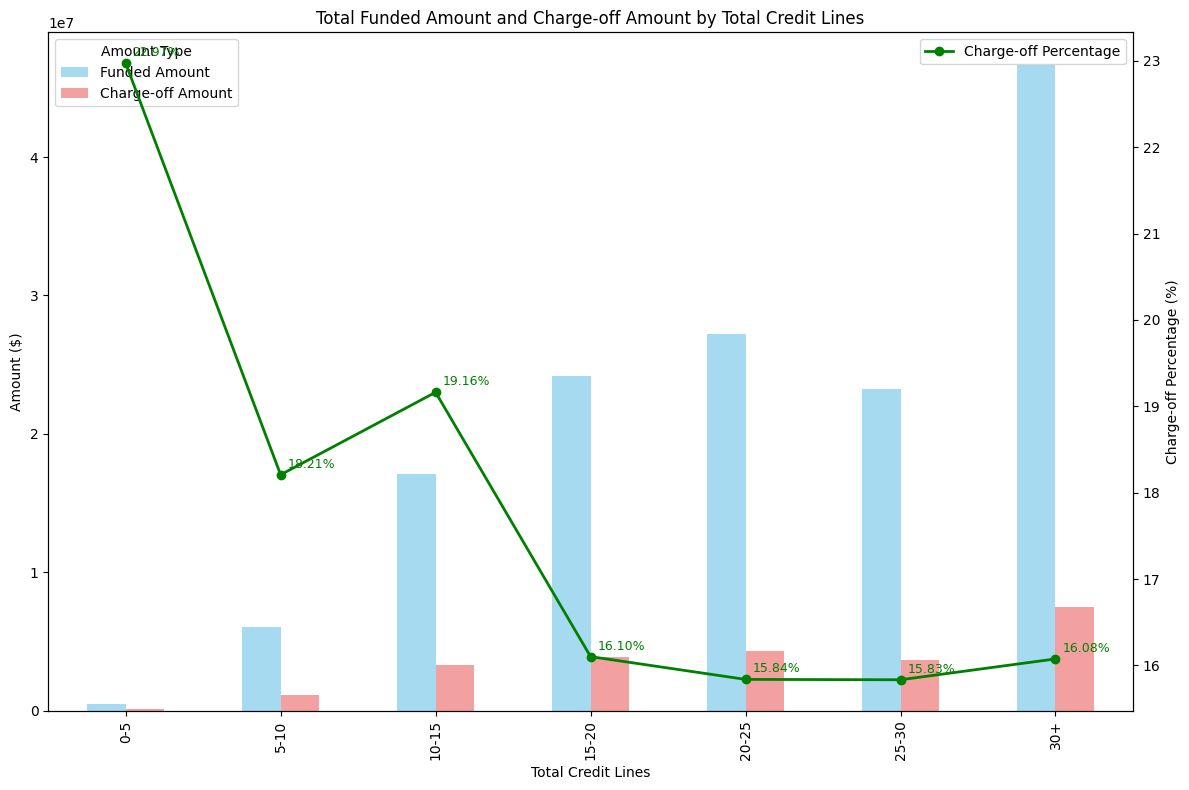

In [64]:

# Define bins for grouping the total number of credit lines
bins = [0, 5, 10, 15, 20, 25, 30, float('inf')]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']
df['total_acc_bin'] = pd.cut(df['total_acc'], bins=bins, labels=labels, right=False)

# Calculate total funded amount and total charge-off amount for each bin
funded_amounts = df.groupby('total_acc_bin')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('total_acc_bin')['funded_amnt'].sum()

# Combine into a single DataFrame and fill NaN values with 0
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Calculate charge-off percentage with an additional check to avoid division by zero
comparison_df['Charge-off Percentage'] = (comparison_df['Charge-off Amount'] / comparison_df['Funded Amount']).replace([float('inf'), -float('inf')], 0) * 100
comparison_df['Charge-off Percentage'] = comparison_df['Charge-off Percentage'].fillna(0)

# Plotting the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

comparison_df[['Funded Amount', 'Charge-off Amount']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'], alpha=0.75)
ax1.set_title('Total Funded Amount and Charge-off Amount by Total Credit Lines')
ax1.set_xlabel('Total Credit Lines')
ax1.set_ylabel('Amount ($)')
ax1.legend(title='Amount Type')
ax1.grid(False)

# Create a second y-axis for the charge-off percentage line graph
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Charge-off Percentage'], color='green', marker='o', linestyle='-', linewidth=2, label='Charge-off Percentage')
ax2.set_ylabel('Charge-off Percentage (%)')
ax2.legend(loc='upper right')
ax2.grid(False)

# Add annotations for charge-off percentages
for i in range(len(comparison_df)):
    ax2.annotate(f"{comparison_df['Charge-off Percentage'].iloc[i]:.2f}%",
                 xy=(i, comparison_df['Charge-off Percentage'].iloc[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=9,
                 color='green')

plt.tight_layout()
plt.show()

#### Conclusion: 'total_acc'
It seems like there is a negative relationship between total accounts (i.e. the total number of credit lines currently in the borrower's credit file) and charge-offs. This may be inconsistent with the relationship to 'open-acc' above i.e. The number of open credit lines in the borrower's credit file.

### Relationship between 'pub_rec'  and charge offs

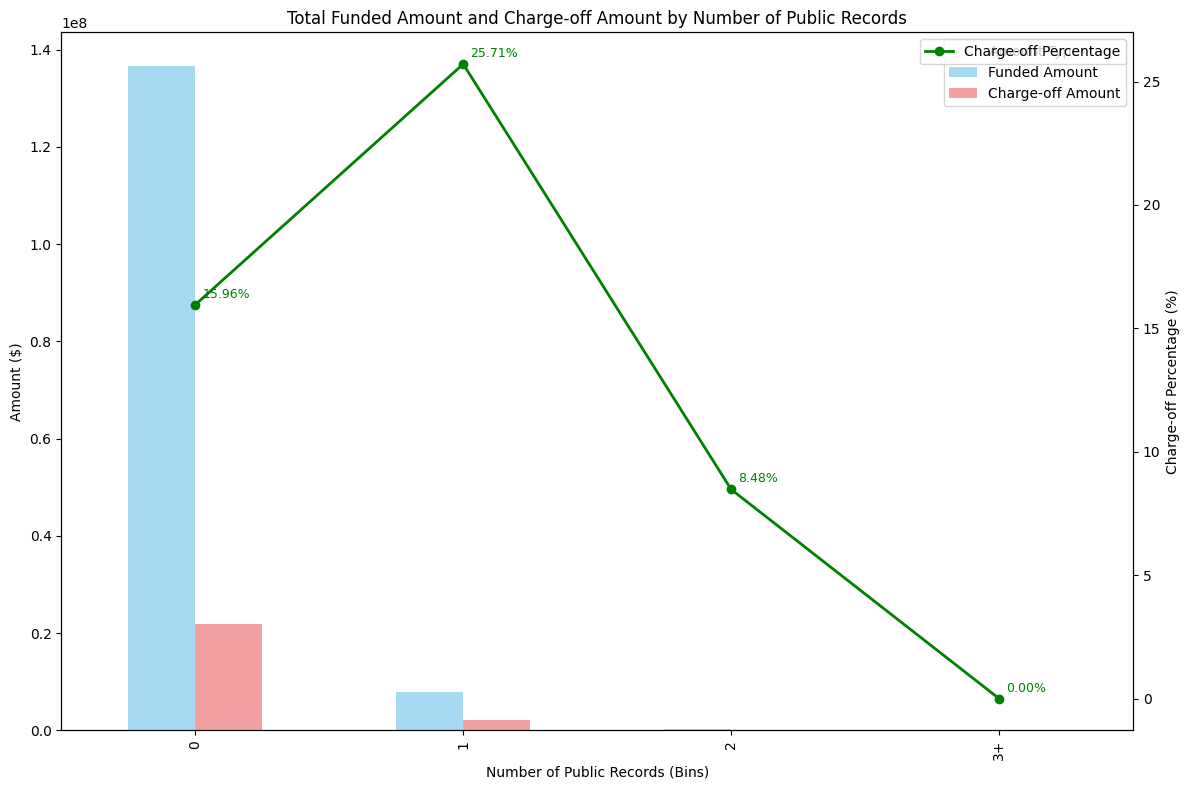

In [65]:

# Ensure the pub_rec is in numeric form and filter out NaN values
df['pub_rec'] = pd.to_numeric(df['pub_rec'], errors='coerce')
df = df.dropna(subset=['pub_rec'])

# Define the bins for grouping the public records
bins = [0, 1, 2, 3, float('inf')]
labels = ['0', '1', '2', '3+']
df['pub_rec_bin'] = pd.cut(df['pub_rec'], bins=bins, labels=labels, right=False)

# Calculate total funded amount and total charge-off amount for each pub_rec_bin
funded_amounts = df.groupby('pub_rec_bin')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('pub_rec_bin')['funded_amnt'].sum()

# Combine into a single DataFrame and fill NaN values with 0
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Calculate charge-off percentage with an additional check to avoid division by zero
comparison_df['Charge-off Percentage'] = (comparison_df['Charge-off Amount'] / comparison_df['Funded Amount']).replace([float('inf'), -float('inf')], 0) * 100
comparison_df['Charge-off Percentage'] = comparison_df['Charge-off Percentage'].fillna(0)

# Plotting the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

comparison_df[['Funded Amount', 'Charge-off Amount']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'], alpha=0.75)
ax1.set_title('Total Funded Amount and Charge-off Amount by Number of Public Records')
ax1.set_xlabel('Number of Public Records (Bins)')
ax1.set_ylabel('Amount ($)')
ax1.legend(title='Amount Type')
ax1.grid(False)

# Create a second y-axis for the charge-off percentage line graph
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Charge-off Percentage'], color='green', marker='o', linestyle='-', linewidth=2, label='Charge-off Percentage')
ax2.set_ylabel('Charge-off Percentage (%)')
ax2.legend(loc='upper right')
ax2.grid(False)

# Add annotations for charge-off percentages
for i in range(len(comparison_df)):
    ax2.annotate(f"{comparison_df['Charge-off Percentage'].iloc[i]:.2f}%",
                 xy=(i, comparison_df['Charge-off Percentage'].iloc[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=9,
                 color='green')

plt.tight_layout()
plt.show()

#### Conclusion: "pub_rec'
There is a slightly higher number of charge offs when a company has derogatory public records

### Relationship between 'earliest_cr_line'  and charge offs 

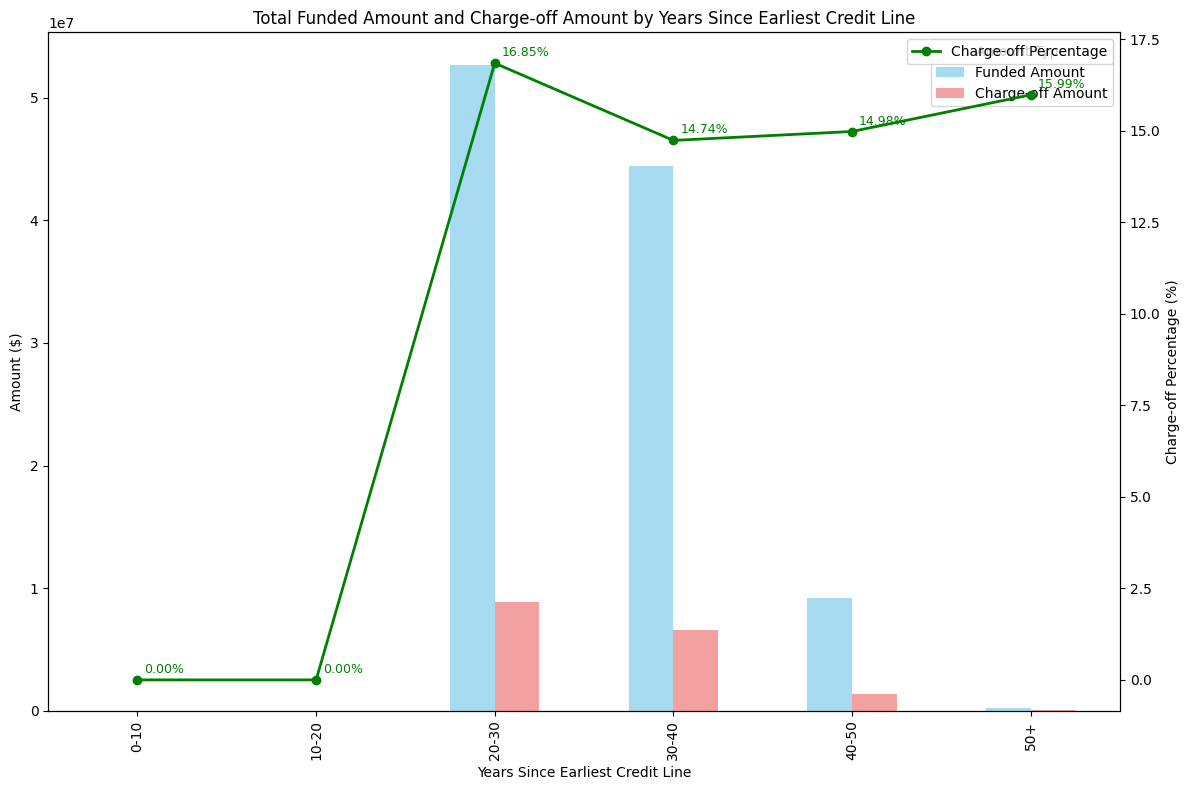

In [66]:

# Convert 'earliest_cr_line' to datetime format and calculate the number of years since the earliest credit line
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
current_year = pd.to_datetime('today').year
df['years_since_earliest_cr'] = current_year - df['earliest_cr_line'].dt.year

# Define bins for grouping the years since the earliest credit line
bins = [0, 10, 20, 30, 40, 50, float('inf')]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50+']
df['earliest_cr_bin'] = pd.cut(df['years_since_earliest_cr'], bins=bins, labels=labels, right=False)

# Calculate total funded amount and total charge-off amount for each bin
funded_amounts = df.groupby('earliest_cr_bin')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('earliest_cr_bin')['funded_amnt'].sum()

# Combine into a single DataFrame and fill NaN values with 0
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Calculate charge-off percentage with an additional check to avoid division by zero
comparison_df['Charge-off Percentage'] = (comparison_df['Charge-off Amount'] / comparison_df['Funded Amount']).replace([float('inf'), -float('inf')], 0) * 100
comparison_df['Charge-off Percentage'] = comparison_df['Charge-off Percentage'].fillna(0)

# Plotting the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

comparison_df[['Funded Amount', 'Charge-off Amount']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'], alpha=0.75)
ax1.set_title('Total Funded Amount and Charge-off Amount by Years Since Earliest Credit Line')
ax1.set_xlabel('Years Since Earliest Credit Line')
ax1.set_ylabel('Amount ($)')
ax1.legend(title='Amount Type')
ax1.grid(False)

# Create a second y-axis for the charge-off percentage line graph
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Charge-off Percentage'], color='green', marker='o', linestyle='-', linewidth=2, label='Charge-off Percentage')
ax2.set_ylabel('Charge-off Percentage (%)')
ax2.legend(loc='upper right')
ax2.grid(False)

# Add annotations for charge-off percentages
for i in range(len(comparison_df)):
    ax2.annotate(f"{comparison_df['Charge-off Percentage'].iloc[i]:.2f}%",
                 xy=(i, comparison_df['Charge-off Percentage'].iloc[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=9,
                 color='green')

plt.tight_layout()
plt.show()

#### Conclusion: "earliest_cr_line'
It appears that there are higher charge-offs for older credit lines. This justifies performing regular credit checks on customer accounts

### Relationship between  'int_rate' and charge offs

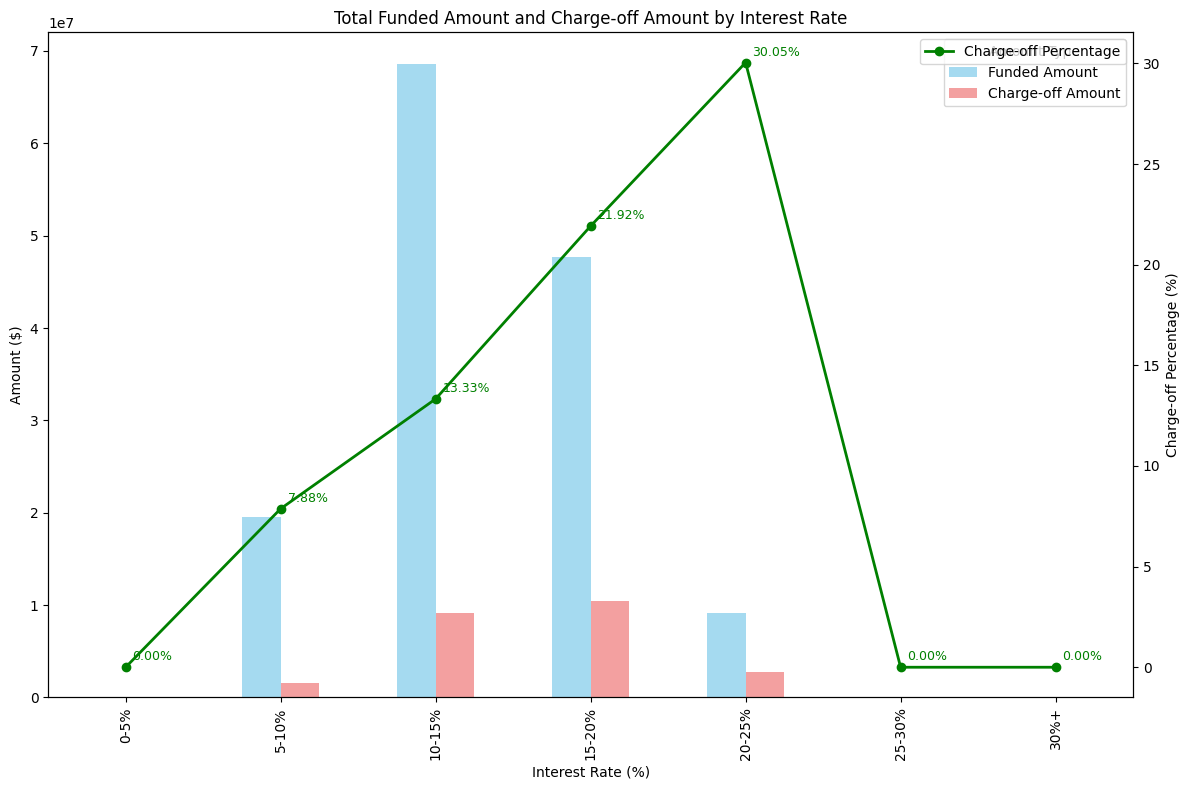

In [67]:

# Define bins for grouping the interest rates
bins = [0, 5, 10, 15, 20, 25, 30, float('inf')]
labels = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25-30%', '30%+']
df['int_rate_bin'] = pd.cut(df['int_rate'], bins=bins, labels=labels, right=False)

# Calculate total funded amount and total charge-off amount for each bin
funded_amounts = df.groupby('int_rate_bin')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('int_rate_bin')['funded_amnt'].sum()

# Combine into a single DataFrame and fill NaN values with 0
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Calculate charge-off percentage with an additional check to avoid division by zero
comparison_df['Charge-off Percentage'] = (comparison_df['Charge-off Amount'] / comparison_df['Funded Amount']).replace([float('inf'), -float('inf')], 0) * 100
comparison_df['Charge-off Percentage'] = comparison_df['Charge-off Percentage'].fillna(0)

# Plotting the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

comparison_df[['Funded Amount', 'Charge-off Amount']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'], alpha=0.75)
ax1.set_title('Total Funded Amount and Charge-off Amount by Interest Rate')
ax1.set_xlabel('Interest Rate (%)')
ax1.set_ylabel('Amount ($)')
ax1.legend(title='Amount Type')
ax1.grid(False)

# Create a second y-axis for the charge-off percentage line graph
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Charge-off Percentage'], color='green', marker='o', linestyle='-', linewidth=2, label='Charge-off Percentage')
ax2.set_ylabel('Charge-off Percentage (%)')
ax2.legend(loc='upper right')
ax2.grid(False)

# Add annotations for charge-off percentages
for i in range(len(comparison_df)):
    ax2.annotate(f"{comparison_df['Charge-off Percentage'].iloc[i]:.2f}%",
                 xy=(i, comparison_df['Charge-off Percentage'].iloc[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=9,
                 color='green')

plt.tight_layout()
plt.show()

#### Conclusion: 'int_rate'
This table shows that interest rates increase as charge offs increase. This is not suprising because customers who default will pay higher financing costs if they miss payment. Consequently higher interest rates could be a good predictor of default.

### Relationship between  'total_rec_late_fee' and charge offs 

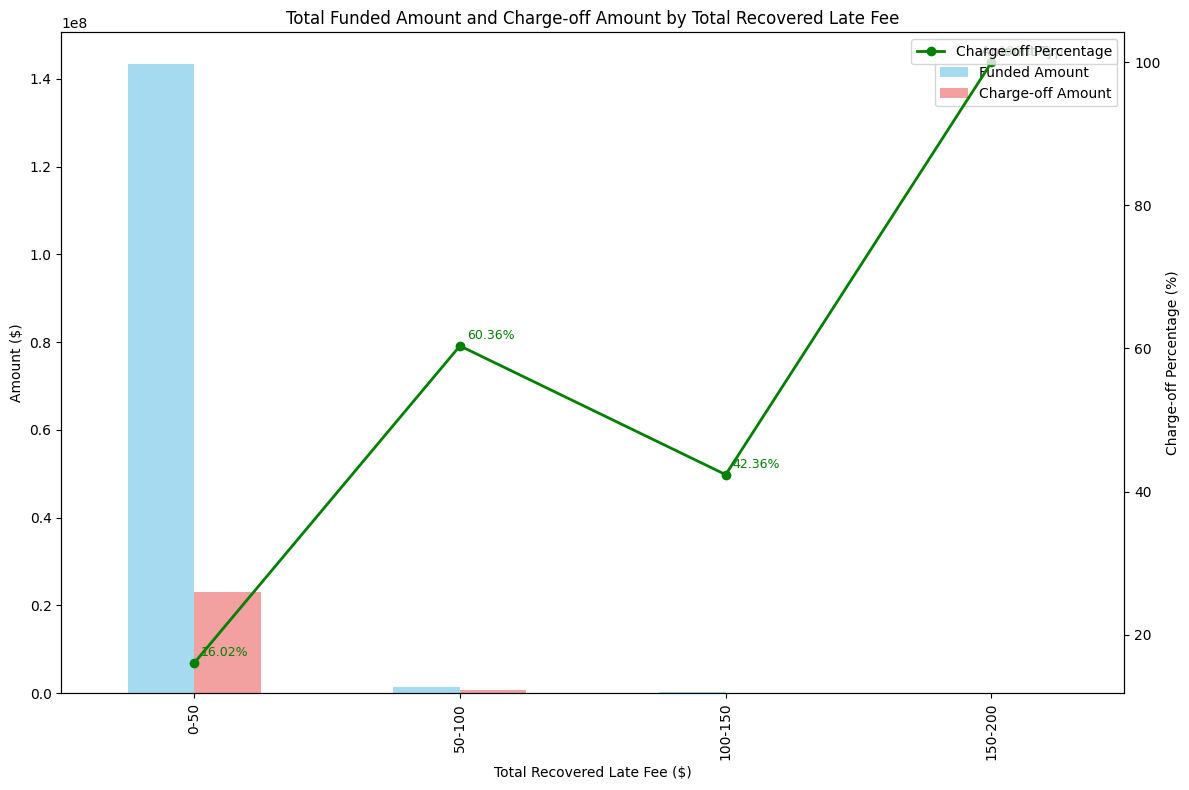

In [68]:

# Define bins for grouping the total recovered late fees
bins = [0, 50, 100, 150, 200]
labels = ['0-50', '50-100', '100-150', '150-200']
df['total_rec_late_fee_bin'] = pd.cut(df['total_rec_late_fee'], bins=bins, labels=labels, right=False)

# Calculate total funded amount and total charge-off amount for each bin
funded_amounts = df.groupby('total_rec_late_fee_bin')['funded_amnt'].sum()
charge_off_amounts = df[df['loan_status'] == 'Charged Off'].groupby('total_rec_late_fee_bin')['funded_amnt'].sum()

# Combine into a single DataFrame and fill NaN values with 0
comparison_df = pd.DataFrame({
    'Funded Amount': funded_amounts,
    'Charge-off Amount': charge_off_amounts
}).fillna(0)

# Calculate charge-off percentage with an additional check to avoid division by zero
comparison_df['Charge-off Percentage'] = (comparison_df['Charge-off Amount'] / comparison_df['Funded Amount']).replace([float('inf'), -float('inf')], 0) * 100
comparison_df['Charge-off Percentage'] = comparison_df['Charge-off Percentage'].fillna(0)

# Plotting the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

comparison_df[['Funded Amount', 'Charge-off Amount']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'], alpha=0.75)
ax1.set_title('Total Funded Amount and Charge-off Amount by Total Recovered Late Fee')
ax1.set_xlabel('Total Recovered Late Fee ($)')
ax1.set_ylabel('Amount ($)')
ax1.legend(title='Amount Type')
ax1.grid(False)

# Create a second y-axis for the charge-off percentage line graph
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Charge-off Percentage'], color='green', marker='o', linestyle='-', linewidth=2, label='Charge-off Percentage')
ax2.set_ylabel('Charge-off Percentage (%)')
ax2.legend(loc='upper right')
ax2.grid(False)

# Add annotations for charge-off percentages
for i in range(len(comparison_df)):
    ax2.annotate(f"{comparison_df['Charge-off Percentage'].iloc[i]:.2f}%",
                 xy=(i, comparison_df['Charge-off Percentage'].iloc[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=9,
                 color='green')

plt.tight_layout()
plt.show()

####  Conclusion: 'total_rec_late_fee'

There appears to be a positive relationship between late fees received to date and charge-offs

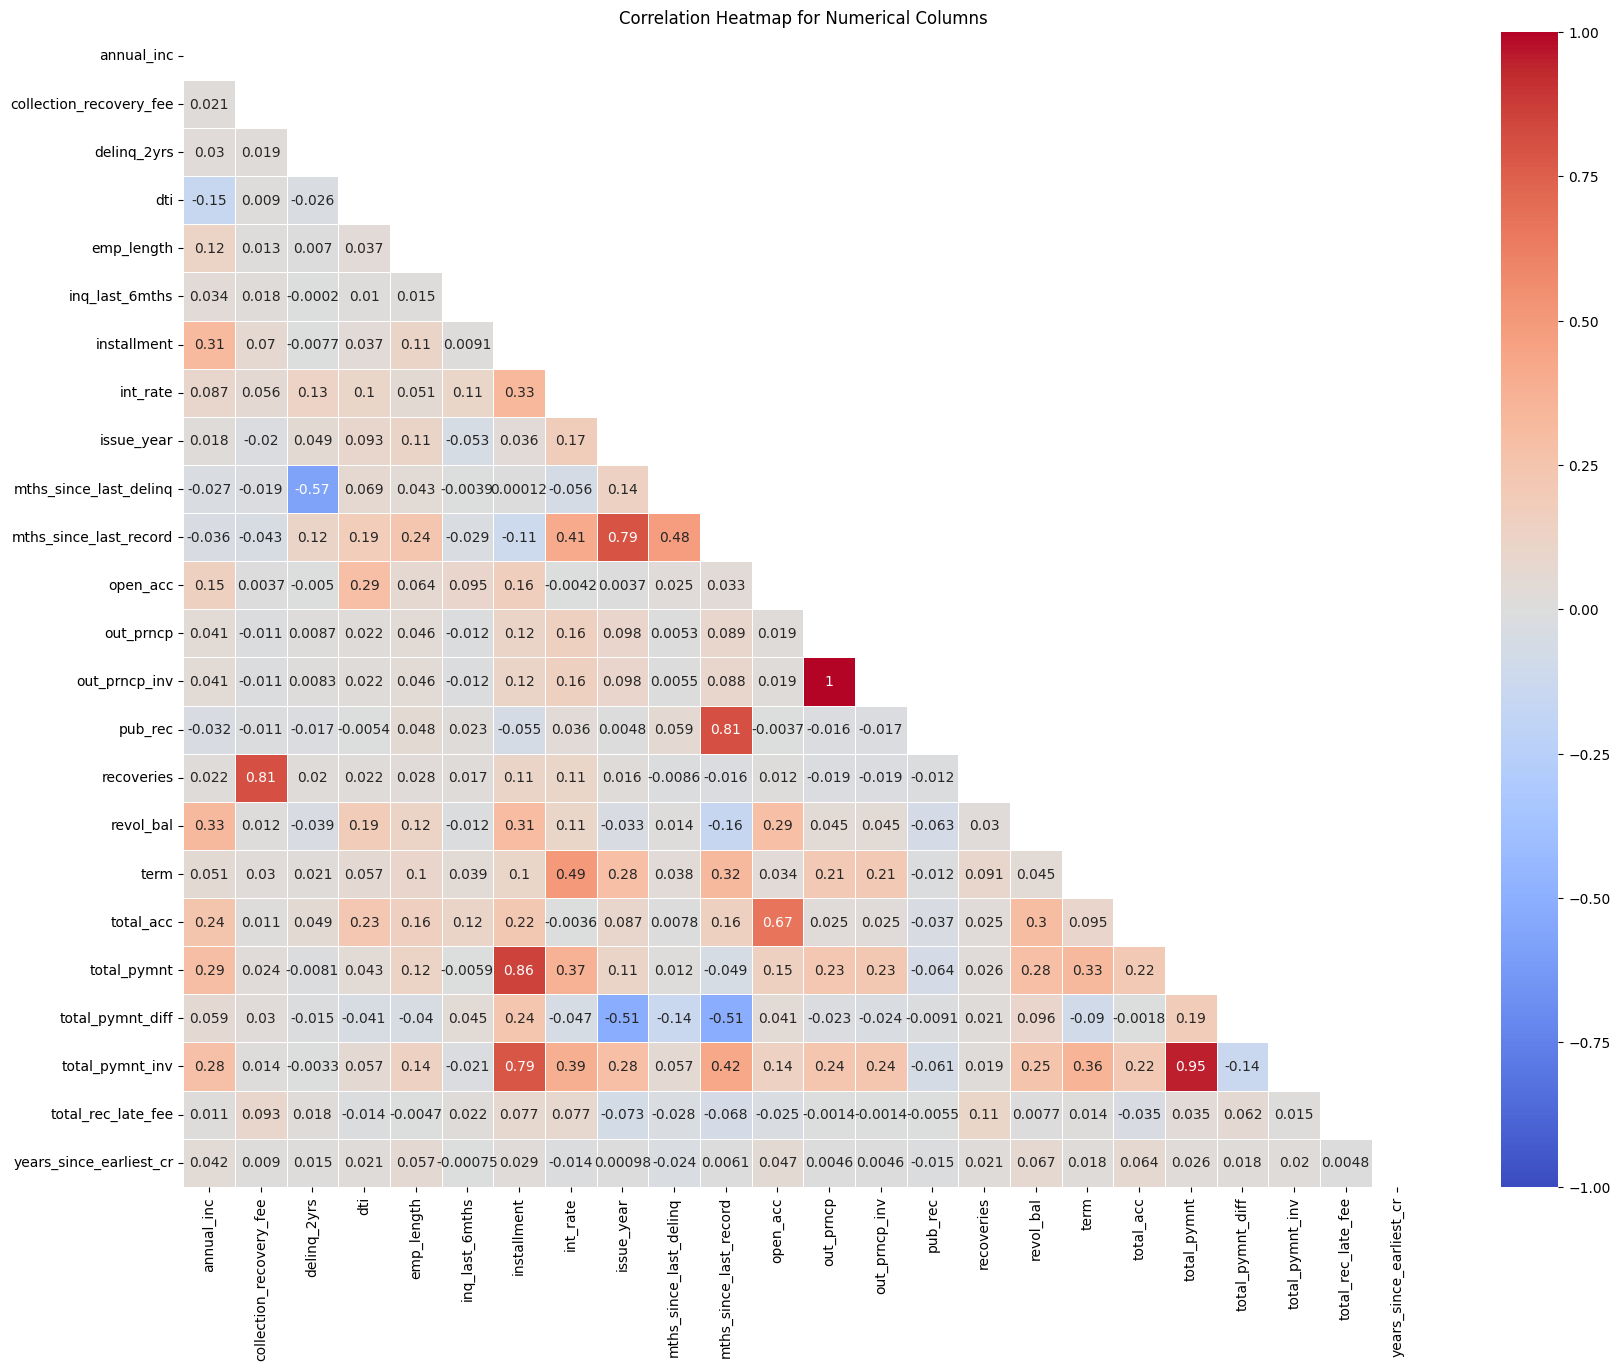

In [69]:
# Selecting categorical columns dynamically
categorical_cols = df.select_dtypes(exclude=[np.number]).columns


# Selecting numerical columns dynamically
revised_numerical_cols = df.select_dtypes(include=[np.number]).columns

# Removing specific columns
columns_to_remove = ['loan_amnt']
revised_numerical_cols = revised_numerical_cols.difference(columns_to_remove)


# Ensuring all columns exist in the DataFrame
revised_numerical_cols = [col for col in revised_numerical_cols if col in df.columns]

# Removing specific columns
columns_to_remove = ['loan_amnt', 'funded_amnt']
revised_numerical_cols = [col for col in revised_numerical_cols if col not in columns_to_remove]

# Compute the correlation matrix
corr = df[revised_numerical_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', vmax=1, vmin=-1, center=0, linewidths=.5)

plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

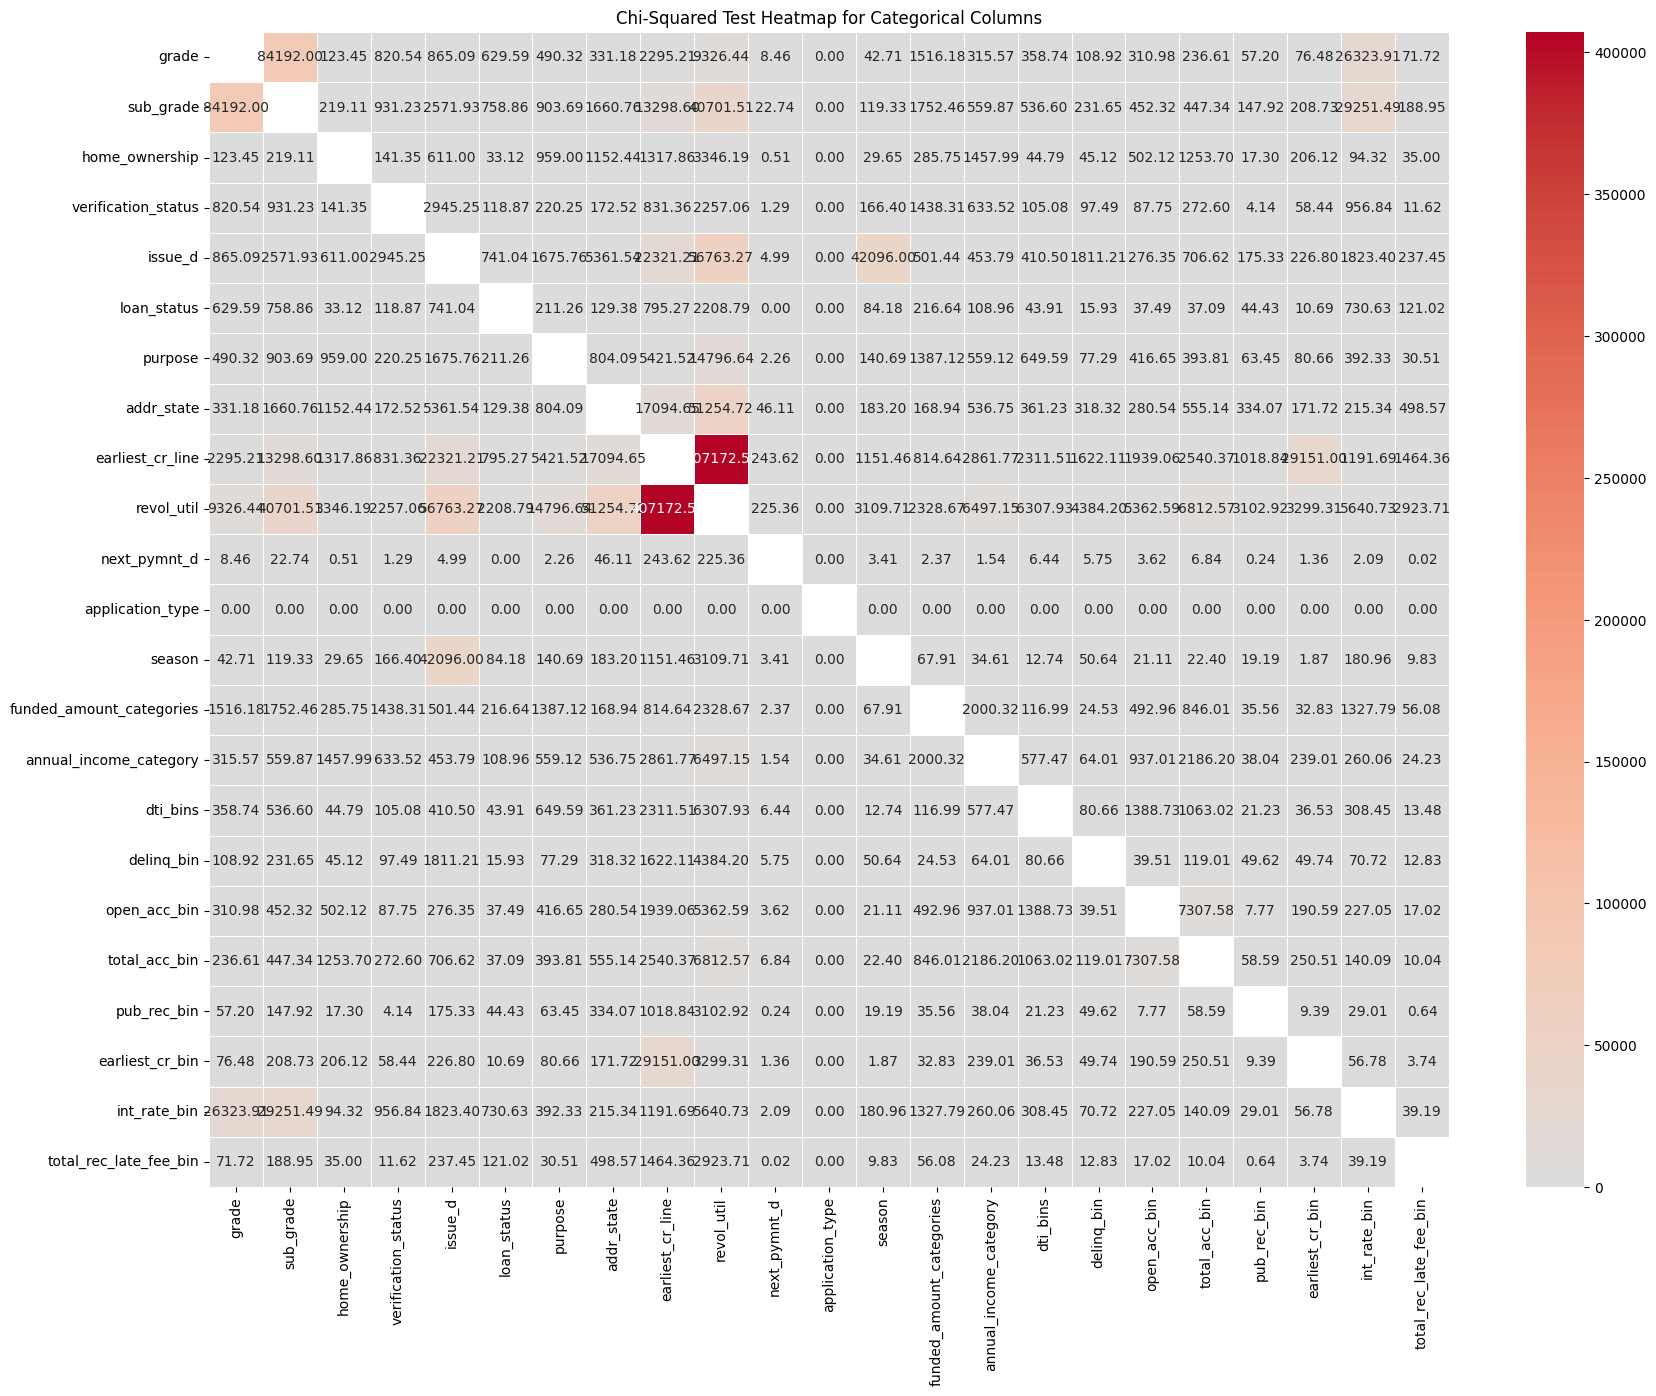

In [70]:
from scipy.stats import chi2_contingency

# Selecting categorical columns dynamically
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

# Initialize a DataFrame to hold the chi-squared values
chi2_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Compute the chi-squared test for each pair of categorical variables
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, p, dof, ex = chi2_contingency(contingency_table, correction=False)
            chi2_matrix.loc[col1, col2] = chi2
        else:
            chi2_matrix.loc[col1, col2] = np.nan  # Set the diagonal to NaN for clarity

# Convert the chi-squared values to float
chi2_matrix = chi2_matrix.astype(float)

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Draw the heatmap
sns.heatmap(chi2_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5, fmt=".2f")

plt.title('Chi-Squared Test Heatmap for Categorical Columns')
plt.show()

In [71]:
from scipy.stats import chi2_contingency

def chi_square_test(column):
    contingency_table = pd.crosstab(df['loan_status'], df[column])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    return p

# Selecting categorical columns dynamically
categorical_columns = df.select_dtypes(exclude=[np.number]).columns

# categorical_columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'application_type']
for col in categorical_columns:
    p_value = chi_square_test(col)
    print(f'Chi-square test p-value for {col}: {p_value}')


Chi-square test p-value for grade: 5.0592742040116925e-127
Chi-square test p-value for sub_grade: 2.6788755805703413e-117
Chi-square test p-value for home_ownership: 9.935558557849398e-06
Chi-square test p-value for verification_status: 9.310717832316028e-25
Chi-square test p-value for issue_d: 4.657475601949828e-95
Chi-square test p-value for loan_status: 0.0
Chi-square test p-value for purpose: 6.061014196118496e-31
Chi-square test p-value for addr_state: 0.018510522404149146
Chi-square test p-value for earliest_cr_line: 0.21006850586093553
Chi-square test p-value for revol_util: 0.05832291177179975
Chi-square test p-value for next_pymnt_d: 1.0
Chi-square test p-value for application_type: 1.0
Chi-square test p-value for season: 4.877540322537689e-16
Chi-square test p-value for funded_amount_categories: 9.897358821118917e-46
Chi-square test p-value for annual_income_category: 9.612025809495913e-18
Chi-square test p-value for dti_bins: 3.4125197567086015e-06
Chi-square test p-value fo

Practical Implications:
Grade and Sub-Grade: These variables have a very strong association with the variable being tested against. This could mean that the distribution of grades and sub-grades is not random and is influenced by the other variable.

Home Ownership: This variable also shows a strong association, suggesting that the distribution of home ownership statuses is influenced by the other variable.

Verification Status: This variable is strongly associated with the other variable, indicating that verification status is not randomly distributed.

Application Type: This variable does not show a significant association, suggesting that the application type is distributed independently of the other variable.


In [72]:
from scipy.stats import pointbiserialr

# Encode loan_status as a binary variable
df['loan_status_encoded'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

# Selecting numerical columns dynamically
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Removing specific columns
columns_to_remove = ['loan_amnt']
numerical_cols = numerical_cols.difference(columns_to_remove)

numerical_columns = ['term', 'int_rate', 'installment', 'annual_inc', 'dti', 'inq_last_6mths']
for col in numerical_columns:
    correlation, p_value = pointbiserialr(df['loan_status_encoded'], df[col])
    print(f'Correlation between loan_status and {col}: {correlation}, p-value: {p_value}')


Correlation between loan_status and term: 0.14146641942425675, p-value: 1.2233154484638262e-63
Correlation between loan_status and int_rate: 0.16523468338739422, p-value: 1.8770218223142662e-86
Correlation between loan_status and installment: 0.027614187261204865, p-value: 0.0010700921006587508
Correlation between loan_status and annual_inc: -0.05134635944778404, p-value: 1.1591468089352152e-09
Correlation between loan_status and dti: 0.03880633228272387, p-value: 4.261687994334477e-06
Correlation between loan_status and inq_last_6mths: 0.06211555758984623, p-value: 1.7786155378632959e-13


Summary:
All correlations are statistically significant, as indicated by their extremely small p-values.

The strengths of the relationships, as indicated by the correlation coefficients, range from very weak to weak.

The variables int_rate and term show the strongest correlations with loan_status, but these relationships are still weak.

The other variables (installment, annual_inc, dti, and inq_last_6mths) show very weak correlations with loan_status.

These interpretations help in understanding how the loan_status variable is related to other numerical variables in your dataset. Although the relationships are weak, they are statistically significant and could be important for further analysis and modeling.

In [73]:
#Checking datatypes of the remaining columns
df.dtypes

loan_amnt                            int64
funded_amnt                          int64
term                                 int64
int_rate                           float64
installment                        float64
grade                               object
sub_grade                           object
emp_length                           int64
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
addr_state                          object
dti                                float64
delinq_2yrs                          int64
earliest_cr_line            datetime64[ns]
inq_last_6mths                       int64
mths_since_last_delinq             float64
mths_since_last_record             float64
open_acc                             int64
pub_rec                              int64
revol_bal  

In [74]:
df.shape

(14032, 50)

In [75]:
df.dti.describe()

count    14032.000000
mean        12.850584
std          6.494169
min          0.000000
25%          7.870000
50%         12.910000
75%         17.960000
max         29.990000
Name: dti, dtype: float64

In [76]:
#checking if the column dti contains any outliers using zscore method 
mean = df['dti'].mean()
std_dev = df['dti'].std()
df['z_scores']= np.abs((df.dti-mean)/std_dev)
df[df['z_scores']<=3]
df.head()

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  \
3       10000        10000    36     13.49       339.31     C        C1   
4        3000         3000    60     12.69        67.79     B        B5   
16      10000        10000    36     15.27       347.98     C        C4   
18       6000         6000    36     11.71       198.46     B        B3   
27       5000         5000    60     16.77       123.65     D        D2   

    emp_length home_ownership  annual_inc  ... delinq_bin open_acc_bin  \
3           10           RENT     49200.0  ...      25-36        11-15   
4            1           RENT     80000.0  ...      37-48        16-20   
16           4           RENT     42000.0  ...        49+        11-15   
18           1       MORTGAGE     84000.0  ...       0-12          0-5   
27           2           RENT     50004.0  ...      13-24        11-15   

   total_acc_bin pub_rec_bin years_since_earliest_cr  earliest_cr_bin  \
3            30+           0                    28.0            20-30   
4            30+           0                    28.0            20-30   
16         25-30           0                    26.0            20-30   
18         10-15           0                     NaN              NaN   
27         20-25           0                     NaN              NaN   

    int_rate_bin total_rec_late_fee_bin  loan_status_encoded  z_scores  
3         10-15%                   0-50                    0  1.100898  
4         10-15%                   0-50                    0  0.783690  
16        15-20%                   0-50                    0  0.885320  
18        10-15%                   0-50                    0  0.860682  
27        15-20%                   0-50                    1  0.172372  

[5 rows x 51 columns]

In [77]:
df.shape

(14032, 51)

In [78]:
df['issue_date']=pd.to_datetime(df.issue_d , format='%b-%y')
df.head()

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  \
3       10000        10000    36     13.49       339.31     C        C1   
4        3000         3000    60     12.69        67.79     B        B5   
16      10000        10000    36     15.27       347.98     C        C4   
18       6000         6000    36     11.71       198.46     B        B3   
27       5000         5000    60     16.77       123.65     D        D2   

    emp_length home_ownership  annual_inc  ... open_acc_bin total_acc_bin  \
3           10           RENT     49200.0  ...        11-15           30+   
4            1           RENT     80000.0  ...        16-20           30+   
16           4           RENT     42000.0  ...        11-15         25-30   
18           1       MORTGAGE     84000.0  ...          0-5         10-15   
27           2           RENT     50004.0  ...        11-15         20-25   

   pub_rec_bin years_since_earliest_cr earliest_cr_bin  int_rate_bin  \
3            0                    28.0           20-30        10-15%   
4            0                    28.0           20-30        10-15%   
16           0                    26.0           20-30        15-20%   
18           0                     NaN             NaN        10-15%   
27           0                     NaN             NaN        15-20%   

    total_rec_late_fee_bin loan_status_encoded  z_scores  issue_date  
3                     0-50                   0  1.100898  2011-12-01  
4                     0-50                   0  0.783690  2011-12-01  
16                    0-50                   0  0.885320  2011-12-01  
18                    0-50                   0  0.860682  2011-12-01  
27                    0-50                   1  0.172372  2011-12-01  

[5 rows x 52 columns]

In [79]:
#deleting issue_d column as its formatted in DD_MM_YYYY format & a new column issue_date is created
df.drop(['issue_d'],axis=1,inplace=True)
df.head()

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  \
3       10000        10000    36     13.49       339.31     C        C1   
4        3000         3000    60     12.69        67.79     B        B5   
16      10000        10000    36     15.27       347.98     C        C4   
18       6000         6000    36     11.71       198.46     B        B3   
27       5000         5000    60     16.77       123.65     D        D2   

    emp_length home_ownership  annual_inc  ... open_acc_bin total_acc_bin  \
3           10           RENT     49200.0  ...        11-15           30+   
4            1           RENT     80000.0  ...        16-20           30+   
16           4           RENT     42000.0  ...        11-15         25-30   
18           1       MORTGAGE     84000.0  ...          0-5         10-15   
27           2           RENT     50004.0  ...        11-15         20-25   

   pub_rec_bin years_since_earliest_cr  earliest_cr_bin  int_rate_bin  \
3            0                    28.0            20-30        10-15%   
4            0                    28.0            20-30        10-15%   
16           0                    26.0            20-30        15-20%   
18           0                     NaN              NaN        10-15%   
27           0                     NaN              NaN        15-20%   

   total_rec_late_fee_bin  loan_status_encoded  z_scores  issue_date  
3                    0-50                    0  1.100898  2011-12-01  
4                    0-50                    0  0.783690  2011-12-01  
16                   0-50                    0  0.885320  2011-12-01  
18                   0-50                    0  0.860682  2011-12-01  
27                   0-50                    1  0.172372  2011-12-01  

[5 rows x 51 columns]

In [80]:
#creating new columns for month & year from Issue Date Column
df['month']=df.issue_date.dt.month
df['year']=df.issue_date.dt.year
df.head()

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  \
3       10000        10000    36     13.49       339.31     C        C1   
4        3000         3000    60     12.69        67.79     B        B5   
16      10000        10000    36     15.27       347.98     C        C4   
18       6000         6000    36     11.71       198.46     B        B3   
27       5000         5000    60     16.77       123.65     D        D2   

    emp_length home_ownership  annual_inc  ... pub_rec_bin  \
3           10           RENT     49200.0  ...           0   
4            1           RENT     80000.0  ...           0   
16           4           RENT     42000.0  ...           0   
18           1       MORTGAGE     84000.0  ...           0   
27           2           RENT     50004.0  ...           0   

   years_since_earliest_cr earliest_cr_bin int_rate_bin  \
3                     28.0           20-30       10-15%   
4                     28.0           20-30       10-15%   
16                    26.0           20-30       15-20%   
18                     NaN             NaN       10-15%   
27                     NaN             NaN       15-20%   

    total_rec_late_fee_bin  loan_status_encoded  z_scores  issue_date  month  \
3                     0-50                    0  1.100898  2011-12-01     12   
4                     0-50                    0  0.783690  2011-12-01     12   
16                    0-50                    0  0.885320  2011-12-01     12   
18                    0-50                    0  0.860682  2011-12-01     12   
27                    0-50                    1  0.172372  2011-12-01     12   

    year  
3   2011  
4   2011  
16  2011  
18  2011  
27  2011  

[5 rows x 53 columns]

In [81]:
df.emp_length

3        10
4         1
16        4
18        1
27        2
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 14032, dtype: int64

In [82]:
#Need to cleanse emp_lenghth